In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 9


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 9


store_mean_0-lag0-offset9

 family_0-lag0-offset9

 city_0-lag0-offset9

 cluster_mv36-lag0-offset9

 cluster_0-lag0-offset9

 city_mv36-lag0-offset9

 item_mean_0-lag0-offset9

 class_0-lag0-offset9

 type_0-lag0-offset9

 type_mv36-lag0-offset9

 state_mv36-lag0-offset9

 class_mv36-lag0-offset9

 state_0-lag0-offset9

 family_mv36-lag0-offset9

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset9

 y_0-lag1-offset9

 y_0-lag2-offset9

 y_0-lag3-offset9

 y_0-lag4-offset9

 y_0-lag5-offset9

 y_0-lag6-offset9

 sales_ma_224-lag0-offset9

 sales_ma_14-lag0-offset9

 sales_ma_28-lag0-offset9

 sales_ma_112-lag0-offset9

 sales_ma_7-lag0-offset9

 sales_ma_3-lag0-offset9

 sales_ma_56-lag0-offset9

 sales_week_season_ma_p7-lag5-offset9

 sales_week_season_ma_p4-lag5-offset9

 sales_week_season_ma_p13-lag5-offset9

 sales_week_season_ma_p2-lag5-offset9

 sales_week_season_ma_p3-lag5-offset9

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 41s, sys: 25.9 s, total: 3min 7s
Wall time: 3min 7s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset9  family_0-lag0-offset9  city_0-lag0-offset9  \
1683                   1.684570               1.749023             1.941406   
1684                   1.474609               1.663086             1.794922   
1685                   1.603516               1.717773             1.867188   
1686                   1.486328               1.821289             1.977539   
1687                   1.234375               1.866211             2.031250   
1688                   1.541992               1.696289             1.849609   
1689                   1.560547               1.639648             1.785156   

      cluster_mv36-lag0-offset9  cluster_0-lag0-offset9  \
1683                   1.654297                1.729492   
1684                   1.651367                1.544922   
1685                   1.654297                1.635742   
1686                   1.654297                1.663086   
1687                   1.650391                1.664062   
1688                   1.645508                1.623047   
1689                   1.641602                1.563477   

      city_mv36-lag0-offset9  item_mean_0-lag0-offset9  class_0-lag0-offset9  \
1683                1.880859                  1.789062              1.687500   
1684                1.880859                  1.869141              1.654297   
1685                1.884766                  2.099609              1.805664   
1686                1.888672                  2.132812              1.858398   
1687                1.885742                  2.115234              1.756836   
1688                1.876953                  1.683594              1.583008   
1689                1.872070                  1.707031              1.577148   

      type_0-lag0-offset9  type_mv36-lag0-offset9  state_mv36-lag0-offset9  \
1683             1.740234                1.665039                 1.878906   
1684             1.556641                1.662109                 1.878906   
1685             1.651367                1.665039                 1.883789   
1686             1.693359                1.666992                 1.886719   
1687             1.701172                1.664062                 1.884766   
1688             1.626953                1.658203                 1.875977   
1689             1.561523                1.654297                 1.871094   

      class_mv36-lag0-offset9  state_0-lag0-offset9  family_mv36-lag0-offset9  \
1683                 1.668945              1.944336                  1.722656   
1684                 1.671875              1.801758                  1.723633   
1685                 1.677734              1.870117                  1.727539   
1686                 1.680664              1.972656                  1.731445   
1687                 1.676758              2.029297                  1.730469   
1688                 1.670898              1.851562                  1.722656   
1689                 1.669922              1.791016                  1.719727   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset9  y_0-lag1-offset9  y_0-lag2-offset9  y_0-lag3-offset9  \
1683          2.197266          1.791992          2.197266          1.791992   
1684          2.398438          2.197266          1.791992          2.197266   
1685          2.080078          2.398438          2.197266          1.791992   
1686          2.080078          2.080078          2.398438          2.197266   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset9     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset9     0.0  0.0002     0.0  0.0002   
2                     city_0-lag0-offset9     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset9     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset9     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset9     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset9  0.0824  0.0832   0.082  0.0841   
7                    class_0-lag0-offset9  0.0078  0.0085  0.0078  0.0083   
8                     type_0-lag0-offset9     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset9     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset9     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset9  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset9     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset9     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset9  0.5295  0.4992  0.4994  0.5308   
18                       y_0-lag1-offset9  0.5382  0.5295  0.4992  0.4994   
19                       y_0-lag2-offset9  0.5149  0.5382  0.5295  0.4992   
20                       y_0-lag3-offset9  0.5059  0.5149  0.5382  0.5295   
21                       y_0-lag4-offset9  0.5195  0.5059  0.5149  0.5382   
22                       y_0-lag5-offset9  0.4964  0.5195  0.5059  0.5149   
23                       y_0-lag6-offset9  0.4972  0.4964  0.5195  0.5059   
24              sales_ma_224-lag0-offset9  0.5038  0.5037  0.5023  0.5024   
25               sales_ma_14-lag0-offset9  0.5089  0.5084  0.5077  0.5085   
26               sales_ma_28-lag0-offset9   0.502  0.5023  0.5027  0.5032   
27              sales_ma_112-lag0-offset9  0.4899  0.4897  0.4896  0.4897   
28                sales_ma_7-lag0-offset9  0.4888  0.4891  0.4896  0.4914   
29                sales_ma_3-lag0-offset9  0.5131  0.5077  0.4927   0.494   
30               sales_ma_56-lag0-offset9  0.4935  0.4939  0.4942  0.4943   
31   sales_week_season_ma_p7-lag5-offset9     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag5-offset9     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag5-offset9     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag5-offset9  0.4964  0.5195  0.5059  0.5149   
35   sales_week_season_ma_p3-lag5-offset9     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1      0.0     0.0  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0837  0.0844  
7   0.0083  0.0085  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5431  0.5438  
18  0.5308  0.5431  
19  0.4994  0.5308  
20  0.4992  0.4994  
21  0.5295  0.4992  
22  0.5382  0.5295  
23  0.5149  0.5382  
24  0.5025  0.5027  
25  0.5084  0.5084  
26  0.5029  0.5029  
27  0.4897  0.4898  
28  0.4971  0.5014  
29  0.5101  0.5264  
30  0.4942  0.4944  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5382  0.5295  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2486:07:30 - loss: 3.3471

     9216/316424880 [..............................] - ETA: 276:44:18 - loss: 1.0449 

    17408/316424880 [..............................] - ETA: 146:46:46 - loss: 0.7696

    24576/316424880 [..............................] - ETA: 104:08:52 - loss: 0.6463

    32768/316424880 [..............................] - ETA: 78:15:40 - loss: 0.5642 

    40960/316424880 [..............................] - ETA: 62:43:29 - loss: 0.5093

    49152/316424880 [..............................] - ETA: 52:22:00 - loss: 0.4707

    57344/316424880 [..............................] - ETA: 44:57:55 - loss: 0.4426

    65536/316424880 [..............................] - ETA: 39:24:55 - loss: 0.4225

    73728/316424880 [..............................] - ETA: 35:05:56 - loss: 0.4093

    81920/316424880 [..............................] - ETA: 31:38:44 - loss: 0.3943

    90112/316424880 [..............................] - ETA: 28:49:20 - loss: 0.3850

    98304/316424880 [..............................] - ETA: 26:28:06 - loss: 0.3766

   106496/316424880 [..............................] - ETA: 24:28:31 - loss: 0.3691

   114688/316424880 [..............................] - ETA: 22:46:00 - loss: 0.3630

   122880/316424880 [..............................] - ETA: 21:17:15 - loss: 0.3554

   131072/316424880 [..............................] - ETA: 19:59:26 - loss: 0.3506

   139264/316424880 [..............................] - ETA: 18:50:48 - loss: 0.3454

   147456/316424880 [..............................] - ETA: 17:49:52 - loss: 0.3416

   155648/316424880 [..............................] - ETA: 16:55:18 - loss: 0.3390

   164864/316424880 [..............................] - ETA: 16:00:18 - loss: 0.3357

   173056/316424880 [..............................] - ETA: 15:16:23 - loss: 0.3333

   181248/316424880 [..............................] - ETA: 14:36:31 - loss: 0.3301

   189440/316424880 [..............................] - ETA: 14:00:06 - loss: 0.3276

   197632/316424880 [..............................] - ETA: 13:26:43 - loss: 0.3259

   205824/316424880 [..............................] - ETA: 12:55:57 - loss: 0.3241

   214016/316424880 [..............................] - ETA: 12:27:30 - loss: 0.3218

   222208/316424880 [..............................] - ETA: 12:01:11 - loss: 0.3201

   230400/316424880 [..............................] - ETA: 11:36:46 - loss: 0.3191

   238592/316424880 [..............................] - ETA: 11:13:59 - loss: 0.3181

   246784/316424880 [..............................] - ETA: 10:52:46 - loss: 0.3162

   254976/316424880 [..............................] - ETA: 10:32:52 - loss: 0.3142

   263168/316424880 [..............................] - ETA: 10:14:13 - loss: 0.3129

   271360/316424880 [..............................] - ETA: 9:56:41 - loss: 0.3120 

   279552/316424880 [..............................] - ETA: 9:40:10 - loss: 0.3112

   287744/316424880 [..............................] - ETA: 9:24:36 - loss: 0.3099

   295936/316424880 [..............................] - ETA: 9:09:53 - loss: 0.3090

   304128/316424880 [..............................] - ETA: 8:56:00 - loss: 0.3077

   312320/316424880 [..............................] - ETA: 8:42:50 - loss: 0.3064

   320512/316424880 [..............................] - ETA: 8:30:19 - loss: 0.3057

   328704/316424880 [..............................] - ETA: 8:18:25 - loss: 0.3053

   336896/316424880 [..............................] - ETA: 8:07:09 - loss: 0.3047

   345088/316424880 [..............................] - ETA: 7:56:22 - loss: 0.3035

   353280/316424880 [..............................] - ETA: 7:46:05 - loss: 0.3025

   361472/316424880 [..............................] - ETA: 7:36:16 - loss: 0.3018

   369664/316424880 [..............................] - ETA: 7:26:54 - loss: 0.3012

   377856/316424880 [..............................] - ETA: 7:17:57 - loss: 0.3006

   386048/316424880 [..............................] - ETA: 7:09:19 - loss: 0.2998

   394240/316424880 [..............................] - ETA: 7:01:06 - loss: 0.2998

   402432/316424880 [..............................] - ETA: 6:53:15 - loss: 0.2988

   410624/316424880 [..............................] - ETA: 6:45:41 - loss: 0.2986

   418816/316424880 [..............................] - ETA: 6:38:25 - loss: 0.2979

   427008/316424880 [..............................] - ETA: 6:31:25 - loss: 0.2975

   434176/316424880 [..............................] - ETA: 6:25:33 - loss: 0.2972

   442368/316424880 [..............................] - ETA: 6:19:02 - loss: 0.2968

   450560/316424880 [..............................] - ETA: 6:12:45 - loss: 0.2962

   458752/316424880 [..............................] - ETA: 6:06:42 - loss: 0.2957

   465920/316424880 [..............................] - ETA: 6:01:38 - loss: 0.2953

   474112/316424880 [..............................] - ETA: 5:55:56 - loss: 0.2945

   482304/316424880 [..............................] - ETA: 5:50:29 - loss: 0.2941

   490496/316424880 [..............................] - ETA: 5:45:15 - loss: 0.2939

   498688/316424880 [..............................] - ETA: 5:40:08 - loss: 0.2934

   506880/316424880 [..............................] - ETA: 5:35:10 - loss: 0.2928

   515072/316424880 [..............................] - ETA: 5:30:23 - loss: 0.2924

   523264/316424880 [..............................] - ETA: 5:25:46 - loss: 0.2920

   531456/316424880 [..............................] - ETA: 5:21:16 - loss: 0.2914

   539648/316424880 [..............................] - ETA: 5:16:54 - loss: 0.2910

   547840/316424880 [..............................] - ETA: 5:12:39 - loss: 0.2907

   556032/316424880 [..............................] - ETA: 5:08:32 - loss: 0.2902

   564224/316424880 [..............................] - ETA: 5:04:32 - loss: 0.2899

   572416/316424880 [..............................] - ETA: 5:00:40 - loss: 0.2898

   580608/316424880 [..............................] - ETA: 4:56:55 - loss: 0.2898

   588800/316424880 [..............................] - ETA: 4:53:14 - loss: 0.2892

   596992/316424880 [..............................] - ETA: 4:49:41 - loss: 0.2887

   605184/316424880 [..............................] - ETA: 4:46:13 - loss: 0.2886

   613376/316424880 [..............................] - ETA: 4:42:51 - loss: 0.2882

   621568/316424880 [..............................] - ETA: 4:39:33 - loss: 0.2878

   629760/316424880 [..............................] - ETA: 4:36:22 - loss: 0.2877

   637952/316424880 [..............................] - ETA: 4:33:14 - loss: 0.2876

   646144/316424880 [..............................] - ETA: 4:30:11 - loss: 0.2873

   654336/316424880 [..............................] - ETA: 4:27:14 - loss: 0.2871

   662528/316424880 [..............................] - ETA: 4:24:20 - loss: 0.2870

   670720/316424880 [..............................] - ETA: 4:21:30 - loss: 0.2867

   678912/316424880 [..............................] - ETA: 4:18:46 - loss: 0.2865

   687104/316424880 [..............................] - ETA: 4:16:04 - loss: 0.2863

   695296/316424880 [..............................] - ETA: 4:13:26 - loss: 0.2864

   703488/316424880 [..............................] - ETA: 4:10:53 - loss: 0.2861

   711680/316424880 [..............................] - ETA: 4:08:23 - loss: 0.2859

   719872/316424880 [..............................] - ETA: 4:05:57 - loss: 0.2857

   728064/316424880 [..............................] - ETA: 4:03:33 - loss: 0.2855

   736256/316424880 [..............................] - ETA: 4:01:13 - loss: 0.2853

   744448/316424880 [..............................] - ETA: 3:58:57 - loss: 0.2852

   752640/316424880 [..............................] - ETA: 3:56:42 - loss: 0.2849

   760832/316424880 [..............................] - ETA: 3:54:30 - loss: 0.2845

   769024/316424880 [..............................] - ETA: 3:52:22 - loss: 0.2842

   777216/316424880 [..............................] - ETA: 3:50:17 - loss: 0.2842

   785408/316424880 [..............................] - ETA: 3:48:14 - loss: 0.2839

   793600/316424880 [..............................] - ETA: 3:46:12 - loss: 0.2837

   801792/316424880 [..............................] - ETA: 3:44:14 - loss: 0.2834

   809984/316424880 [..............................] - ETA: 3:42:17 - loss: 0.2831

   818176/316424880 [..............................] - ETA: 3:40:24 - loss: 0.2829

   826368/316424880 [..............................] - ETA: 3:38:33 - loss: 0.2826

   834560/316424880 [..............................] - ETA: 3:36:45 - loss: 0.2826

   842752/316424880 [..............................] - ETA: 3:34:58 - loss: 0.2824

   850944/316424880 [..............................] - ETA: 3:33:13 - loss: 0.2823

   859136/316424880 [..............................] - ETA: 3:31:30 - loss: 0.2821

   867328/316424880 [..............................] - ETA: 3:29:49 - loss: 0.2818

   875520/316424880 [..............................] - ETA: 3:28:11 - loss: 0.2816

   883712/316424880 [..............................] - ETA: 3:26:33 - loss: 0.2815

   891904/316424880 [..............................] - ETA: 3:24:57 - loss: 0.2814

   899072/316424880 [..............................] - ETA: 3:23:37 - loss: 0.2813

   907264/316424880 [..............................] - ETA: 3:22:04 - loss: 0.2811

   915456/316424880 [..............................] - ETA: 3:20:34 - loss: 0.2810

   923648/316424880 [..............................] - ETA: 3:19:06 - loss: 0.2809

   931840/316424880 [..............................] - ETA: 3:17:39 - loss: 0.2807

   940032/316424880 [..............................] - ETA: 3:16:12 - loss: 0.2806

   948224/316424880 [..............................] - ETA: 3:14:48 - loss: 0.2805

   956416/316424880 [..............................] - ETA: 3:13:25 - loss: 0.2803

   964608/316424880 [..............................] - ETA: 3:12:03 - loss: 0.2802

   972800/316424880 [..............................] - ETA: 3:10:43 - loss: 0.2800

   980992/316424880 [..............................] - ETA: 3:09:24 - loss: 0.2799

   989184/316424880 [..............................] - ETA: 3:08:07 - loss: 0.2798

   997376/316424880 [..............................] - ETA: 3:06:50 - loss: 0.2798

  1005568/316424880 [..............................] - ETA: 3:05:35 - loss: 0.2795

  1013760/316424880 [..............................] - ETA: 3:04:21 - loss: 0.2795

  1021952/316424880 [..............................] - ETA: 3:03:09 - loss: 0.2793

  1030144/316424880 [..............................] - ETA: 3:01:58 - loss: 0.2793

  1038336/316424880 [..............................] - ETA: 3:00:48 - loss: 0.2792

  1046528/316424880 [..............................] - ETA: 2:59:38 - loss: 0.2790

  1054720/316424880 [..............................] - ETA: 2:58:30 - loss: 0.2789

  1062912/316424880 [..............................] - ETA: 2:57:23 - loss: 0.2788

  1071104/316424880 [..............................] - ETA: 2:56:16 - loss: 0.2785

  1079296/316424880 [..............................] - ETA: 2:55:11 - loss: 0.2785

  1087488/316424880 [..............................] - ETA: 2:54:07 - loss: 0.2783

  1095680/316424880 [..............................] - ETA: 2:53:04 - loss: 0.2781

  1103872/316424880 [..............................] - ETA: 2:52:02 - loss: 0.2779

  1112064/316424880 [..............................] - ETA: 2:51:00 - loss: 0.2777

  1120256/316424880 [..............................] - ETA: 2:50:00 - loss: 0.2776

  1128448/316424880 [..............................] - ETA: 2:49:01 - loss: 0.2774

  1136640/316424880 [..............................] - ETA: 2:48:01 - loss: 0.2773

  1144832/316424880 [..............................] - ETA: 2:47:04 - loss: 0.2773

  1153024/316424880 [..............................] - ETA: 2:46:06 - loss: 0.2772

  1161216/316424880 [..............................] - ETA: 2:45:09 - loss: 0.2771

  1169408/316424880 [..............................] - ETA: 2:44:13 - loss: 0.2771

  1177600/316424880 [..............................] - ETA: 2:43:19 - loss: 0.2771

  1185792/316424880 [..............................] - ETA: 2:42:25 - loss: 0.2770

  1193984/316424880 [..............................] - ETA: 2:41:32 - loss: 0.2769

  1202176/316424880 [..............................] - ETA: 2:40:40 - loss: 0.2769

  1210368/316424880 [..............................] - ETA: 2:39:48 - loss: 0.2768

  1218560/316424880 [..............................] - ETA: 2:38:57 - loss: 0.2768

  1226752/316424880 [..............................] - ETA: 2:38:07 - loss: 0.2768

  1234944/316424880 [..............................] - ETA: 2:37:17 - loss: 0.2769

  1243136/316424880 [..............................] - ETA: 2:36:28 - loss: 0.2769

  1251328/316424880 [..............................] - ETA: 2:35:39 - loss: 0.2768

  1259520/316424880 [..............................] - ETA: 2:34:51 - loss: 0.2767

  1267712/316424880 [..............................] - ETA: 2:34:04 - loss: 0.2766

  1275904/316424880 [..............................] - ETA: 2:33:18 - loss: 0.2765

  1284096/316424880 [..............................] - ETA: 2:32:32 - loss: 0.2764

  1292288/316424880 [..............................] - ETA: 2:31:46 - loss: 0.2762

  1300480/316424880 [..............................] - ETA: 2:31:02 - loss: 0.2762

  1308672/316424880 [..............................] - ETA: 2:30:18 - loss: 0.2761

  1316864/316424880 [..............................] - ETA: 2:29:34 - loss: 0.2758

  1325056/316424880 [..............................] - ETA: 2:28:51 - loss: 0.2758

  1333248/316424880 [..............................] - ETA: 2:28:09 - loss: 0.2756

  1341440/316424880 [..............................] - ETA: 2:27:27 - loss: 0.2755

  1349632/316424880 [..............................] - ETA: 2:26:46 - loss: 0.2753

  1357824/316424880 [..............................] - ETA: 2:26:05 - loss: 0.2753

  1366016/316424880 [..............................] - ETA: 2:25:25 - loss: 0.2752

  1374208/316424880 [..............................] - ETA: 2:24:45 - loss: 0.2750

  1382400/316424880 [..............................] - ETA: 2:24:06 - loss: 0.2749

  1390592/316424880 [..............................] - ETA: 2:23:27 - loss: 0.2749

  1398784/316424880 [..............................] - ETA: 2:22:49 - loss: 0.2748

  1405952/316424880 [..............................] - ETA: 2:22:17 - loss: 0.2748

  1414144/316424880 [..............................] - ETA: 2:21:39 - loss: 0.2746

  1422336/316424880 [..............................] - ETA: 2:21:03 - loss: 0.2746

  1430528/316424880 [..............................] - ETA: 2:20:26 - loss: 0.2745

  1438720/316424880 [..............................] - ETA: 2:19:49 - loss: 0.2745

  1446912/316424880 [..............................] - ETA: 2:19:13 - loss: 0.2745

  1455104/316424880 [..............................] - ETA: 2:18:37 - loss: 0.2744

  1463296/316424880 [..............................] - ETA: 2:18:02 - loss: 0.2743

  1471488/316424880 [..............................] - ETA: 2:17:27 - loss: 0.2742

  1479680/316424880 [..............................] - ETA: 2:16:52 - loss: 0.2741

  1487872/316424880 [..............................] - ETA: 2:16:18 - loss: 0.2742

  1496064/316424880 [..............................] - ETA: 2:15:45 - loss: 0.2741

  1504256/316424880 [..............................] - ETA: 2:15:11 - loss: 0.2740

  1512448/316424880 [..............................] - ETA: 2:14:39 - loss: 0.2739

  1519616/316424880 [..............................] - ETA: 2:14:11 - loss: 0.2738

  1527808/316424880 [..............................] - ETA: 2:13:39 - loss: 0.2738

  1536000/316424880 [..............................] - ETA: 2:13:07 - loss: 0.2738

  1544192/316424880 [..............................] - ETA: 2:12:36 - loss: 0.2737

  1552384/316424880 [..............................] - ETA: 2:12:04 - loss: 0.2737

  1560576/316424880 [..............................] - ETA: 2:11:33 - loss: 0.2736

  1568768/316424880 [..............................] - ETA: 2:11:02 - loss: 0.2736

  1576960/316424880 [..............................] - ETA: 2:10:32 - loss: 0.2736

  1585152/316424880 [..............................] - ETA: 2:10:02 - loss: 0.2735

  1593344/316424880 [..............................] - ETA: 2:09:32 - loss: 0.2735

  1601536/316424880 [..............................] - ETA: 2:09:03 - loss: 0.2734

  1609728/316424880 [..............................] - ETA: 2:08:34 - loss: 0.2733

  1617920/316424880 [..............................] - ETA: 2:08:05 - loss: 0.2732

  1626112/316424880 [..............................] - ETA: 2:07:36 - loss: 0.2732

  1634304/316424880 [..............................] - ETA: 2:07:08 - loss: 0.2732

  1642496/316424880 [..............................] - ETA: 2:06:40 - loss: 0.2730

  1650688/316424880 [..............................] - ETA: 2:06:13 - loss: 0.2730

  1658880/316424880 [..............................] - ETA: 2:05:45 - loss: 0.2729

  1667072/316424880 [..............................] - ETA: 2:05:18 - loss: 0.2728

  1675264/316424880 [..............................] - ETA: 2:04:51 - loss: 0.2727

  1683456/316424880 [..............................] - ETA: 2:04:24 - loss: 0.2726

  1691648/316424880 [..............................] - ETA: 2:03:57 - loss: 0.2725

  1699840/316424880 [..............................] - ETA: 2:03:31 - loss: 0.2724

  1708032/316424880 [..............................] - ETA: 2:03:05 - loss: 0.2724

  1716224/316424880 [..............................] - ETA: 2:02:39 - loss: 0.2723

  1724416/316424880 [..............................] - ETA: 2:02:14 - loss: 0.2723

  1732608/316424880 [..............................] - ETA: 2:01:48 - loss: 0.2722

  1740800/316424880 [..............................] - ETA: 2:01:23 - loss: 0.2721

  1748992/316424880 [..............................] - ETA: 2:00:59 - loss: 0.2721

  1757184/316424880 [..............................] - ETA: 2:00:34 - loss: 0.2720

  1765376/316424880 [..............................] - ETA: 2:00:10 - loss: 0.2720

  1773568/316424880 [..............................] - ETA: 1:59:46 - loss: 0.2719

  1781760/316424880 [..............................] - ETA: 1:59:22 - loss: 0.2718

  1789952/316424880 [..............................] - ETA: 1:58:58 - loss: 0.2718

  1798144/316424880 [..............................] - ETA: 1:58:35 - loss: 0.2718

  1806336/316424880 [..............................] - ETA: 1:58:12 - loss: 0.2717

  1814528/316424880 [..............................] - ETA: 1:57:49 - loss: 0.2716

  1822720/316424880 [..............................] - ETA: 1:57:26 - loss: 0.2717

  1830912/316424880 [..............................] - ETA: 1:57:03 - loss: 0.2717

  1839104/316424880 [..............................] - ETA: 1:56:40 - loss: 0.2717

  1847296/316424880 [..............................] - ETA: 1:56:18 - loss: 0.2716

  1855488/316424880 [..............................] - ETA: 1:55:56 - loss: 0.2716

  1863680/316424880 [..............................] - ETA: 1:55:35 - loss: 0.2715

  1871872/316424880 [..............................] - ETA: 1:55:13 - loss: 0.2715

  1880064/316424880 [..............................] - ETA: 1:54:52 - loss: 0.2715

  1888256/316424880 [..............................] - ETA: 1:54:30 - loss: 0.2714

  1896448/316424880 [..............................] - ETA: 1:54:09 - loss: 0.2714

  1905664/316424880 [..............................] - ETA: 1:53:45 - loss: 0.2713

  1913856/316424880 [..............................] - ETA: 1:53:24 - loss: 0.2713

  1922048/316424880 [..............................] - ETA: 1:53:04 - loss: 0.2712

  1930240/316424880 [..............................] - ETA: 1:52:44 - loss: 0.2712

  1938432/316424880 [..............................] - ETA: 1:52:24 - loss: 0.2712

  1946624/316424880 [..............................] - ETA: 1:52:04 - loss: 0.2712

  1954816/316424880 [..............................] - ETA: 1:51:44 - loss: 0.2711

  1963008/316424880 [..............................] - ETA: 1:51:24 - loss: 0.2710

  1971200/316424880 [..............................] - ETA: 1:51:05 - loss: 0.2709

  1979392/316424880 [..............................] - ETA: 1:50:46 - loss: 0.2709

  1987584/316424880 [..............................] - ETA: 1:50:27 - loss: 0.2708

  1995776/316424880 [..............................] - ETA: 1:50:08 - loss: 0.2707

  2003968/316424880 [..............................] - ETA: 1:49:49 - loss: 0.2707

  2012160/316424880 [..............................] - ETA: 1:49:31 - loss: 0.2707

  2020352/316424880 [..............................] - ETA: 1:49:12 - loss: 0.2706

  2028544/316424880 [..............................] - ETA: 1:48:54 - loss: 0.2706

  2036736/316424880 [..............................] - ETA: 1:48:36 - loss: 0.2706

  2044928/316424880 [..............................] - ETA: 1:48:18 - loss: 0.2706

  2053120/316424880 [..............................] - ETA: 1:48:00 - loss: 0.2705

  2061312/316424880 [..............................] - ETA: 1:47:42 - loss: 0.2705

  2069504/316424880 [..............................] - ETA: 1:47:24 - loss: 0.2705

  2077696/316424880 [..............................] - ETA: 1:47:06 - loss: 0.2704

  2085888/316424880 [..............................] - ETA: 1:46:49 - loss: 0.2703

  2094080/316424880 [..............................] - ETA: 1:46:32 - loss: 0.2704

  2102272/316424880 [..............................] - ETA: 1:46:15 - loss: 0.2703

  2110464/316424880 [..............................] - ETA: 1:45:58 - loss: 0.2703

  2118656/316424880 [..............................] - ETA: 1:45:41 - loss: 0.2703

  2126848/316424880 [..............................] - ETA: 1:45:24 - loss: 0.2703

  2135040/316424880 [..............................] - ETA: 1:45:08 - loss: 0.2703

  2143232/316424880 [..............................] - ETA: 1:44:51 - loss: 0.2703

  2151424/316424880 [..............................] - ETA: 1:44:35 - loss: 0.2703

  2159616/316424880 [..............................] - ETA: 1:44:19 - loss: 0.2702

  2167808/316424880 [..............................] - ETA: 1:44:03 - loss: 0.2702

  2176000/316424880 [..............................] - ETA: 1:43:47 - loss: 0.2702

  2184192/316424880 [..............................] - ETA: 1:43:31 - loss: 0.2702

  2192384/316424880 [..............................] - ETA: 1:43:15 - loss: 0.2701

  2200576/316424880 [..............................] - ETA: 1:42:59 - loss: 0.2701

  2208768/316424880 [..............................] - ETA: 1:42:44 - loss: 0.2700

  2216960/316424880 [..............................] - ETA: 1:42:28 - loss: 0.2700

  2225152/316424880 [..............................] - ETA: 1:42:13 - loss: 0.2700

  2233344/316424880 [..............................] - ETA: 1:41:57 - loss: 0.2700

  2241536/316424880 [..............................] - ETA: 1:41:42 - loss: 0.2699

  2249728/316424880 [..............................] - ETA: 1:41:27 - loss: 0.2699

  2257920/316424880 [..............................] - ETA: 1:41:13 - loss: 0.2698

  2266112/316424880 [..............................] - ETA: 1:40:58 - loss: 0.2697

  2274304/316424880 [..............................] - ETA: 1:40:43 - loss: 0.2697

  2282496/316424880 [..............................] - ETA: 1:40:29 - loss: 0.2697

  2290688/316424880 [..............................] - ETA: 1:40:14 - loss: 0.2697

  2298880/316424880 [..............................] - ETA: 1:39:59 - loss: 0.2697

  2307072/316424880 [..............................] - ETA: 1:39:45 - loss: 0.2697

  2315264/316424880 [..............................] - ETA: 1:39:31 - loss: 0.2696

  2323456/316424880 [..............................] - ETA: 1:39:17 - loss: 0.2695

  2331648/316424880 [..............................] - ETA: 1:39:03 - loss: 0.2695

  2338816/316424880 [..............................] - ETA: 1:38:52 - loss: 0.2696

  2347008/316424880 [..............................] - ETA: 1:38:38 - loss: 0.2695

  2355200/316424880 [..............................] - ETA: 1:38:24 - loss: 0.2695

  2363392/316424880 [..............................] - ETA: 1:38:10 - loss: 0.2695

  2371584/316424880 [..............................] - ETA: 1:37:57 - loss: 0.2694

  2379776/316424880 [..............................] - ETA: 1:37:43 - loss: 0.2694

  2387968/316424880 [..............................] - ETA: 1:37:30 - loss: 0.2693

  2396160/316424880 [..............................] - ETA: 1:37:17 - loss: 0.2693

  2404352/316424880 [..............................] - ETA: 1:37:04 - loss: 0.2693

  2412544/316424880 [..............................] - ETA: 1:36:51 - loss: 0.2692

  2420736/316424880 [..............................] - ETA: 1:36:38 - loss: 0.2692

  2428928/316424880 [..............................] - ETA: 1:36:25 - loss: 0.2692

  2437120/316424880 [..............................] - ETA: 1:36:12 - loss: 0.2692

  2445312/316424880 [..............................] - ETA: 1:36:00 - loss: 0.2691

  2453504/316424880 [..............................] - ETA: 1:35:47 - loss: 0.2691

  2461696/316424880 [..............................] - ETA: 1:35:34 - loss: 0.2691

  2469888/316424880 [..............................] - ETA: 1:35:22 - loss: 0.2690

  2478080/316424880 [..............................] - ETA: 1:35:10 - loss: 0.2690

  2486272/316424880 [..............................] - ETA: 1:34:57 - loss: 0.2690

  2494464/316424880 [..............................] - ETA: 1:34:45 - loss: 0.2690

  2502656/316424880 [..............................] - ETA: 1:34:33 - loss: 0.2689

  2510848/316424880 [..............................] - ETA: 1:34:21 - loss: 0.2690

  2519040/316424880 [..............................] - ETA: 1:34:09 - loss: 0.2689

  2527232/316424880 [..............................] - ETA: 1:33:56 - loss: 0.2689

  2535424/316424880 [..............................] - ETA: 1:33:45 - loss: 0.2688

  2543616/316424880 [..............................] - ETA: 1:33:33 - loss: 0.2688

  2551808/316424880 [..............................] - ETA: 1:33:21 - loss: 0.2688

  2560000/316424880 [..............................] - ETA: 1:33:09 - loss: 0.2687

  2568192/316424880 [..............................] - ETA: 1:32:58 - loss: 0.2686

  2576384/316424880 [..............................] - ETA: 1:32:47 - loss: 0.2686

  2584576/316424880 [..............................] - ETA: 1:32:36 - loss: 0.2685

  2592768/316424880 [..............................] - ETA: 1:32:24 - loss: 0.2685

  2600960/316424880 [..............................] - ETA: 1:32:13 - loss: 0.2686

  2609152/316424880 [..............................] - ETA: 1:32:02 - loss: 0.2686

  2617344/316424880 [..............................] - ETA: 1:31:51 - loss: 0.2686

  2625536/316424880 [..............................] - ETA: 1:31:40 - loss: 0.2685

  2633728/316424880 [..............................] - ETA: 1:31:29 - loss: 0.2685

  2641920/316424880 [..............................] - ETA: 1:31:18 - loss: 0.2685

  2650112/316424880 [..............................] - ETA: 1:31:08 - loss: 0.2685

  2658304/316424880 [..............................] - ETA: 1:30:57 - loss: 0.2684

  2666496/316424880 [..............................] - ETA: 1:30:46 - loss: 0.2684

  2674688/316424880 [..............................] - ETA: 1:30:35 - loss: 0.2684

  2682880/316424880 [..............................] - ETA: 1:30:24 - loss: 0.2684

  2691072/316424880 [..............................] - ETA: 1:30:14 - loss: 0.2684

  2699264/316424880 [..............................] - ETA: 1:30:04 - loss: 0.2684

  2707456/316424880 [..............................] - ETA: 1:29:54 - loss: 0.2684

  2715648/316424880 [..............................] - ETA: 1:29:43 - loss: 0.2684

  2723840/316424880 [..............................] - ETA: 1:29:33 - loss: 0.2683

  2732032/316424880 [..............................] - ETA: 1:29:23 - loss: 0.2683

  2740224/316424880 [..............................] - ETA: 1:29:13 - loss: 0.2683

  2748416/316424880 [..............................] - ETA: 1:29:03 - loss: 0.2683

  2756608/316424880 [..............................] - ETA: 1:28:53 - loss: 0.2683

  2764800/316424880 [..............................] - ETA: 1:28:43 - loss: 0.2682

  2772992/316424880 [..............................] - ETA: 1:28:33 - loss: 0.2682

  2781184/316424880 [..............................] - ETA: 1:28:24 - loss: 0.2682

  2789376/316424880 [..............................] - ETA: 1:28:14 - loss: 0.2681

  2797568/316424880 [..............................] - ETA: 1:28:04 - loss: 0.2681

  2805760/316424880 [..............................] - ETA: 1:27:54 - loss: 0.2681

  2813952/316424880 [..............................] - ETA: 1:27:45 - loss: 0.2681

  2822144/316424880 [..............................] - ETA: 1:27:35 - loss: 0.2681

  2830336/316424880 [..............................] - ETA: 1:27:26 - loss: 0.2681

  2838528/316424880 [..............................] - ETA: 1:27:17 - loss: 0.2681

  2846720/316424880 [..............................] - ETA: 1:27:08 - loss: 0.2680

  2854912/316424880 [..............................] - ETA: 1:26:58 - loss: 0.2680

  2863104/316424880 [..............................] - ETA: 1:26:49 - loss: 0.2680

  2871296/316424880 [..............................] - ETA: 1:26:40 - loss: 0.2680

  2879488/316424880 [..............................] - ETA: 1:26:31 - loss: 0.2680

  2887680/316424880 [..............................] - ETA: 1:26:22 - loss: 0.2680

  2895872/316424880 [..............................] - ETA: 1:26:13 - loss: 0.2680

  2904064/316424880 [..............................] - ETA: 1:26:04 - loss: 0.2679

  2912256/316424880 [..............................] - ETA: 1:25:55 - loss: 0.2679

  2920448/316424880 [..............................] - ETA: 1:25:46 - loss: 0.2678

  2928640/316424880 [..............................] - ETA: 1:25:37 - loss: 0.2678

  2936832/316424880 [..............................] - ETA: 1:25:28 - loss: 0.2678

  2945024/316424880 [..............................] - ETA: 1:25:19 - loss: 0.2678

  2953216/316424880 [..............................] - ETA: 1:25:11 - loss: 0.2678

  2961408/316424880 [..............................] - ETA: 1:25:02 - loss: 0.2677

  2969600/316424880 [..............................] - ETA: 1:24:53 - loss: 0.2677

  2977792/316424880 [..............................] - ETA: 1:24:45 - loss: 0.2677

  2985984/316424880 [..............................] - ETA: 1:24:36 - loss: 0.2677

  2994176/316424880 [..............................] - ETA: 1:24:28 - loss: 0.2677

  3002368/316424880 [..............................] - ETA: 1:24:19 - loss: 0.2676

  3010560/316424880 [..............................] - ETA: 1:24:11 - loss: 0.2676

  3018752/316424880 [..............................] - ETA: 1:24:02 - loss: 0.2676

  3026944/316424880 [..............................] - ETA: 1:23:54 - loss: 0.2676

  3035136/316424880 [..............................] - ETA: 1:23:46 - loss: 0.2676

  3043328/316424880 [..............................] - ETA: 1:23:37 - loss: 0.2676

  3051520/316424880 [..............................] - ETA: 1:23:29 - loss: 0.2676

  3059712/316424880 [..............................] - ETA: 1:23:21 - loss: 0.2675

  3067904/316424880 [..............................] - ETA: 1:23:14 - loss: 0.2675

  3076096/316424880 [..............................] - ETA: 1:23:05 - loss: 0.2675

  3084288/316424880 [..............................] - ETA: 1:22:57 - loss: 0.2675

  3092480/316424880 [..............................] - ETA: 1:22:49 - loss: 0.2675

  3100672/316424880 [..............................] - ETA: 1:22:41 - loss: 0.2675

  3108864/316424880 [..............................] - ETA: 1:22:34 - loss: 0.2675

  3117056/316424880 [..............................] - ETA: 1:22:26 - loss: 0.2674

  3125248/316424880 [..............................] - ETA: 1:22:18 - loss: 0.2674

  3133440/316424880 [..............................] - ETA: 1:22:10 - loss: 0.2674

  3141632/316424880 [..............................] - ETA: 1:22:02 - loss: 0.2673

  3149824/316424880 [..............................] - ETA: 1:21:55 - loss: 0.2673

  3158016/316424880 [..............................] - ETA: 1:21:47 - loss: 0.2673

  3166208/316424880 [..............................] - ETA: 1:21:39 - loss: 0.2672

  3174400/316424880 [..............................] - ETA: 1:21:32 - loss: 0.2672

  3182592/316424880 [..............................] - ETA: 1:21:24 - loss: 0.2672

  3190784/316424880 [..............................] - ETA: 1:21:17 - loss: 0.2671

  3198976/316424880 [..............................] - ETA: 1:21:09 - loss: 0.2671

  3207168/316424880 [..............................] - ETA: 1:21:02 - loss: 0.2671

  3215360/316424880 [..............................] - ETA: 1:20:55 - loss: 0.2671

  3223552/316424880 [..............................] - ETA: 1:20:47 - loss: 0.2670

  3231744/316424880 [..............................] - ETA: 1:20:40 - loss: 0.2670

  3239936/316424880 [..............................] - ETA: 1:20:33 - loss: 0.2670

  3248128/316424880 [..............................] - ETA: 1:20:26 - loss: 0.2670

  3256320/316424880 [..............................] - ETA: 1:20:19 - loss: 0.2670

  3264512/316424880 [..............................] - ETA: 1:20:12 - loss: 0.2670

  3272704/316424880 [..............................] - ETA: 1:20:04 - loss: 0.2669

  3280896/316424880 [..............................] - ETA: 1:19:57 - loss: 0.2670

  3289088/316424880 [..............................] - ETA: 1:19:50 - loss: 0.2669

  3297280/316424880 [..............................] - ETA: 1:19:43 - loss: 0.2669

  3305472/316424880 [..............................] - ETA: 1:19:36 - loss: 0.2669

  3313664/316424880 [..............................] - ETA: 1:19:29 - loss: 0.2669

  3321856/316424880 [..............................] - ETA: 1:19:23 - loss: 0.2668

  3330048/316424880 [..............................] - ETA: 1:19:16 - loss: 0.2668

  3338240/316424880 [..............................] - ETA: 1:19:09 - loss: 0.2668

  3346432/316424880 [..............................] - ETA: 1:19:02 - loss: 0.2668

  3354624/316424880 [..............................] - ETA: 1:18:55 - loss: 0.2668

  3362816/316424880 [..............................] - ETA: 1:18:49 - loss: 0.2668

  3371008/316424880 [..............................] - ETA: 1:18:42 - loss: 0.2668

  3379200/316424880 [..............................] - ETA: 1:18:35 - loss: 0.2668

  3387392/316424880 [..............................] - ETA: 1:18:29 - loss: 0.2667

  3395584/316424880 [..............................] - ETA: 1:18:22 - loss: 0.2667

  3403776/316424880 [..............................] - ETA: 1:18:16 - loss: 0.2667

  3411968/316424880 [..............................] - ETA: 1:18:09 - loss: 0.2667

  3420160/316424880 [..............................] - ETA: 1:18:03 - loss: 0.2667

  3428352/316424880 [..............................] - ETA: 1:17:56 - loss: 0.2667

  3436544/316424880 [..............................] - ETA: 1:17:50 - loss: 0.2666

  3444736/316424880 [..............................] - ETA: 1:17:43 - loss: 0.2666

  3452928/316424880 [..............................] - ETA: 1:17:37 - loss: 0.2666

  3461120/316424880 [..............................] - ETA: 1:17:31 - loss: 0.2666

  3469312/316424880 [..............................] - ETA: 1:17:24 - loss: 0.2665

  3477504/316424880 [..............................] - ETA: 1:17:18 - loss: 0.2665

  3485696/316424880 [..............................] - ETA: 1:17:12 - loss: 0.2665

  3493888/316424880 [..............................] - ETA: 1:17:05 - loss: 0.2664

  3502080/316424880 [..............................] - ETA: 1:16:59 - loss: 0.2664

  3510272/316424880 [..............................] - ETA: 1:16:53 - loss: 0.2663

  3518464/316424880 [..............................] - ETA: 1:16:47 - loss: 0.2663

  3526656/316424880 [..............................] - ETA: 1:16:41 - loss: 0.2663

  3534848/316424880 [..............................] - ETA: 1:16:35 - loss: 0.2663

  3543040/316424880 [..............................] - ETA: 1:16:29 - loss: 0.2663

  3551232/316424880 [..............................] - ETA: 1:16:23 - loss: 0.2663

  3559424/316424880 [..............................] - ETA: 1:16:17 - loss: 0.2662

  3567616/316424880 [..............................] - ETA: 1:16:11 - loss: 0.2662

  3575808/316424880 [..............................] - ETA: 1:16:05 - loss: 0.2662

  3584000/316424880 [..............................] - ETA: 1:15:59 - loss: 0.2662

  3592192/316424880 [..............................] - ETA: 1:15:53 - loss: 0.2662

  3600384/316424880 [..............................] - ETA: 1:15:47 - loss: 0.2661

  3608576/316424880 [..............................] - ETA: 1:15:41 - loss: 0.2661

  3616768/316424880 [..............................] - ETA: 1:15:35 - loss: 0.2661

  3624960/316424880 [..............................] - ETA: 1:15:30 - loss: 0.2661

  3633152/316424880 [..............................] - ETA: 1:15:24 - loss: 0.2661

  3641344/316424880 [..............................] - ETA: 1:15:18 - loss: 0.2661

  3649536/316424880 [..............................] - ETA: 1:15:12 - loss: 0.2661

  3657728/316424880 [..............................] - ETA: 1:15:07 - loss: 0.2660

  3665920/316424880 [..............................] - ETA: 1:15:01 - loss: 0.2660

  3674112/316424880 [..............................] - ETA: 1:14:56 - loss: 0.2660

  3682304/316424880 [..............................] - ETA: 1:14:50 - loss: 0.2660

  3689472/316424880 [..............................] - ETA: 1:14:46 - loss: 0.2660

  3697664/316424880 [..............................] - ETA: 1:14:40 - loss: 0.2660

  3705856/316424880 [..............................] - ETA: 1:14:35 - loss: 0.2660

  3714048/316424880 [..............................] - ETA: 1:14:29 - loss: 0.2660

  3722240/316424880 [..............................] - ETA: 1:14:23 - loss: 0.2660

  3730432/316424880 [..............................] - ETA: 1:14:18 - loss: 0.2660

  3738624/316424880 [..............................] - ETA: 1:14:12 - loss: 0.2660

  3745792/316424880 [..............................] - ETA: 1:14:08 - loss: 0.2660

  3753984/316424880 [..............................] - ETA: 1:14:03 - loss: 0.2659

  3762176/316424880 [..............................] - ETA: 1:13:57 - loss: 0.2659

  3770368/316424880 [..............................] - ETA: 1:13:52 - loss: 0.2658

  3778560/316424880 [..............................] - ETA: 1:13:47 - loss: 0.2658

  3786752/316424880 [..............................] - ETA: 1:13:41 - loss: 0.2658

  3794944/316424880 [..............................] - ETA: 1:13:36 - loss: 0.2658

  3803136/316424880 [..............................] - ETA: 1:13:31 - loss: 0.2658

  3811328/316424880 [..............................] - ETA: 1:13:26 - loss: 0.2658

  3819520/316424880 [..............................] - ETA: 1:13:20 - loss: 0.2658

  3827712/316424880 [..............................] - ETA: 1:13:15 - loss: 0.2658

  3835904/316424880 [..............................] - ETA: 1:13:10 - loss: 0.2658

  3844096/316424880 [..............................] - ETA: 1:13:05 - loss: 0.2658

  3852288/316424880 [..............................] - ETA: 1:13:00 - loss: 0.2658

  3860480/316424880 [..............................] - ETA: 1:12:55 - loss: 0.2658

  3868672/316424880 [..............................] - ETA: 1:12:50 - loss: 0.2657

  3876864/316424880 [..............................] - ETA: 1:12:45 - loss: 0.2657

  3885056/316424880 [..............................] - ETA: 1:12:40 - loss: 0.2657

  3893248/316424880 [..............................] - ETA: 1:12:35 - loss: 0.2658

  3901440/316424880 [..............................] - ETA: 1:12:29 - loss: 0.2658

  3909632/316424880 [..............................] - ETA: 1:12:24 - loss: 0.2658

  3917824/316424880 [..............................] - ETA: 1:12:19 - loss: 0.2657

  3926016/316424880 [..............................] - ETA: 1:12:14 - loss: 0.2657

  3934208/316424880 [..............................] - ETA: 1:12:09 - loss: 0.2657

  3942400/316424880 [..............................] - ETA: 1:12:05 - loss: 0.2657

  3950592/316424880 [..............................] - ETA: 1:12:00 - loss: 0.2657

  3958784/316424880 [..............................] - ETA: 1:11:55 - loss: 0.2657

  3966976/316424880 [..............................] - ETA: 1:11:50 - loss: 0.2657

  3975168/316424880 [..............................] - ETA: 1:11:45 - loss: 0.2657

  3983360/316424880 [..............................] - ETA: 1:11:41 - loss: 0.2657

  3991552/316424880 [..............................] - ETA: 1:11:36 - loss: 0.2657

  3999744/316424880 [..............................] - ETA: 1:11:32 - loss: 0.2657

  4007936/316424880 [..............................] - ETA: 1:11:27 - loss: 0.2657

  4016128/316424880 [..............................] - ETA: 1:11:22 - loss: 0.2656

  4024320/316424880 [..............................] - ETA: 1:11:18 - loss: 0.2656

  4032512/316424880 [..............................] - ETA: 1:11:13 - loss: 0.2656

  4040704/316424880 [..............................] - ETA: 1:11:08 - loss: 0.2656

  4048896/316424880 [..............................] - ETA: 1:11:04 - loss: 0.2655

  4057088/316424880 [..............................] - ETA: 1:10:59 - loss: 0.2655

  4065280/316424880 [..............................] - ETA: 1:10:55 - loss: 0.2655

  4073472/316424880 [..............................] - ETA: 1:10:50 - loss: 0.2655

  4081664/316424880 [..............................] - ETA: 1:10:45 - loss: 0.2655

  4089856/316424880 [..............................] - ETA: 1:10:41 - loss: 0.2655

  4098048/316424880 [..............................] - ETA: 1:10:37 - loss: 0.2655

  4106240/316424880 [..............................] - ETA: 1:10:32 - loss: 0.2654

  4114432/316424880 [..............................] - ETA: 1:10:28 - loss: 0.2654

  4122624/316424880 [..............................] - ETA: 1:10:23 - loss: 0.2654

  4130816/316424880 [..............................] - ETA: 1:10:19 - loss: 0.2653

  4139008/316424880 [..............................] - ETA: 1:10:14 - loss: 0.2653

  4147200/316424880 [..............................] - ETA: 1:10:10 - loss: 0.2653

  4155392/316424880 [..............................] - ETA: 1:10:06 - loss: 0.2653

  4163584/316424880 [..............................] - ETA: 1:10:01 - loss: 0.2653

  4171776/316424880 [..............................] - ETA: 1:09:57 - loss: 0.2652

  4179968/316424880 [..............................] - ETA: 1:09:52 - loss: 0.2652

  4188160/316424880 [..............................] - ETA: 1:09:48 - loss: 0.2652

  4196352/316424880 [..............................] - ETA: 1:09:44 - loss: 0.2652

  4204544/316424880 [..............................] - ETA: 1:09:39 - loss: 0.2652

  4212736/316424880 [..............................] - ETA: 1:09:35 - loss: 0.2652

  4220928/316424880 [..............................] - ETA: 1:09:30 - loss: 0.2653

  4229120/316424880 [..............................] - ETA: 1:09:26 - loss: 0.2653

  4237312/316424880 [..............................] - ETA: 1:09:22 - loss: 0.2652

  4245504/316424880 [..............................] - ETA: 1:09:18 - loss: 0.2652

  4253696/316424880 [..............................] - ETA: 1:09:14 - loss: 0.2652

  4261888/316424880 [..............................] - ETA: 1:09:09 - loss: 0.2651

  4270080/316424880 [..............................] - ETA: 1:09:05 - loss: 0.2651

  4278272/316424880 [..............................] - ETA: 1:09:01 - loss: 0.2651

  4286464/316424880 [..............................] - ETA: 1:08:56 - loss: 0.2651

  4294656/316424880 [..............................] - ETA: 1:08:52 - loss: 0.2651

  4302848/316424880 [..............................] - ETA: 1:08:48 - loss: 0.2651

  4311040/316424880 [..............................] - ETA: 1:08:44 - loss: 0.2651

  4318208/316424880 [..............................] - ETA: 1:08:41 - loss: 0.2651

  4326400/316424880 [..............................] - ETA: 1:08:37 - loss: 0.2650

  4334592/316424880 [..............................] - ETA: 1:08:33 - loss: 0.2650

  4342784/316424880 [..............................] - ETA: 1:08:28 - loss: 0.2650

  4350976/316424880 [..............................] - ETA: 1:08:24 - loss: 0.2651

  4359168/316424880 [..............................] - ETA: 1:08:20 - loss: 0.2650

  4367360/316424880 [..............................] - ETA: 1:08:16 - loss: 0.2650

  4375552/316424880 [..............................] - ETA: 1:08:12 - loss: 0.2650

  4383744/316424880 [..............................] - ETA: 1:08:08 - loss: 0.2650

  4391936/316424880 [..............................] - ETA: 1:08:04 - loss: 0.2650

  4400128/316424880 [..............................] - ETA: 1:08:00 - loss: 0.2650

  4408320/316424880 [..............................] - ETA: 1:07:57 - loss: 0.2650

  4416512/316424880 [..............................] - ETA: 1:07:53 - loss: 0.2649

  4424704/316424880 [..............................] - ETA: 1:07:49 - loss: 0.2650

  4432896/316424880 [..............................] - ETA: 1:07:45 - loss: 0.2649

  4441088/316424880 [..............................] - ETA: 1:07:41 - loss: 0.2649

  4449280/316424880 [..............................] - ETA: 1:07:38 - loss: 0.2649

  4457472/316424880 [..............................] - ETA: 1:07:34 - loss: 0.2649

  4465664/316424880 [..............................] - ETA: 1:07:30 - loss: 0.2649

  4473856/316424880 [..............................] - ETA: 1:07:26 - loss: 0.2648

  4482048/316424880 [..............................] - ETA: 1:07:22 - loss: 0.2648

  4489216/316424880 [..............................] - ETA: 1:07:19 - loss: 0.2648

  4497408/316424880 [..............................] - ETA: 1:07:15 - loss: 0.2648

  4505600/316424880 [..............................] - ETA: 1:07:12 - loss: 0.2648

  4514816/316424880 [..............................] - ETA: 1:07:07 - loss: 0.2648

  4523008/316424880 [..............................] - ETA: 1:07:04 - loss: 0.2648

  4531200/316424880 [..............................] - ETA: 1:07:00 - loss: 0.2648

  4539392/316424880 [..............................] - ETA: 1:06:56 - loss: 0.2648

  4547584/316424880 [..............................] - ETA: 1:06:52 - loss: 0.2647

  4555776/316424880 [..............................] - ETA: 1:06:49 - loss: 0.2647

  4563968/316424880 [..............................] - ETA: 1:06:45 - loss: 0.2647

  4572160/316424880 [..............................] - ETA: 1:06:41 - loss: 0.2647

  4580352/316424880 [..............................] - ETA: 1:06:38 - loss: 0.2647

  4588544/316424880 [..............................] - ETA: 1:06:34 - loss: 0.2647

  4596736/316424880 [..............................] - ETA: 1:06:30 - loss: 0.2647

  4604928/316424880 [..............................] - ETA: 1:06:27 - loss: 0.2646

  4613120/316424880 [..............................] - ETA: 1:06:23 - loss: 0.2646

  4621312/316424880 [..............................] - ETA: 1:06:20 - loss: 0.2646

  4629504/316424880 [..............................] - ETA: 1:06:16 - loss: 0.2647

  4637696/316424880 [..............................] - ETA: 1:06:13 - loss: 0.2646

  4645888/316424880 [..............................] - ETA: 1:06:09 - loss: 0.2646

  4654080/316424880 [..............................] - ETA: 1:06:05 - loss: 0.2646

  4662272/316424880 [..............................] - ETA: 1:06:02 - loss: 0.2645

  4670464/316424880 [..............................] - ETA: 1:05:58 - loss: 0.2645

  4678656/316424880 [..............................] - ETA: 1:05:55 - loss: 0.2645

  4686848/316424880 [..............................] - ETA: 1:05:51 - loss: 0.2645

  4695040/316424880 [..............................] - ETA: 1:05:48 - loss: 0.2645

  4703232/316424880 [..............................] - ETA: 1:05:44 - loss: 0.2645

  4711424/316424880 [..............................] - ETA: 1:05:41 - loss: 0.2645

  4719616/316424880 [..............................] - ETA: 1:05:38 - loss: 0.2645

  4727808/316424880 [..............................] - ETA: 1:05:34 - loss: 0.2645

  4736000/316424880 [..............................] - ETA: 1:05:31 - loss: 0.2644

  4744192/316424880 [..............................] - ETA: 1:05:28 - loss: 0.2644

  4752384/316424880 [..............................] - ETA: 1:05:24 - loss: 0.2644

  4760576/316424880 [..............................] - ETA: 1:05:21 - loss: 0.2644

  4768768/316424880 [..............................] - ETA: 1:05:17 - loss: 0.2644

  4776960/316424880 [..............................] - ETA: 1:05:14 - loss: 0.2644

  4785152/316424880 [..............................] - ETA: 1:05:11 - loss: 0.2644

  4793344/316424880 [..............................] - ETA: 1:05:07 - loss: 0.2643

  4801536/316424880 [..............................] - ETA: 1:05:04 - loss: 0.2643

  4809728/316424880 [..............................] - ETA: 1:05:01 - loss: 0.2643

  4817920/316424880 [..............................] - ETA: 1:04:57 - loss: 0.2643

  4826112/316424880 [..............................] - ETA: 1:04:54 - loss: 0.2643

  4834304/316424880 [..............................] - ETA: 1:04:51 - loss: 0.2643

  4842496/316424880 [..............................] - ETA: 1:04:47 - loss: 0.2643

  4850688/316424880 [..............................] - ETA: 1:04:44 - loss: 0.2643

  4858880/316424880 [..............................] - ETA: 1:04:41 - loss: 0.2643

  4867072/316424880 [..............................] - ETA: 1:04:38 - loss: 0.2643

  4875264/316424880 [..............................] - ETA: 1:04:34 - loss: 0.2643

  4883456/316424880 [..............................] - ETA: 1:04:31 - loss: 0.2642

  4891648/316424880 [..............................] - ETA: 1:04:28 - loss: 0.2642

  4899840/316424880 [..............................] - ETA: 1:04:25 - loss: 0.2642

  4908032/316424880 [..............................] - ETA: 1:04:22 - loss: 0.2642

  4916224/316424880 [..............................] - ETA: 1:04:19 - loss: 0.2642

  4924416/316424880 [..............................] - ETA: 1:04:16 - loss: 0.2642

  4932608/316424880 [..............................] - ETA: 1:04:12 - loss: 0.2642

  4940800/316424880 [..............................] - ETA: 1:04:09 - loss: 0.2642

  4948992/316424880 [..............................] - ETA: 1:04:06 - loss: 0.2642

  4957184/316424880 [..............................] - ETA: 1:04:03 - loss: 0.2642

  4965376/316424880 [..............................] - ETA: 1:04:00 - loss: 0.2642

  4973568/316424880 [..............................] - ETA: 1:03:57 - loss: 0.2642

  4981760/316424880 [..............................] - ETA: 1:03:54 - loss: 0.2642

  4989952/316424880 [..............................] - ETA: 1:03:50 - loss: 0.2641

  4998144/316424880 [..............................] - ETA: 1:03:47 - loss: 0.2641

  5006336/316424880 [..............................] - ETA: 1:03:44 - loss: 0.2641

  5014528/316424880 [..............................] - ETA: 1:03:41 - loss: 0.2641

  5022720/316424880 [..............................] - ETA: 1:03:38 - loss: 0.2641

  5030912/316424880 [..............................] - ETA: 1:03:35 - loss: 0.2641

  5039104/316424880 [..............................] - ETA: 1:03:32 - loss: 0.2641

  5047296/316424880 [..............................] - ETA: 1:03:29 - loss: 0.2640

  5055488/316424880 [..............................] - ETA: 1:03:26 - loss: 0.2640

  5063680/316424880 [..............................] - ETA: 1:03:23 - loss: 0.2640

  5071872/316424880 [..............................] - ETA: 1:03:20 - loss: 0.2640

  5080064/316424880 [..............................] - ETA: 1:03:17 - loss: 0.2640

  5088256/316424880 [..............................] - ETA: 1:03:14 - loss: 0.2640

  5096448/316424880 [..............................] - ETA: 1:03:11 - loss: 0.2640

  5104640/316424880 [..............................] - ETA: 1:03:08 - loss: 0.2639

  5112832/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2639

  5121024/316424880 [..............................] - ETA: 1:03:02 - loss: 0.2639

  5129216/316424880 [..............................] - ETA: 1:02:59 - loss: 0.2639

  5137408/316424880 [..............................] - ETA: 1:02:56 - loss: 0.2638

  5145600/316424880 [..............................] - ETA: 1:02:53 - loss: 0.2638

  5153792/316424880 [..............................] - ETA: 1:02:51 - loss: 0.2638

  5161984/316424880 [..............................] - ETA: 1:02:48 - loss: 0.2638

  5170176/316424880 [..............................] - ETA: 1:02:45 - loss: 0.2638

  5178368/316424880 [..............................] - ETA: 1:02:42 - loss: 0.2638

  5186560/316424880 [..............................] - ETA: 1:02:39 - loss: 0.2637

  5194752/316424880 [..............................] - ETA: 1:02:36 - loss: 0.2637

  5202944/316424880 [..............................] - ETA: 1:02:33 - loss: 0.2637

  5211136/316424880 [..............................] - ETA: 1:02:30 - loss: 0.2637

  5218304/316424880 [..............................] - ETA: 1:02:28 - loss: 0.2637

  5226496/316424880 [..............................] - ETA: 1:02:25 - loss: 0.2637

  5234688/316424880 [..............................] - ETA: 1:02:22 - loss: 0.2637

  5242880/316424880 [..............................] - ETA: 1:02:19 - loss: 0.2636

  5251072/316424880 [..............................] - ETA: 1:02:17 - loss: 0.2636

  5259264/316424880 [..............................] - ETA: 1:02:14 - loss: 0.2636

  5267456/316424880 [..............................] - ETA: 1:02:11 - loss: 0.2636

  5275648/316424880 [..............................] - ETA: 1:02:08 - loss: 0.2636

  5283840/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2636

  5292032/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2636

  5300224/316424880 [..............................] - ETA: 1:02:00 - loss: 0.2636

  5308416/316424880 [..............................] - ETA: 1:01:57 - loss: 0.2635

  5316608/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2635

  5324800/316424880 [..............................] - ETA: 1:01:52 - loss: 0.2635

  5332992/316424880 [..............................] - ETA: 1:01:49 - loss: 0.2635

  5341184/316424880 [..............................] - ETA: 1:01:47 - loss: 0.2635

  5349376/316424880 [..............................] - ETA: 1:01:44 - loss: 0.2635

  5357568/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2635

  5365760/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2635

  5373952/316424880 [..............................] - ETA: 1:01:36 - loss: 0.2635

  5382144/316424880 [..............................] - ETA: 1:01:33 - loss: 0.2635

  5390336/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2634

  5398528/316424880 [..............................] - ETA: 1:01:28 - loss: 0.2634

  5406720/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2635

  5414912/316424880 [..............................] - ETA: 1:01:22 - loss: 0.2635

  5423104/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2635

  5431296/316424880 [..............................] - ETA: 1:01:17 - loss: 0.2635

  5439488/316424880 [..............................] - ETA: 1:01:15 - loss: 0.2635

  5447680/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2635

  5455872/316424880 [..............................] - ETA: 1:01:09 - loss: 0.2635

  5465088/316424880 [..............................] - ETA: 1:01:06 - loss: 0.2635

  5473280/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2635

  5481472/316424880 [..............................] - ETA: 1:01:01 - loss: 0.2634

  5489664/316424880 [..............................] - ETA: 1:00:59 - loss: 0.2634

  5497856/316424880 [..............................] - ETA: 1:00:56 - loss: 0.2634

  5506048/316424880 [..............................] - ETA: 1:00:53 - loss: 0.2634

  5514240/316424880 [..............................] - ETA: 1:00:51 - loss: 0.2634

  5522432/316424880 [..............................] - ETA: 1:00:48 - loss: 0.2634

  5530624/316424880 [..............................] - ETA: 1:00:46 - loss: 0.2634

  5538816/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2634

  5547008/316424880 [..............................] - ETA: 1:00:41 - loss: 0.2634

  5555200/316424880 [..............................] - ETA: 1:00:38 - loss: 0.2634

  5563392/316424880 [..............................] - ETA: 1:00:36 - loss: 0.2634

  5571584/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2634

  5579776/316424880 [..............................] - ETA: 1:00:31 - loss: 0.2634

  5587968/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2634

  5596160/316424880 [..............................] - ETA: 1:00:26 - loss: 0.2634

  5604352/316424880 [..............................] - ETA: 1:00:23 - loss: 0.2633

  5612544/316424880 [..............................] - ETA: 1:00:21 - loss: 0.2633

  5620736/316424880 [..............................] - ETA: 1:00:18 - loss: 0.2634

  5628928/316424880 [..............................] - ETA: 1:00:16 - loss: 0.2633

  5637120/316424880 [..............................] - ETA: 1:00:14 - loss: 0.2634

  5645312/316424880 [..............................] - ETA: 1:00:11 - loss: 0.2634

  5653504/316424880 [..............................] - ETA: 1:00:09 - loss: 0.2634

  5661696/316424880 [..............................] - ETA: 1:00:06 - loss: 0.2634

  5669888/316424880 [..............................] - ETA: 1:00:04 - loss: 0.2634

  5678080/316424880 [..............................] - ETA: 1:00:01 - loss: 0.2634

  5686272/316424880 [..............................] - ETA: 59:59 - loss: 0.2634  

  5694464/316424880 [..............................] - ETA: 59:57 - loss: 0.2634

  5702656/316424880 [..............................] - ETA: 59:54 - loss: 0.2634

  5710848/316424880 [..............................] - ETA: 59:52 - loss: 0.2634

  5719040/316424880 [..............................] - ETA: 59:49 - loss: 0.2634

  5727232/316424880 [..............................] - ETA: 59:47 - loss: 0.2633

  5735424/316424880 [..............................] - ETA: 59:45 - loss: 0.2633

  5743616/316424880 [..............................] - ETA: 59:42 - loss: 0.2633

  5752832/316424880 [..............................] - ETA: 59:40 - loss: 0.2633

  5761024/316424880 [..............................] - ETA: 59:37 - loss: 0.2633

  5769216/316424880 [..............................] - ETA: 59:35 - loss: 0.2633

  5777408/316424880 [..............................] - ETA: 59:32 - loss: 0.2633

  5785600/316424880 [..............................] - ETA: 59:30 - loss: 0.2633

  5793792/316424880 [..............................] - ETA: 59:28 - loss: 0.2633

  5801984/316424880 [..............................] - ETA: 59:25 - loss: 0.2633

  5810176/316424880 [..............................] - ETA: 59:23 - loss: 0.2633

  5818368/316424880 [..............................] - ETA: 59:21 - loss: 0.2633

  5826560/316424880 [..............................] - ETA: 59:19 - loss: 0.2633

  5834752/316424880 [..............................] - ETA: 59:16 - loss: 0.2633

  5842944/316424880 [..............................] - ETA: 59:14 - loss: 0.2633

  5851136/316424880 [..............................] - ETA: 59:12 - loss: 0.2633

  5859328/316424880 [..............................] - ETA: 59:09 - loss: 0.2633

  5867520/316424880 [..............................] - ETA: 59:07 - loss: 0.2633

  5875712/316424880 [..............................] - ETA: 59:05 - loss: 0.2633

  5883904/316424880 [..............................] - ETA: 59:03 - loss: 0.2633

  5892096/316424880 [..............................] - ETA: 59:01 - loss: 0.2632

  5900288/316424880 [..............................] - ETA: 58:58 - loss: 0.2632

  5908480/316424880 [..............................] - ETA: 58:56 - loss: 0.2632

  5916672/316424880 [..............................] - ETA: 58:54 - loss: 0.2632

  5924864/316424880 [..............................] - ETA: 58:52 - loss: 0.2632

  5933056/316424880 [..............................] - ETA: 58:49 - loss: 0.2632

  5941248/316424880 [..............................] - ETA: 58:47 - loss: 0.2632

  5949440/316424880 [..............................] - ETA: 58:45 - loss: 0.2632

  5957632/316424880 [..............................] - ETA: 58:43 - loss: 0.2632

  5965824/316424880 [..............................] - ETA: 58:41 - loss: 0.2632

  5974016/316424880 [..............................] - ETA: 58:39 - loss: 0.2632

  5982208/316424880 [..............................] - ETA: 58:36 - loss: 0.2631

  5990400/316424880 [..............................] - ETA: 58:34 - loss: 0.2632

  5998592/316424880 [..............................] - ETA: 58:32 - loss: 0.2632

  6006784/316424880 [..............................] - ETA: 58:30 - loss: 0.2632

  6014976/316424880 [..............................] - ETA: 58:28 - loss: 0.2632

  6023168/316424880 [..............................] - ETA: 58:26 - loss: 0.2632

  6031360/316424880 [..............................] - ETA: 58:24 - loss: 0.2632

  6039552/316424880 [..............................] - ETA: 58:22 - loss: 0.2632

  6046720/316424880 [..............................] - ETA: 58:20 - loss: 0.2632

  6054912/316424880 [..............................] - ETA: 58:18 - loss: 0.2632

  6063104/316424880 [..............................] - ETA: 58:16 - loss: 0.2632

  6071296/316424880 [..............................] - ETA: 58:14 - loss: 0.2632

  6079488/316424880 [..............................] - ETA: 58:12 - loss: 0.2631

  6087680/316424880 [..............................] - ETA: 58:09 - loss: 0.2631

  6095872/316424880 [..............................] - ETA: 58:07 - loss: 0.2631

  6104064/316424880 [..............................] - ETA: 58:05 - loss: 0.2631

  6112256/316424880 [..............................] - ETA: 58:03 - loss: 0.2631

  6120448/316424880 [..............................] - ETA: 58:01 - loss: 0.2631

  6128640/316424880 [..............................] - ETA: 57:59 - loss: 0.2630

  6136832/316424880 [..............................] - ETA: 57:57 - loss: 0.2630

  6145024/316424880 [..............................] - ETA: 57:55 - loss: 0.2630

  6153216/316424880 [..............................] - ETA: 57:53 - loss: 0.2630

  6161408/316424880 [..............................] - ETA: 57:51 - loss: 0.2630

  6169600/316424880 [..............................] - ETA: 57:49 - loss: 0.2630

  6177792/316424880 [..............................] - ETA: 57:46 - loss: 0.2630

  6185984/316424880 [..............................] - ETA: 57:44 - loss: 0.2630

  6194176/316424880 [..............................] - ETA: 57:42 - loss: 0.2630

  6202368/316424880 [..............................] - ETA: 57:40 - loss: 0.2630

  6210560/316424880 [..............................] - ETA: 57:38 - loss: 0.2630

  6218752/316424880 [..............................] - ETA: 57:36 - loss: 0.2630

  6224896/316424880 [..............................] - ETA: 57:35 - loss: 0.2630

  6233088/316424880 [..............................] - ETA: 57:34 - loss: 0.2630

  6241280/316424880 [..............................] - ETA: 57:31 - loss: 0.2630

  6249472/316424880 [..............................] - ETA: 57:30 - loss: 0.2630

  6257664/316424880 [..............................] - ETA: 57:27 - loss: 0.2630

  6265856/316424880 [..............................] - ETA: 57:26 - loss: 0.2630

  6274048/316424880 [..............................] - ETA: 57:24 - loss: 0.2630

  6282240/316424880 [..............................] - ETA: 57:22 - loss: 0.2629

  6290432/316424880 [..............................] - ETA: 57:20 - loss: 0.2629

  6298624/316424880 [..............................] - ETA: 57:18 - loss: 0.2629

  6306816/316424880 [..............................] - ETA: 57:16 - loss: 0.2629

  6315008/316424880 [..............................] - ETA: 57:14 - loss: 0.2629

  6323200/316424880 [..............................] - ETA: 57:12 - loss: 0.2629

  6331392/316424880 [..............................] - ETA: 57:10 - loss: 0.2629

  6339584/316424880 [..............................] - ETA: 57:08 - loss: 0.2629

  6347776/316424880 [..............................] - ETA: 57:06 - loss: 0.2629

  6355968/316424880 [..............................] - ETA: 57:04 - loss: 0.2629

  6364160/316424880 [..............................] - ETA: 57:02 - loss: 0.2629

  6372352/316424880 [..............................] - ETA: 57:00 - loss: 0.2628

  6380544/316424880 [..............................] - ETA: 56:58 - loss: 0.2628

  6389760/316424880 [..............................] - ETA: 56:56 - loss: 0.2628

  6397952/316424880 [..............................] - ETA: 56:54 - loss: 0.2628

  6406144/316424880 [..............................] - ETA: 56:52 - loss: 0.2628

  6414336/316424880 [..............................] - ETA: 56:50 - loss: 0.2628

  6423552/316424880 [..............................] - ETA: 56:48 - loss: 0.2628

  6430720/316424880 [..............................] - ETA: 56:47 - loss: 0.2628

  6438912/316424880 [..............................] - ETA: 56:45 - loss: 0.2628

  6447104/316424880 [..............................] - ETA: 56:43 - loss: 0.2627

  6455296/316424880 [..............................] - ETA: 56:41 - loss: 0.2627

  6463488/316424880 [..............................] - ETA: 56:39 - loss: 0.2627

  6471680/316424880 [..............................] - ETA: 56:37 - loss: 0.2627

  6479872/316424880 [..............................] - ETA: 56:36 - loss: 0.2627

  6488064/316424880 [..............................] - ETA: 56:34 - loss: 0.2627

  6496256/316424880 [..............................] - ETA: 56:32 - loss: 0.2627

  6504448/316424880 [..............................] - ETA: 56:30 - loss: 0.2627

  6512640/316424880 [..............................] - ETA: 56:28 - loss: 0.2627

  6520832/316424880 [..............................] - ETA: 56:27 - loss: 0.2627

  6529024/316424880 [..............................] - ETA: 56:25 - loss: 0.2627

  6537216/316424880 [..............................] - ETA: 56:23 - loss: 0.2627

  6545408/316424880 [..............................] - ETA: 56:21 - loss: 0.2627

  6553600/316424880 [..............................] - ETA: 56:19 - loss: 0.2627

  6561792/316424880 [..............................] - ETA: 56:17 - loss: 0.2627

  6569984/316424880 [..............................] - ETA: 56:16 - loss: 0.2627

  6578176/316424880 [..............................] - ETA: 56:14 - loss: 0.2626

  6586368/316424880 [..............................] - ETA: 56:12 - loss: 0.2626

  6594560/316424880 [..............................] - ETA: 56:10 - loss: 0.2626

  6602752/316424880 [..............................] - ETA: 56:09 - loss: 0.2626

  6610944/316424880 [..............................] - ETA: 56:07 - loss: 0.2626

  6619136/316424880 [..............................] - ETA: 56:05 - loss: 0.2626

  6627328/316424880 [..............................] - ETA: 56:03 - loss: 0.2626

  6635520/316424880 [..............................] - ETA: 56:01 - loss: 0.2626

  6643712/316424880 [..............................] - ETA: 56:00 - loss: 0.2626

  6651904/316424880 [..............................] - ETA: 55:58 - loss: 0.2626

  6660096/316424880 [..............................] - ETA: 55:56 - loss: 0.2626

  6668288/316424880 [..............................] - ETA: 55:54 - loss: 0.2626

  6676480/316424880 [..............................] - ETA: 55:53 - loss: 0.2626

  6684672/316424880 [..............................] - ETA: 55:51 - loss: 0.2625

  6692864/316424880 [..............................] - ETA: 55:49 - loss: 0.2625

  6701056/316424880 [..............................] - ETA: 55:47 - loss: 0.2625

  6709248/316424880 [..............................] - ETA: 55:45 - loss: 0.2625

  6717440/316424880 [..............................] - ETA: 55:44 - loss: 0.2625

  6725632/316424880 [..............................] - ETA: 55:42 - loss: 0.2625

  6733824/316424880 [..............................] - ETA: 55:40 - loss: 0.2625

  6742016/316424880 [..............................] - ETA: 55:39 - loss: 0.2625

  6750208/316424880 [..............................] - ETA: 55:37 - loss: 0.2625

  6758400/316424880 [..............................] - ETA: 55:35 - loss: 0.2625

  6766592/316424880 [..............................] - ETA: 55:33 - loss: 0.2624

  6774784/316424880 [..............................] - ETA: 55:32 - loss: 0.2624

  6782976/316424880 [..............................] - ETA: 55:30 - loss: 0.2624

  6791168/316424880 [..............................] - ETA: 55:28 - loss: 0.2624

  6799360/316424880 [..............................] - ETA: 55:27 - loss: 0.2624

  6807552/316424880 [..............................] - ETA: 55:25 - loss: 0.2624

  6815744/316424880 [..............................] - ETA: 55:23 - loss: 0.2624

  6823936/316424880 [..............................] - ETA: 55:21 - loss: 0.2624

  6832128/316424880 [..............................] - ETA: 55:20 - loss: 0.2624

  6840320/316424880 [..............................] - ETA: 55:18 - loss: 0.2624

  6848512/316424880 [..............................] - ETA: 55:16 - loss: 0.2624

  6856704/316424880 [..............................] - ETA: 55:15 - loss: 0.2623

  6864896/316424880 [..............................] - ETA: 55:13 - loss: 0.2623

  6873088/316424880 [..............................] - ETA: 55:12 - loss: 0.2623

  6881280/316424880 [..............................] - ETA: 55:10 - loss: 0.2623

  6889472/316424880 [..............................] - ETA: 55:08 - loss: 0.2623

  6897664/316424880 [..............................] - ETA: 55:06 - loss: 0.2623

  6904832/316424880 [..............................] - ETA: 55:05 - loss: 0.2623

  6913024/316424880 [..............................] - ETA: 55:04 - loss: 0.2623

  6921216/316424880 [..............................] - ETA: 55:02 - loss: 0.2623

  6929408/316424880 [..............................] - ETA: 55:00 - loss: 0.2623

  6937600/316424880 [..............................] - ETA: 54:59 - loss: 0.2623

  6945792/316424880 [..............................] - ETA: 54:57 - loss: 0.2623

  6953984/316424880 [..............................] - ETA: 54:56 - loss: 0.2623

  6962176/316424880 [..............................] - ETA: 54:54 - loss: 0.2623

  6970368/316424880 [..............................] - ETA: 54:52 - loss: 0.2623

  6978560/316424880 [..............................] - ETA: 54:51 - loss: 0.2622

  6986752/316424880 [..............................] - ETA: 54:49 - loss: 0.2622

  6994944/316424880 [..............................] - ETA: 54:48 - loss: 0.2622

  7003136/316424880 [..............................] - ETA: 54:46 - loss: 0.2622

  7011328/316424880 [..............................] - ETA: 54:44 - loss: 0.2623

  7019520/316424880 [..............................] - ETA: 54:43 - loss: 0.2622

  7027712/316424880 [..............................] - ETA: 54:41 - loss: 0.2622

  7035904/316424880 [..............................] - ETA: 54:39 - loss: 0.2622

  7044096/316424880 [..............................] - ETA: 54:38 - loss: 0.2622

  7052288/316424880 [..............................] - ETA: 54:36 - loss: 0.2622

  7060480/316424880 [..............................] - ETA: 54:35 - loss: 0.2622

  7068672/316424880 [..............................] - ETA: 54:33 - loss: 0.2622

  7076864/316424880 [..............................] - ETA: 54:31 - loss: 0.2623

  7085056/316424880 [..............................] - ETA: 54:30 - loss: 0.2623

  7093248/316424880 [..............................] - ETA: 54:28 - loss: 0.2623

  7101440/316424880 [..............................] - ETA: 54:27 - loss: 0.2623

  7109632/316424880 [..............................] - ETA: 54:25 - loss: 0.2623

  7117824/316424880 [..............................] - ETA: 54:24 - loss: 0.2623

  7126016/316424880 [..............................] - ETA: 54:22 - loss: 0.2623

  7134208/316424880 [..............................] - ETA: 54:21 - loss: 0.2622

  7142400/316424880 [..............................] - ETA: 54:19 - loss: 0.2622

  7150592/316424880 [..............................] - ETA: 54:18 - loss: 0.2622

  7158784/316424880 [..............................] - ETA: 54:16 - loss: 0.2622

  7166976/316424880 [..............................] - ETA: 54:14 - loss: 0.2622

  7175168/316424880 [..............................] - ETA: 54:13 - loss: 0.2622

  7183360/316424880 [..............................] - ETA: 54:11 - loss: 0.2622

  7191552/316424880 [..............................] - ETA: 54:10 - loss: 0.2622

  7199744/316424880 [..............................] - ETA: 54:09 - loss: 0.2622

  7207936/316424880 [..............................] - ETA: 54:07 - loss: 0.2622

  7216128/316424880 [..............................] - ETA: 54:06 - loss: 0.2622

  7224320/316424880 [..............................] - ETA: 54:04 - loss: 0.2622

  7232512/316424880 [..............................] - ETA: 54:03 - loss: 0.2622

  7240704/316424880 [..............................] - ETA: 54:01 - loss: 0.2622

  7247872/316424880 [..............................] - ETA: 54:00 - loss: 0.2622

  7256064/316424880 [..............................] - ETA: 53:59 - loss: 0.2622

  7264256/316424880 [..............................] - ETA: 53:57 - loss: 0.2622

  7272448/316424880 [..............................] - ETA: 53:56 - loss: 0.2621

  7280640/316424880 [..............................] - ETA: 53:54 - loss: 0.2621

  7288832/316424880 [..............................] - ETA: 53:53 - loss: 0.2621

  7297024/316424880 [..............................] - ETA: 53:51 - loss: 0.2621

  7305216/316424880 [..............................] - ETA: 53:50 - loss: 0.2621

  7313408/316424880 [..............................] - ETA: 53:48 - loss: 0.2621

  7321600/316424880 [..............................] - ETA: 53:47 - loss: 0.2621

  7329792/316424880 [..............................] - ETA: 53:45 - loss: 0.2621

  7337984/316424880 [..............................] - ETA: 53:44 - loss: 0.2621

  7346176/316424880 [..............................] - ETA: 53:43 - loss: 0.2621

  7354368/316424880 [..............................] - ETA: 53:41 - loss: 0.2621

  7362560/316424880 [..............................] - ETA: 53:40 - loss: 0.2621

  7370752/316424880 [..............................] - ETA: 53:38 - loss: 0.2621

  7378944/316424880 [..............................] - ETA: 53:37 - loss: 0.2621

  7387136/316424880 [..............................] - ETA: 53:35 - loss: 0.2621

  7395328/316424880 [..............................] - ETA: 53:34 - loss: 0.2621

  7403520/316424880 [..............................] - ETA: 53:33 - loss: 0.2621

  7411712/316424880 [..............................] - ETA: 53:31 - loss: 0.2621

  7419904/316424880 [..............................] - ETA: 53:30 - loss: 0.2620

  7428096/316424880 [..............................] - ETA: 53:28 - loss: 0.2621

  7436288/316424880 [..............................] - ETA: 53:27 - loss: 0.2620

  7444480/316424880 [..............................] - ETA: 53:26 - loss: 0.2621

  7450624/316424880 [..............................] - ETA: 53:25 - loss: 0.2621

  7458816/316424880 [..............................] - ETA: 53:24 - loss: 0.2621

  7467008/316424880 [..............................] - ETA: 53:22 - loss: 0.2621

  7475200/316424880 [..............................] - ETA: 53:21 - loss: 0.2621

  7483392/316424880 [..............................] - ETA: 53:20 - loss: 0.2621

  7491584/316424880 [..............................] - ETA: 53:18 - loss: 0.2621

  7499776/316424880 [..............................] - ETA: 53:17 - loss: 0.2621

  7507968/316424880 [..............................] - ETA: 53:16 - loss: 0.2621

  7516160/316424880 [..............................] - ETA: 53:14 - loss: 0.2621

  7524352/316424880 [..............................] - ETA: 53:13 - loss: 0.2621

  7532544/316424880 [..............................] - ETA: 53:11 - loss: 0.2620

  7540736/316424880 [..............................] - ETA: 53:10 - loss: 0.2621

  7548928/316424880 [..............................] - ETA: 53:09 - loss: 0.2620

  7557120/316424880 [..............................] - ETA: 53:07 - loss: 0.2620

  7565312/316424880 [..............................] - ETA: 53:06 - loss: 0.2621

  7573504/316424880 [..............................] - ETA: 53:04 - loss: 0.2621

  7581696/316424880 [..............................] - ETA: 53:03 - loss: 0.2620

  7589888/316424880 [..............................] - ETA: 53:02 - loss: 0.2620

  7598080/316424880 [..............................] - ETA: 53:00 - loss: 0.2620

  7606272/316424880 [..............................] - ETA: 52:59 - loss: 0.2620

  7614464/316424880 [..............................] - ETA: 52:58 - loss: 0.2620

  7622656/316424880 [..............................] - ETA: 52:56 - loss: 0.2620

  7630848/316424880 [..............................] - ETA: 52:55 - loss: 0.2620

  7639040/316424880 [..............................] - ETA: 52:54 - loss: 0.2620

  7647232/316424880 [..............................] - ETA: 52:52 - loss: 0.2620

  7655424/316424880 [..............................] - ETA: 52:51 - loss: 0.2620

  7663616/316424880 [..............................] - ETA: 52:50 - loss: 0.2620

  7671808/316424880 [..............................] - ETA: 52:48 - loss: 0.2619

  7680000/316424880 [..............................] - ETA: 52:47 - loss: 0.2619

  7688192/316424880 [..............................] - ETA: 52:46 - loss: 0.2619

  7696384/316424880 [..............................] - ETA: 52:44 - loss: 0.2619

  7704576/316424880 [..............................] - ETA: 52:43 - loss: 0.2619

  7712768/316424880 [..............................] - ETA: 52:42 - loss: 0.2619

  7720960/316424880 [..............................] - ETA: 52:41 - loss: 0.2619

  7729152/316424880 [..............................] - ETA: 52:39 - loss: 0.2619

  7737344/316424880 [..............................] - ETA: 52:38 - loss: 0.2619

  7745536/316424880 [..............................] - ETA: 52:37 - loss: 0.2619

  7753728/316424880 [..............................] - ETA: 52:35 - loss: 0.2619

  7761920/316424880 [..............................] - ETA: 52:34 - loss: 0.2619

  7770112/316424880 [..............................] - ETA: 52:33 - loss: 0.2619

  7778304/316424880 [..............................] - ETA: 52:32 - loss: 0.2619

  7786496/316424880 [..............................] - ETA: 52:30 - loss: 0.2619

  7794688/316424880 [..............................] - ETA: 52:29 - loss: 0.2619

  7802880/316424880 [..............................] - ETA: 52:28 - loss: 0.2619

  7811072/316424880 [..............................] - ETA: 52:26 - loss: 0.2619

  7819264/316424880 [..............................] - ETA: 52:25 - loss: 0.2619

  7827456/316424880 [..............................] - ETA: 52:24 - loss: 0.2619

  7835648/316424880 [..............................] - ETA: 52:23 - loss: 0.2619

  7843840/316424880 [..............................] - ETA: 52:21 - loss: 0.2619

  7852032/316424880 [..............................] - ETA: 52:20 - loss: 0.2619

  7860224/316424880 [..............................] - ETA: 52:19 - loss: 0.2619

  7868416/316424880 [..............................] - ETA: 52:18 - loss: 0.2618

  7876608/316424880 [..............................] - ETA: 52:16 - loss: 0.2618

  7884800/316424880 [..............................] - ETA: 52:15 - loss: 0.2618

  7892992/316424880 [..............................] - ETA: 52:14 - loss: 0.2618

  7901184/316424880 [..............................] - ETA: 52:13 - loss: 0.2618

  7909376/316424880 [..............................] - ETA: 52:11 - loss: 0.2618

  7917568/316424880 [..............................] - ETA: 52:10 - loss: 0.2618

  7925760/316424880 [..............................] - ETA: 52:09 - loss: 0.2618

  7933952/316424880 [..............................] - ETA: 52:08 - loss: 0.2618

  7942144/316424880 [..............................] - ETA: 52:06 - loss: 0.2618

  7950336/316424880 [..............................] - ETA: 52:05 - loss: 0.2618

  7958528/316424880 [..............................] - ETA: 52:04 - loss: 0.2617

  7965696/316424880 [..............................] - ETA: 52:03 - loss: 0.2617

  7973888/316424880 [..............................] - ETA: 52:02 - loss: 0.2617

  7982080/316424880 [..............................] - ETA: 52:01 - loss: 0.2617

  7990272/316424880 [..............................] - ETA: 51:59 - loss: 0.2617

  7998464/316424880 [..............................] - ETA: 51:58 - loss: 0.2617

  8006656/316424880 [..............................] - ETA: 51:57 - loss: 0.2617

  8014848/316424880 [..............................] - ETA: 51:56 - loss: 0.2617

  8023040/316424880 [..............................] - ETA: 51:54 - loss: 0.2617

  8031232/316424880 [..............................] - ETA: 51:53 - loss: 0.2617

  8039424/316424880 [..............................] - ETA: 51:52 - loss: 0.2617

  8047616/316424880 [..............................] - ETA: 51:51 - loss: 0.2617

  8055808/316424880 [..............................] - ETA: 51:50 - loss: 0.2617

  8064000/316424880 [..............................] - ETA: 51:48 - loss: 0.2617

  8072192/316424880 [..............................] - ETA: 51:47 - loss: 0.2617

  8081408/316424880 [..............................] - ETA: 51:46 - loss: 0.2617

  8089600/316424880 [..............................] - ETA: 51:44 - loss: 0.2617

  8097792/316424880 [..............................] - ETA: 51:43 - loss: 0.2617

  8105984/316424880 [..............................] - ETA: 51:42 - loss: 0.2617

  8114176/316424880 [..............................] - ETA: 51:41 - loss: 0.2617

  8122368/316424880 [..............................] - ETA: 51:40 - loss: 0.2617

  8130560/316424880 [..............................] - ETA: 51:39 - loss: 0.2617

  8138752/316424880 [..............................] - ETA: 51:37 - loss: 0.2616

  8146944/316424880 [..............................] - ETA: 51:36 - loss: 0.2616

  8155136/316424880 [..............................] - ETA: 51:35 - loss: 0.2616

  8163328/316424880 [..............................] - ETA: 51:34 - loss: 0.2616

  8171520/316424880 [..............................] - ETA: 51:33 - loss: 0.2616

  8179712/316424880 [..............................] - ETA: 51:32 - loss: 0.2616

  8187904/316424880 [..............................] - ETA: 51:31 - loss: 0.2616

  8196096/316424880 [..............................] - ETA: 51:29 - loss: 0.2616

  8204288/316424880 [..............................] - ETA: 51:28 - loss: 0.2616

  8212480/316424880 [..............................] - ETA: 51:27 - loss: 0.2616

  8220672/316424880 [..............................] - ETA: 51:26 - loss: 0.2616

  8228864/316424880 [..............................] - ETA: 51:25 - loss: 0.2616

  8237056/316424880 [..............................] - ETA: 51:24 - loss: 0.2616

  8245248/316424880 [..............................] - ETA: 51:22 - loss: 0.2616

  8254464/316424880 [..............................] - ETA: 51:21 - loss: 0.2616

  8262656/316424880 [..............................] - ETA: 51:20 - loss: 0.2616

  8270848/316424880 [..............................] - ETA: 51:19 - loss: 0.2616

  8279040/316424880 [..............................] - ETA: 51:18 - loss: 0.2616

  8287232/316424880 [..............................] - ETA: 51:16 - loss: 0.2616

  8295424/316424880 [..............................] - ETA: 51:15 - loss: 0.2615

  8303616/316424880 [..............................] - ETA: 51:14 - loss: 0.2615

  8311808/316424880 [..............................] - ETA: 51:13 - loss: 0.2616

  8320000/316424880 [..............................] - ETA: 51:12 - loss: 0.2615

  8328192/316424880 [..............................] - ETA: 51:11 - loss: 0.2615

  8336384/316424880 [..............................] - ETA: 51:10 - loss: 0.2615

  8344576/316424880 [..............................] - ETA: 51:09 - loss: 0.2615

  8352768/316424880 [..............................] - ETA: 51:08 - loss: 0.2615

  8360960/316424880 [..............................] - ETA: 51:07 - loss: 0.2615

  8369152/316424880 [..............................] - ETA: 51:05 - loss: 0.2615

  8377344/316424880 [..............................] - ETA: 51:04 - loss: 0.2615

  8385536/316424880 [..............................] - ETA: 51:03 - loss: 0.2615

  8393728/316424880 [..............................] - ETA: 51:02 - loss: 0.2615

  8401920/316424880 [..............................] - ETA: 51:01 - loss: 0.2614

  8410112/316424880 [..............................] - ETA: 51:00 - loss: 0.2614

  8418304/316424880 [..............................] - ETA: 50:59 - loss: 0.2614

  8426496/316424880 [..............................] - ETA: 50:58 - loss: 0.2614

  8434688/316424880 [..............................] - ETA: 50:56 - loss: 0.2614

  8442880/316424880 [..............................] - ETA: 50:55 - loss: 0.2614

  8451072/316424880 [..............................] - ETA: 50:54 - loss: 0.2614

  8459264/316424880 [..............................] - ETA: 50:53 - loss: 0.2614

  8467456/316424880 [..............................] - ETA: 50:52 - loss: 0.2614

  8475648/316424880 [..............................] - ETA: 50:51 - loss: 0.2613

  8483840/316424880 [..............................] - ETA: 50:50 - loss: 0.2613

  8492032/316424880 [..............................] - ETA: 50:49 - loss: 0.2613

  8500224/316424880 [..............................] - ETA: 50:48 - loss: 0.2613

  8508416/316424880 [..............................] - ETA: 50:47 - loss: 0.2613

  8516608/316424880 [..............................] - ETA: 50:46 - loss: 0.2613

  8524800/316424880 [..............................] - ETA: 50:45 - loss: 0.2613

  8532992/316424880 [..............................] - ETA: 50:44 - loss: 0.2613

  8541184/316424880 [..............................] - ETA: 50:43 - loss: 0.2613

  8549376/316424880 [..............................] - ETA: 50:42 - loss: 0.2613

  8557568/316424880 [..............................] - ETA: 50:40 - loss: 0.2613

  8565760/316424880 [..............................] - ETA: 50:39 - loss: 0.2613

  8573952/316424880 [..............................] - ETA: 50:38 - loss: 0.2613

  8582144/316424880 [..............................] - ETA: 50:37 - loss: 0.2613

  8590336/316424880 [..............................] - ETA: 50:36 - loss: 0.2613

  8598528/316424880 [..............................] - ETA: 50:35 - loss: 0.2613

  8606720/316424880 [..............................] - ETA: 50:34 - loss: 0.2613

  8614912/316424880 [..............................] - ETA: 50:33 - loss: 0.2613

  8623104/316424880 [..............................] - ETA: 50:32 - loss: 0.2613

  8631296/316424880 [..............................] - ETA: 50:31 - loss: 0.2613

  8639488/316424880 [..............................] - ETA: 50:30 - loss: 0.2613

  8647680/316424880 [..............................] - ETA: 50:29 - loss: 0.2613

  8655872/316424880 [..............................] - ETA: 50:28 - loss: 0.2613

  8664064/316424880 [..............................] - ETA: 50:27 - loss: 0.2613

  8672256/316424880 [..............................] - ETA: 50:26 - loss: 0.2613

  8680448/316424880 [..............................] - ETA: 50:24 - loss: 0.2613

  8688640/316424880 [..............................] - ETA: 50:23 - loss: 0.2613

  8696832/316424880 [..............................] - ETA: 50:22 - loss: 0.2613

  8705024/316424880 [..............................] - ETA: 50:21 - loss: 0.2613

  8714240/316424880 [..............................] - ETA: 50:20 - loss: 0.2613

  8722432/316424880 [..............................] - ETA: 50:19 - loss: 0.2612

  8730624/316424880 [..............................] - ETA: 50:18 - loss: 0.2612

  8738816/316424880 [..............................] - ETA: 50:17 - loss: 0.2612

  8747008/316424880 [..............................] - ETA: 50:16 - loss: 0.2612

  8755200/316424880 [..............................] - ETA: 50:15 - loss: 0.2612

  8763392/316424880 [..............................] - ETA: 50:14 - loss: 0.2612

  8771584/316424880 [..............................] - ETA: 50:13 - loss: 0.2612

  8779776/316424880 [..............................] - ETA: 50:12 - loss: 0.2612

  8787968/316424880 [..............................] - ETA: 50:11 - loss: 0.2612

  8796160/316424880 [..............................] - ETA: 50:10 - loss: 0.2612

  8804352/316424880 [..............................] - ETA: 50:08 - loss: 0.2612

  8812544/316424880 [..............................] - ETA: 50:07 - loss: 0.2612

  8820736/316424880 [..............................] - ETA: 50:06 - loss: 0.2612

  8828928/316424880 [..............................] - ETA: 50:05 - loss: 0.2611

  8837120/316424880 [..............................] - ETA: 50:04 - loss: 0.2611

  8845312/316424880 [..............................] - ETA: 50:03 - loss: 0.2611

  8853504/316424880 [..............................] - ETA: 50:02 - loss: 0.2611

  8861696/316424880 [..............................] - ETA: 50:01 - loss: 0.2611

  8869888/316424880 [..............................] - ETA: 50:00 - loss: 0.2611

  8878080/316424880 [..............................] - ETA: 49:59 - loss: 0.2611

  8886272/316424880 [..............................] - ETA: 49:58 - loss: 0.2611

  8894464/316424880 [..............................] - ETA: 49:57 - loss: 0.2611

  8902656/316424880 [..............................] - ETA: 49:56 - loss: 0.2611

  8910848/316424880 [..............................] - ETA: 49:55 - loss: 0.2611

  8919040/316424880 [..............................] - ETA: 49:54 - loss: 0.2611

  8927232/316424880 [..............................] - ETA: 49:53 - loss: 0.2611

  8935424/316424880 [..............................] - ETA: 49:52 - loss: 0.2611

  8943616/316424880 [..............................] - ETA: 49:51 - loss: 0.2611

  8951808/316424880 [..............................] - ETA: 49:50 - loss: 0.2610

  8960000/316424880 [..............................] - ETA: 49:49 - loss: 0.2610

  8968192/316424880 [..............................] - ETA: 49:48 - loss: 0.2610

  8976384/316424880 [..............................] - ETA: 49:47 - loss: 0.2610

  8984576/316424880 [..............................] - ETA: 49:46 - loss: 0.2610

  8992768/316424880 [..............................] - ETA: 49:45 - loss: 0.2610

  9000960/316424880 [..............................] - ETA: 49:44 - loss: 0.2610

  9009152/316424880 [..............................] - ETA: 49:43 - loss: 0.2610

  9017344/316424880 [..............................] - ETA: 49:42 - loss: 0.2610

  9025536/316424880 [..............................] - ETA: 49:41 - loss: 0.2610

  9033728/316424880 [..............................] - ETA: 49:40 - loss: 0.2610

  9041920/316424880 [..............................] - ETA: 49:39 - loss: 0.2610

  9050112/316424880 [..............................] - ETA: 49:39 - loss: 0.2610

  9058304/316424880 [..............................] - ETA: 49:38 - loss: 0.2610

  9066496/316424880 [..............................] - ETA: 49:37 - loss: 0.2610

  9074688/316424880 [..............................] - ETA: 49:36 - loss: 0.2610

  9082880/316424880 [..............................] - ETA: 49:35 - loss: 0.2610

  9091072/316424880 [..............................] - ETA: 49:34 - loss: 0.2610

  9099264/316424880 [..............................] - ETA: 49:33 - loss: 0.2610

  9107456/316424880 [..............................] - ETA: 49:32 - loss: 0.2610

  9115648/316424880 [..............................] - ETA: 49:31 - loss: 0.2610

  9123840/316424880 [..............................] - ETA: 49:30 - loss: 0.2610

  9132032/316424880 [..............................] - ETA: 49:29 - loss: 0.2610

  9140224/316424880 [..............................] - ETA: 49:28 - loss: 0.2610

  9148416/316424880 [..............................] - ETA: 49:27 - loss: 0.2610

  9156608/316424880 [..............................] - ETA: 49:26 - loss: 0.2610

  9164800/316424880 [..............................] - ETA: 49:25 - loss: 0.2610

  9172992/316424880 [..............................] - ETA: 49:24 - loss: 0.2610

  9181184/316424880 [..............................] - ETA: 49:23 - loss: 0.2610

  9189376/316424880 [..............................] - ETA: 49:22 - loss: 0.2609

  9197568/316424880 [..............................] - ETA: 49:21 - loss: 0.2609

  9205760/316424880 [..............................] - ETA: 49:20 - loss: 0.2610

  9213952/316424880 [..............................] - ETA: 49:19 - loss: 0.2610

  9222144/316424880 [..............................] - ETA: 49:18 - loss: 0.2610

  9230336/316424880 [..............................] - ETA: 49:17 - loss: 0.2610

  9238528/316424880 [..............................] - ETA: 49:16 - loss: 0.2610

  9246720/316424880 [..............................] - ETA: 49:15 - loss: 0.2610

  9254912/316424880 [..............................] - ETA: 49:15 - loss: 0.2610

  9263104/316424880 [..............................] - ETA: 49:14 - loss: 0.2610

  9271296/316424880 [..............................] - ETA: 49:13 - loss: 0.2610

  9279488/316424880 [..............................] - ETA: 49:12 - loss: 0.2610

  9287680/316424880 [..............................] - ETA: 49:11 - loss: 0.2609

  9295872/316424880 [..............................] - ETA: 49:10 - loss: 0.2609

  9304064/316424880 [..............................] - ETA: 49:09 - loss: 0.2609

  9312256/316424880 [..............................] - ETA: 49:08 - loss: 0.2609

  9320448/316424880 [..............................] - ETA: 49:07 - loss: 0.2609

  9328640/316424880 [..............................] - ETA: 49:06 - loss: 0.2609

  9336832/316424880 [..............................] - ETA: 49:05 - loss: 0.2609

  9345024/316424880 [..............................] - ETA: 49:04 - loss: 0.2609

  9353216/316424880 [..............................] - ETA: 49:03 - loss: 0.2609

  9361408/316424880 [..............................] - ETA: 49:02 - loss: 0.2609

  9369600/316424880 [..............................] - ETA: 49:02 - loss: 0.2609

  9377792/316424880 [..............................] - ETA: 49:01 - loss: 0.2609

  9385984/316424880 [..............................] - ETA: 49:00 - loss: 0.2609

  9394176/316424880 [..............................] - ETA: 48:59 - loss: 0.2609

  9402368/316424880 [..............................] - ETA: 48:58 - loss: 0.2609

  9410560/316424880 [..............................] - ETA: 48:57 - loss: 0.2609

  9418752/316424880 [..............................] - ETA: 48:56 - loss: 0.2609

  9426944/316424880 [..............................] - ETA: 48:55 - loss: 0.2609

  9435136/316424880 [..............................] - ETA: 48:54 - loss: 0.2609

  9443328/316424880 [..............................] - ETA: 48:54 - loss: 0.2609

  9451520/316424880 [..............................] - ETA: 48:53 - loss: 0.2609

  9459712/316424880 [..............................] - ETA: 48:52 - loss: 0.2609

  9467904/316424880 [..............................] - ETA: 48:51 - loss: 0.2609

  9476096/316424880 [..............................] - ETA: 48:50 - loss: 0.2609

  9484288/316424880 [..............................] - ETA: 48:49 - loss: 0.2609

  9492480/316424880 [..............................] - ETA: 48:48 - loss: 0.2609

  9500672/316424880 [..............................] - ETA: 48:47 - loss: 0.2609

  9508864/316424880 [..............................] - ETA: 48:46 - loss: 0.2609

  9517056/316424880 [..............................] - ETA: 48:46 - loss: 0.2609

  9525248/316424880 [..............................] - ETA: 48:45 - loss: 0.2609

  9533440/316424880 [..............................] - ETA: 48:44 - loss: 0.2609

  9541632/316424880 [..............................] - ETA: 48:43 - loss: 0.2609

  9549824/316424880 [..............................] - ETA: 48:42 - loss: 0.2609

  9558016/316424880 [..............................] - ETA: 48:41 - loss: 0.2609

  9566208/316424880 [..............................] - ETA: 48:40 - loss: 0.2609

  9574400/316424880 [..............................] - ETA: 48:39 - loss: 0.2609

  9582592/316424880 [..............................] - ETA: 48:38 - loss: 0.2609

  9590784/316424880 [..............................] - ETA: 48:37 - loss: 0.2608

  9598976/316424880 [..............................] - ETA: 48:37 - loss: 0.2608

  9607168/316424880 [..............................] - ETA: 48:36 - loss: 0.2608

  9615360/316424880 [..............................] - ETA: 48:35 - loss: 0.2608

  9623552/316424880 [..............................] - ETA: 48:34 - loss: 0.2608

  9631744/316424880 [..............................] - ETA: 48:33 - loss: 0.2608

  9639936/316424880 [..............................] - ETA: 48:32 - loss: 0.2608

  9648128/316424880 [..............................] - ETA: 48:31 - loss: 0.2608

  9656320/316424880 [..............................] - ETA: 48:30 - loss: 0.2608

  9664512/316424880 [..............................] - ETA: 48:30 - loss: 0.2608

  9672704/316424880 [..............................] - ETA: 48:29 - loss: 0.2608

  9679872/316424880 [..............................] - ETA: 48:28 - loss: 0.2608

  9687040/316424880 [..............................] - ETA: 48:28 - loss: 0.2608

  9695232/316424880 [..............................] - ETA: 48:27 - loss: 0.2608

  9703424/316424880 [..............................] - ETA: 48:26 - loss: 0.2608

  9711616/316424880 [..............................] - ETA: 48:25 - loss: 0.2608

  9719808/316424880 [..............................] - ETA: 48:24 - loss: 0.2608

  9728000/316424880 [..............................] - ETA: 48:23 - loss: 0.2608

  9736192/316424880 [..............................] - ETA: 48:22 - loss: 0.2608

  9744384/316424880 [..............................] - ETA: 48:22 - loss: 0.2608

  9752576/316424880 [..............................] - ETA: 48:21 - loss: 0.2608

  9760768/316424880 [..............................] - ETA: 48:20 - loss: 0.2608

  9768960/316424880 [..............................] - ETA: 48:19 - loss: 0.2608

  9777152/316424880 [..............................] - ETA: 48:18 - loss: 0.2608

  9785344/316424880 [..............................] - ETA: 48:17 - loss: 0.2608

  9793536/316424880 [..............................] - ETA: 48:17 - loss: 0.2608

  9801728/316424880 [..............................] - ETA: 48:16 - loss: 0.2608

  9809920/316424880 [..............................] - ETA: 48:15 - loss: 0.2608

  9818112/316424880 [..............................] - ETA: 48:14 - loss: 0.2608

  9826304/316424880 [..............................] - ETA: 48:13 - loss: 0.2608

  9834496/316424880 [..............................] - ETA: 48:12 - loss: 0.2608

  9842688/316424880 [..............................] - ETA: 48:12 - loss: 0.2608

  9850880/316424880 [..............................] - ETA: 48:11 - loss: 0.2608

  9859072/316424880 [..............................] - ETA: 48:10 - loss: 0.2608

  9867264/316424880 [..............................] - ETA: 48:09 - loss: 0.2608

  9875456/316424880 [..............................] - ETA: 48:08 - loss: 0.2608

  9883648/316424880 [..............................] - ETA: 48:07 - loss: 0.2608

  9891840/316424880 [..............................] - ETA: 48:07 - loss: 0.2608

  9900032/316424880 [..............................] - ETA: 48:06 - loss: 0.2608

  9908224/316424880 [..............................] - ETA: 48:05 - loss: 0.2607

  9916416/316424880 [..............................] - ETA: 48:04 - loss: 0.2607

  9924608/316424880 [..............................] - ETA: 48:03 - loss: 0.2607

  9932800/316424880 [..............................] - ETA: 48:02 - loss: 0.2607

  9940992/316424880 [..............................] - ETA: 48:02 - loss: 0.2607

  9949184/316424880 [..............................] - ETA: 48:01 - loss: 0.2607

  9957376/316424880 [..............................] - ETA: 48:00 - loss: 0.2607

  9965568/316424880 [..............................] - ETA: 47:59 - loss: 0.2607

  9973760/316424880 [..............................] - ETA: 47:58 - loss: 0.2607

  9981952/316424880 [..............................] - ETA: 47:57 - loss: 0.2607

  9990144/316424880 [..............................] - ETA: 47:57 - loss: 0.2607

  9998336/316424880 [..............................] - ETA: 47:56 - loss: 0.2607

 10006528/316424880 [..............................] - ETA: 47:55 - loss: 0.2607

 10014720/316424880 [..............................] - ETA: 47:54 - loss: 0.2607

 10022912/316424880 [..............................] - ETA: 47:53 - loss: 0.2607

 10031104/316424880 [..............................] - ETA: 47:53 - loss: 0.2607

 10039296/316424880 [..............................] - ETA: 47:52 - loss: 0.2607

 10047488/316424880 [..............................] - ETA: 47:51 - loss: 0.2607

 10055680/316424880 [..............................] - ETA: 47:50 - loss: 0.2607

 10062848/316424880 [..............................] - ETA: 47:50 - loss: 0.2607

 10071040/316424880 [..............................] - ETA: 47:49 - loss: 0.2607

 10079232/316424880 [..............................] - ETA: 47:48 - loss: 0.2607

 10087424/316424880 [..............................] - ETA: 47:47 - loss: 0.2607

 10095616/316424880 [..............................] - ETA: 47:47 - loss: 0.2607

 10103808/316424880 [..............................] - ETA: 47:46 - loss: 0.2607

 10112000/316424880 [..............................] - ETA: 47:45 - loss: 0.2607

 10120192/316424880 [..............................] - ETA: 47:44 - loss: 0.2607

 10128384/316424880 [..............................] - ETA: 47:43 - loss: 0.2607

 10136576/316424880 [..............................] - ETA: 47:43 - loss: 0.2606

 10144768/316424880 [..............................] - ETA: 47:42 - loss: 0.2606

 10152960/316424880 [..............................] - ETA: 47:41 - loss: 0.2606

 10161152/316424880 [..............................] - ETA: 47:40 - loss: 0.2606

 10169344/316424880 [..............................] - ETA: 47:40 - loss: 0.2606

 10177536/316424880 [..............................] - ETA: 47:39 - loss: 0.2606

 10185728/316424880 [..............................] - ETA: 47:38 - loss: 0.2606

 10193920/316424880 [..............................] - ETA: 47:37 - loss: 0.2606

 10202112/316424880 [..............................] - ETA: 47:37 - loss: 0.2606

 10209280/316424880 [..............................] - ETA: 47:36 - loss: 0.2606

 10217472/316424880 [..............................] - ETA: 47:35 - loss: 0.2606

 10225664/316424880 [..............................] - ETA: 47:35 - loss: 0.2606

 10233856/316424880 [..............................] - ETA: 47:34 - loss: 0.2606

 10242048/316424880 [..............................] - ETA: 47:33 - loss: 0.2606

 10250240/316424880 [..............................] - ETA: 47:32 - loss: 0.2606

 10258432/316424880 [..............................] - ETA: 47:31 - loss: 0.2606

 10266624/316424880 [..............................] - ETA: 47:31 - loss: 0.2606

 10274816/316424880 [..............................] - ETA: 47:30 - loss: 0.2606

 10283008/316424880 [..............................] - ETA: 47:29 - loss: 0.2606

 10291200/316424880 [..............................] - ETA: 47:28 - loss: 0.2606

 10299392/316424880 [..............................] - ETA: 47:28 - loss: 0.2606

 10307584/316424880 [..............................] - ETA: 47:27 - loss: 0.2606

 10315776/316424880 [..............................] - ETA: 47:26 - loss: 0.2606

 10323968/316424880 [..............................] - ETA: 47:25 - loss: 0.2606

 10332160/316424880 [..............................] - ETA: 47:25 - loss: 0.2606

 10340352/316424880 [..............................] - ETA: 47:24 - loss: 0.2606

 10348544/316424880 [..............................] - ETA: 47:23 - loss: 0.2606

 10356736/316424880 [..............................] - ETA: 47:22 - loss: 0.2606

 10364928/316424880 [..............................] - ETA: 47:22 - loss: 0.2606

 10373120/316424880 [..............................] - ETA: 47:21 - loss: 0.2606

 10381312/316424880 [..............................] - ETA: 47:20 - loss: 0.2606

 10390528/316424880 [..............................] - ETA: 47:19 - loss: 0.2606

 10398720/316424880 [..............................] - ETA: 47:18 - loss: 0.2605

 10406912/316424880 [..............................] - ETA: 47:18 - loss: 0.2605

 10416128/316424880 [..............................] - ETA: 47:17 - loss: 0.2605

 10424320/316424880 [..............................] - ETA: 47:16 - loss: 0.2605

 10432512/316424880 [..............................] - ETA: 47:15 - loss: 0.2605

 10440704/316424880 [..............................] - ETA: 47:15 - loss: 0.2605

 10448896/316424880 [..............................] - ETA: 47:14 - loss: 0.2605

 10457088/316424880 [..............................] - ETA: 47:13 - loss: 0.2605

 10465280/316424880 [..............................] - ETA: 47:13 - loss: 0.2605

 10473472/316424880 [..............................] - ETA: 47:12 - loss: 0.2605

 10481664/316424880 [..............................] - ETA: 47:11 - loss: 0.2605

 10489856/316424880 [..............................] - ETA: 47:10 - loss: 0.2605

 10498048/316424880 [..............................] - ETA: 47:10 - loss: 0.2605

 10506240/316424880 [..............................] - ETA: 47:09 - loss: 0.2605

 10514432/316424880 [..............................] - ETA: 47:08 - loss: 0.2605

 10522624/316424880 [..............................] - ETA: 47:08 - loss: 0.2605

 10530816/316424880 [..............................] - ETA: 47:07 - loss: 0.2605

 10539008/316424880 [..............................] - ETA: 47:06 - loss: 0.2605

 10547200/316424880 [..............................] - ETA: 47:05 - loss: 0.2605

 10555392/316424880 [>.............................] - ETA: 47:05 - loss: 0.2605

 10563584/316424880 [>.............................] - ETA: 47:04 - loss: 0.2605

 10571776/316424880 [>.............................] - ETA: 47:03 - loss: 0.2605

 10579968/316424880 [>.............................] - ETA: 47:02 - loss: 0.2605

 10588160/316424880 [>.............................] - ETA: 47:02 - loss: 0.2604

 10596352/316424880 [>.............................] - ETA: 47:01 - loss: 0.2604

 10604544/316424880 [>.............................] - ETA: 47:00 - loss: 0.2604

 10612736/316424880 [>.............................] - ETA: 47:00 - loss: 0.2604

 10620928/316424880 [>.............................] - ETA: 46:59 - loss: 0.2604

 10629120/316424880 [>.............................] - ETA: 46:58 - loss: 0.2604

 10637312/316424880 [>.............................] - ETA: 46:57 - loss: 0.2604

 10645504/316424880 [>.............................] - ETA: 46:57 - loss: 0.2604

 10653696/316424880 [>.............................] - ETA: 46:56 - loss: 0.2604

 10661888/316424880 [>.............................] - ETA: 46:55 - loss: 0.2604

 10670080/316424880 [>.............................] - ETA: 46:55 - loss: 0.2604

 10678272/316424880 [>.............................] - ETA: 46:54 - loss: 0.2604

 10686464/316424880 [>.............................] - ETA: 46:53 - loss: 0.2604

 10694656/316424880 [>.............................] - ETA: 46:52 - loss: 0.2604

 10702848/316424880 [>.............................] - ETA: 46:52 - loss: 0.2604

 10711040/316424880 [>.............................] - ETA: 46:51 - loss: 0.2604

 10719232/316424880 [>.............................] - ETA: 46:50 - loss: 0.2604

 10727424/316424880 [>.............................] - ETA: 46:50 - loss: 0.2604

 10735616/316424880 [>.............................] - ETA: 46:49 - loss: 0.2604

 10743808/316424880 [>.............................] - ETA: 46:48 - loss: 0.2604

 10752000/316424880 [>.............................] - ETA: 46:48 - loss: 0.2604

 10760192/316424880 [>.............................] - ETA: 46:47 - loss: 0.2604

 10768384/316424880 [>.............................] - ETA: 46:46 - loss: 0.2604

 10776576/316424880 [>.............................] - ETA: 46:46 - loss: 0.2604

 10784768/316424880 [>.............................] - ETA: 46:45 - loss: 0.2604

 10792960/316424880 [>.............................] - ETA: 46:44 - loss: 0.2604

 10801152/316424880 [>.............................] - ETA: 46:44 - loss: 0.2604

 10809344/316424880 [>.............................] - ETA: 46:43 - loss: 0.2603

 10817536/316424880 [>.............................] - ETA: 46:42 - loss: 0.2603

 10825728/316424880 [>.............................] - ETA: 46:42 - loss: 0.2603

 10833920/316424880 [>.............................] - ETA: 46:41 - loss: 0.2603

 10842112/316424880 [>.............................] - ETA: 46:40 - loss: 0.2603

 10850304/316424880 [>.............................] - ETA: 46:39 - loss: 0.2603

 10858496/316424880 [>.............................] - ETA: 46:39 - loss: 0.2603

 10866688/316424880 [>.............................] - ETA: 46:38 - loss: 0.2603

 10874880/316424880 [>.............................] - ETA: 46:37 - loss: 0.2603

 10883072/316424880 [>.............................] - ETA: 46:37 - loss: 0.2603

 10891264/316424880 [>.............................] - ETA: 46:36 - loss: 0.2603

 10899456/316424880 [>.............................] - ETA: 46:35 - loss: 0.2603

 10907648/316424880 [>.............................] - ETA: 46:35 - loss: 0.2603

 10915840/316424880 [>.............................] - ETA: 46:34 - loss: 0.2603

 10924032/316424880 [>.............................] - ETA: 46:33 - loss: 0.2602

 10932224/316424880 [>.............................] - ETA: 46:33 - loss: 0.2602

 10940416/316424880 [>.............................] - ETA: 46:32 - loss: 0.2602

 10948608/316424880 [>.............................] - ETA: 46:31 - loss: 0.2602

 10956800/316424880 [>.............................] - ETA: 46:31 - loss: 0.2602

 10964992/316424880 [>.............................] - ETA: 46:30 - loss: 0.2602

 10973184/316424880 [>.............................] - ETA: 46:29 - loss: 0.2602

 10981376/316424880 [>.............................] - ETA: 46:29 - loss: 0.2602

 10989568/316424880 [>.............................] - ETA: 46:28 - loss: 0.2602

 10997760/316424880 [>.............................] - ETA: 46:27 - loss: 0.2602

 11005952/316424880 [>.............................] - ETA: 46:27 - loss: 0.2602

 11015168/316424880 [>.............................] - ETA: 46:26 - loss: 0.2602

 11023360/316424880 [>.............................] - ETA: 46:25 - loss: 0.2602

 11031552/316424880 [>.............................] - ETA: 46:24 - loss: 0.2602

 11039744/316424880 [>.............................] - ETA: 46:24 - loss: 0.2602

 11047936/316424880 [>.............................] - ETA: 46:23 - loss: 0.2601

 11056128/316424880 [>.............................] - ETA: 46:22 - loss: 0.2601

 11064320/316424880 [>.............................] - ETA: 46:22 - loss: 0.2601

 11072512/316424880 [>.............................] - ETA: 46:21 - loss: 0.2601

 11080704/316424880 [>.............................] - ETA: 46:20 - loss: 0.2601

 11088896/316424880 [>.............................] - ETA: 46:20 - loss: 0.2601

 11097088/316424880 [>.............................] - ETA: 46:19 - loss: 0.2601

 11105280/316424880 [>.............................] - ETA: 46:18 - loss: 0.2601

 11113472/316424880 [>.............................] - ETA: 46:18 - loss: 0.2601

 11121664/316424880 [>.............................] - ETA: 46:17 - loss: 0.2601

 11129856/316424880 [>.............................] - ETA: 46:17 - loss: 0.2601

 11138048/316424880 [>.............................] - ETA: 46:16 - loss: 0.2601

 11146240/316424880 [>.............................] - ETA: 46:15 - loss: 0.2601

 11154432/316424880 [>.............................] - ETA: 46:15 - loss: 0.2601

 11162624/316424880 [>.............................] - ETA: 46:14 - loss: 0.2601

 11170816/316424880 [>.............................] - ETA: 46:13 - loss: 0.2601

 11179008/316424880 [>.............................] - ETA: 46:13 - loss: 0.2601

 11187200/316424880 [>.............................] - ETA: 46:12 - loss: 0.2601

 11195392/316424880 [>.............................] - ETA: 46:11 - loss: 0.2601

 11203584/316424880 [>.............................] - ETA: 46:11 - loss: 0.2601

 11211776/316424880 [>.............................] - ETA: 46:10 - loss: 0.2601

 11219968/316424880 [>.............................] - ETA: 46:09 - loss: 0.2601

 11228160/316424880 [>.............................] - ETA: 46:09 - loss: 0.2601

 11236352/316424880 [>.............................] - ETA: 46:08 - loss: 0.2601

 11244544/316424880 [>.............................] - ETA: 46:07 - loss: 0.2601

 11252736/316424880 [>.............................] - ETA: 46:07 - loss: 0.2601

 11260928/316424880 [>.............................] - ETA: 46:06 - loss: 0.2601

 11269120/316424880 [>.............................] - ETA: 46:05 - loss: 0.2601

 11277312/316424880 [>.............................] - ETA: 46:05 - loss: 0.2601

 11285504/316424880 [>.............................] - ETA: 46:04 - loss: 0.2601

 11293696/316424880 [>.............................] - ETA: 46:04 - loss: 0.2601

 11301888/316424880 [>.............................] - ETA: 46:03 - loss: 0.2600

 11310080/316424880 [>.............................] - ETA: 46:02 - loss: 0.2600

 11318272/316424880 [>.............................] - ETA: 46:02 - loss: 0.2600

 11326464/316424880 [>.............................] - ETA: 46:01 - loss: 0.2600

 11334656/316424880 [>.............................] - ETA: 46:00 - loss: 0.2600

 11342848/316424880 [>.............................] - ETA: 46:00 - loss: 0.2600

 11350016/316424880 [>.............................] - ETA: 45:59 - loss: 0.2600

 11358208/316424880 [>.............................] - ETA: 45:59 - loss: 0.2600

 11366400/316424880 [>.............................] - ETA: 45:58 - loss: 0.2600

 11374592/316424880 [>.............................] - ETA: 45:57 - loss: 0.2600

 11382784/316424880 [>.............................] - ETA: 45:57 - loss: 0.2600

 11390976/316424880 [>.............................] - ETA: 45:56 - loss: 0.2600

 11399168/316424880 [>.............................] - ETA: 45:56 - loss: 0.2600

 11407360/316424880 [>.............................] - ETA: 45:55 - loss: 0.2600

 11415552/316424880 [>.............................] - ETA: 45:54 - loss: 0.2600

 11423744/316424880 [>.............................] - ETA: 45:54 - loss: 0.2600

 11431936/316424880 [>.............................] - ETA: 45:53 - loss: 0.2600

 11440128/316424880 [>.............................] - ETA: 45:52 - loss: 0.2600

 11448320/316424880 [>.............................] - ETA: 45:52 - loss: 0.2600

 11456512/316424880 [>.............................] - ETA: 45:51 - loss: 0.2600

 11464704/316424880 [>.............................] - ETA: 45:50 - loss: 0.2600

 11472896/316424880 [>.............................] - ETA: 45:50 - loss: 0.2600

 11481088/316424880 [>.............................] - ETA: 45:49 - loss: 0.2600

 11489280/316424880 [>.............................] - ETA: 45:48 - loss: 0.2600

 11497472/316424880 [>.............................] - ETA: 45:48 - loss: 0.2600

 11505664/316424880 [>.............................] - ETA: 45:47 - loss: 0.2600

 11513856/316424880 [>.............................] - ETA: 45:47 - loss: 0.2600

 11522048/316424880 [>.............................] - ETA: 45:46 - loss: 0.2600

 11530240/316424880 [>.............................] - ETA: 45:45 - loss: 0.2600

 11538432/316424880 [>.............................] - ETA: 45:45 - loss: 0.2600

 11546624/316424880 [>.............................] - ETA: 45:44 - loss: 0.2600

 11554816/316424880 [>.............................] - ETA: 45:44 - loss: 0.2600

 11563008/316424880 [>.............................] - ETA: 45:43 - loss: 0.2600

 11571200/316424880 [>.............................] - ETA: 45:42 - loss: 0.2600

 11579392/316424880 [>.............................] - ETA: 45:42 - loss: 0.2600

 11587584/316424880 [>.............................] - ETA: 45:41 - loss: 0.2600

 11595776/316424880 [>.............................] - ETA: 45:41 - loss: 0.2600

 11603968/316424880 [>.............................] - ETA: 45:40 - loss: 0.2600

 11612160/316424880 [>.............................] - ETA: 45:39 - loss: 0.2600

 11620352/316424880 [>.............................] - ETA: 45:39 - loss: 0.2600

 11628544/316424880 [>.............................] - ETA: 45:38 - loss: 0.2600

 11636736/316424880 [>.............................] - ETA: 45:38 - loss: 0.2600

 11644928/316424880 [>.............................] - ETA: 45:37 - loss: 0.2600

 11653120/316424880 [>.............................] - ETA: 45:36 - loss: 0.2600

 11661312/316424880 [>.............................] - ETA: 45:36 - loss: 0.2600

 11669504/316424880 [>.............................] - ETA: 45:35 - loss: 0.2600

 11677696/316424880 [>.............................] - ETA: 45:34 - loss: 0.2600

 11685888/316424880 [>.............................] - ETA: 45:34 - loss: 0.2600

 11694080/316424880 [>.............................] - ETA: 45:33 - loss: 0.2600

 11702272/316424880 [>.............................] - ETA: 45:33 - loss: 0.2600

 11710464/316424880 [>.............................] - ETA: 45:32 - loss: 0.2600

 11718656/316424880 [>.............................] - ETA: 45:32 - loss: 0.2600

 11726848/316424880 [>.............................] - ETA: 45:31 - loss: 0.2600

 11735040/316424880 [>.............................] - ETA: 45:30 - loss: 0.2600

 11743232/316424880 [>.............................] - ETA: 45:30 - loss: 0.2600

 11751424/316424880 [>.............................] - ETA: 45:29 - loss: 0.2600

 11759616/316424880 [>.............................] - ETA: 45:29 - loss: 0.2600

 11767808/316424880 [>.............................] - ETA: 45:28 - loss: 0.2600

 11776000/316424880 [>.............................] - ETA: 45:27 - loss: 0.2600

 11784192/316424880 [>.............................] - ETA: 45:27 - loss: 0.2600

 11792384/316424880 [>.............................] - ETA: 45:26 - loss: 0.2599

 11800576/316424880 [>.............................] - ETA: 45:26 - loss: 0.2599

 11808768/316424880 [>.............................] - ETA: 45:25 - loss: 0.2599

 11816960/316424880 [>.............................] - ETA: 45:24 - loss: 0.2599

 11825152/316424880 [>.............................] - ETA: 45:24 - loss: 0.2599

 11833344/316424880 [>.............................] - ETA: 45:23 - loss: 0.2599

 11841536/316424880 [>.............................] - ETA: 45:23 - loss: 0.2599

 11849728/316424880 [>.............................] - ETA: 45:22 - loss: 0.2599

 11857920/316424880 [>.............................] - ETA: 45:22 - loss: 0.2599

 11866112/316424880 [>.............................] - ETA: 45:21 - loss: 0.2599

 11874304/316424880 [>.............................] - ETA: 45:20 - loss: 0.2599

 11882496/316424880 [>.............................] - ETA: 45:20 - loss: 0.2599

 11890688/316424880 [>.............................] - ETA: 45:19 - loss: 0.2599

 11898880/316424880 [>.............................] - ETA: 45:19 - loss: 0.2599

 11907072/316424880 [>.............................] - ETA: 45:18 - loss: 0.2598

 11915264/316424880 [>.............................] - ETA: 45:17 - loss: 0.2598

 11923456/316424880 [>.............................] - ETA: 45:17 - loss: 0.2598

 11931648/316424880 [>.............................] - ETA: 45:16 - loss: 0.2598

 11939840/316424880 [>.............................] - ETA: 45:16 - loss: 0.2598

 11948032/316424880 [>.............................] - ETA: 45:15 - loss: 0.2598

 11956224/316424880 [>.............................] - ETA: 45:14 - loss: 0.2598

 11964416/316424880 [>.............................] - ETA: 45:14 - loss: 0.2598

 11972608/316424880 [>.............................] - ETA: 45:13 - loss: 0.2598

 11980800/316424880 [>.............................] - ETA: 45:13 - loss: 0.2598

 11988992/316424880 [>.............................] - ETA: 45:12 - loss: 0.2598

 11997184/316424880 [>.............................] - ETA: 45:11 - loss: 0.2598

 12005376/316424880 [>.............................] - ETA: 45:11 - loss: 0.2598

 12013568/316424880 [>.............................] - ETA: 45:10 - loss: 0.2598

 12021760/316424880 [>.............................] - ETA: 45:10 - loss: 0.2598

 12029952/316424880 [>.............................] - ETA: 45:09 - loss: 0.2598

 12038144/316424880 [>.............................] - ETA: 45:09 - loss: 0.2598

 12046336/316424880 [>.............................] - ETA: 45:08 - loss: 0.2598

 12054528/316424880 [>.............................] - ETA: 45:08 - loss: 0.2598

 12062720/316424880 [>.............................] - ETA: 45:07 - loss: 0.2598

 12070912/316424880 [>.............................] - ETA: 45:06 - loss: 0.2598

 12079104/316424880 [>.............................] - ETA: 45:06 - loss: 0.2598

 12087296/316424880 [>.............................] - ETA: 45:05 - loss: 0.2598

 12095488/316424880 [>.............................] - ETA: 45:05 - loss: 0.2598

 12103680/316424880 [>.............................] - ETA: 45:04 - loss: 0.2598

 12111872/316424880 [>.............................] - ETA: 45:03 - loss: 0.2598

 12120064/316424880 [>.............................] - ETA: 45:03 - loss: 0.2598

 12128256/316424880 [>.............................] - ETA: 45:02 - loss: 0.2598

 12136448/316424880 [>.............................] - ETA: 45:02 - loss: 0.2597

 12144640/316424880 [>.............................] - ETA: 45:01 - loss: 0.2597

 12152832/316424880 [>.............................] - ETA: 45:01 - loss: 0.2597

 12161024/316424880 [>.............................] - ETA: 45:00 - loss: 0.2597

 12169216/316424880 [>.............................] - ETA: 44:59 - loss: 0.2597

 12177408/316424880 [>.............................] - ETA: 44:59 - loss: 0.2597

 12185600/316424880 [>.............................] - ETA: 44:58 - loss: 0.2597

 12193792/316424880 [>.............................] - ETA: 44:58 - loss: 0.2597

 12201984/316424880 [>.............................] - ETA: 44:57 - loss: 0.2597

 12210176/316424880 [>.............................] - ETA: 44:57 - loss: 0.2597

 12218368/316424880 [>.............................] - ETA: 44:56 - loss: 0.2597

 12226560/316424880 [>.............................] - ETA: 44:56 - loss: 0.2597

 12234752/316424880 [>.............................] - ETA: 44:55 - loss: 0.2596

 12242944/316424880 [>.............................] - ETA: 44:54 - loss: 0.2597

 12251136/316424880 [>.............................] - ETA: 44:54 - loss: 0.2596

 12259328/316424880 [>.............................] - ETA: 44:53 - loss: 0.2596

 12267520/316424880 [>.............................] - ETA: 44:53 - loss: 0.2596

 12275712/316424880 [>.............................] - ETA: 44:52 - loss: 0.2596

 12283904/316424880 [>.............................] - ETA: 44:52 - loss: 0.2596

 12292096/316424880 [>.............................] - ETA: 44:51 - loss: 0.2596

 12300288/316424880 [>.............................] - ETA: 44:50 - loss: 0.2596

 12308480/316424880 [>.............................] - ETA: 44:50 - loss: 0.2596

 12316672/316424880 [>.............................] - ETA: 44:49 - loss: 0.2596

 12324864/316424880 [>.............................] - ETA: 44:49 - loss: 0.2596

 12333056/316424880 [>.............................] - ETA: 44:48 - loss: 0.2596

 12341248/316424880 [>.............................] - ETA: 44:48 - loss: 0.2596

 12349440/316424880 [>.............................] - ETA: 44:47 - loss: 0.2596

 12357632/316424880 [>.............................] - ETA: 44:47 - loss: 0.2596

 12365824/316424880 [>.............................] - ETA: 44:46 - loss: 0.2596

 12374016/316424880 [>.............................] - ETA: 44:46 - loss: 0.2596

 12382208/316424880 [>.............................] - ETA: 44:45 - loss: 0.2596

 12390400/316424880 [>.............................] - ETA: 44:45 - loss: 0.2596

 12398592/316424880 [>.............................] - ETA: 44:44 - loss: 0.2596

 12406784/316424880 [>.............................] - ETA: 44:44 - loss: 0.2596

 12414976/316424880 [>.............................] - ETA: 44:43 - loss: 0.2596

 12423168/316424880 [>.............................] - ETA: 44:42 - loss: 0.2596

 12431360/316424880 [>.............................] - ETA: 44:42 - loss: 0.2596

 12439552/316424880 [>.............................] - ETA: 44:41 - loss: 0.2596

 12447744/316424880 [>.............................] - ETA: 44:41 - loss: 0.2596

 12455936/316424880 [>.............................] - ETA: 44:40 - loss: 0.2596

 12464128/316424880 [>.............................] - ETA: 44:40 - loss: 0.2596

 12472320/316424880 [>.............................] - ETA: 44:39 - loss: 0.2596

 12480512/316424880 [>.............................] - ETA: 44:39 - loss: 0.2596

 12488704/316424880 [>.............................] - ETA: 44:38 - loss: 0.2596

 12496896/316424880 [>.............................] - ETA: 44:38 - loss: 0.2596

 12505088/316424880 [>.............................] - ETA: 44:37 - loss: 0.2596

 12513280/316424880 [>.............................] - ETA: 44:37 - loss: 0.2595

 12521472/316424880 [>.............................] - ETA: 44:36 - loss: 0.2595

 12529664/316424880 [>.............................] - ETA: 44:36 - loss: 0.2595

 12537856/316424880 [>.............................] - ETA: 44:35 - loss: 0.2595

 12546048/316424880 [>.............................] - ETA: 44:34 - loss: 0.2595

 12554240/316424880 [>.............................] - ETA: 44:34 - loss: 0.2595

 12562432/316424880 [>.............................] - ETA: 44:33 - loss: 0.2595

 12570624/316424880 [>.............................] - ETA: 44:33 - loss: 0.2595

 12578816/316424880 [>.............................] - ETA: 44:32 - loss: 0.2595

 12587008/316424880 [>.............................] - ETA: 44:32 - loss: 0.2595

 12595200/316424880 [>.............................] - ETA: 44:31 - loss: 0.2595

 12603392/316424880 [>.............................] - ETA: 44:31 - loss: 0.2595

 12611584/316424880 [>.............................] - ETA: 44:30 - loss: 0.2595

 12619776/316424880 [>.............................] - ETA: 44:30 - loss: 0.2595

 12627968/316424880 [>.............................] - ETA: 44:29 - loss: 0.2595

 12636160/316424880 [>.............................] - ETA: 44:29 - loss: 0.2595

 12644352/316424880 [>.............................] - ETA: 44:28 - loss: 0.2595

 12652544/316424880 [>.............................] - ETA: 44:28 - loss: 0.2595

 12660736/316424880 [>.............................] - ETA: 44:27 - loss: 0.2595

 12668928/316424880 [>.............................] - ETA: 44:27 - loss: 0.2595

 12677120/316424880 [>.............................] - ETA: 44:26 - loss: 0.2595

 12685312/316424880 [>.............................] - ETA: 44:26 - loss: 0.2595

 12693504/316424880 [>.............................] - ETA: 44:25 - loss: 0.2595

 12701696/316424880 [>.............................] - ETA: 44:24 - loss: 0.2595

 12709888/316424880 [>.............................] - ETA: 44:24 - loss: 0.2595

 12718080/316424880 [>.............................] - ETA: 44:23 - loss: 0.2595

 12726272/316424880 [>.............................] - ETA: 44:23 - loss: 0.2595

 12734464/316424880 [>.............................] - ETA: 44:22 - loss: 0.2595

 12742656/316424880 [>.............................] - ETA: 44:22 - loss: 0.2594

 12750848/316424880 [>.............................] - ETA: 44:21 - loss: 0.2594

 12759040/316424880 [>.............................] - ETA: 44:21 - loss: 0.2594

 12767232/316424880 [>.............................] - ETA: 44:20 - loss: 0.2594

 12775424/316424880 [>.............................] - ETA: 44:20 - loss: 0.2594

 12783616/316424880 [>.............................] - ETA: 44:19 - loss: 0.2594

 12791808/316424880 [>.............................] - ETA: 44:19 - loss: 0.2594

 12800000/316424880 [>.............................] - ETA: 44:18 - loss: 0.2594

 12808192/316424880 [>.............................] - ETA: 44:18 - loss: 0.2594

 12816384/316424880 [>.............................] - ETA: 44:17 - loss: 0.2594

 12824576/316424880 [>.............................] - ETA: 44:17 - loss: 0.2594

 12832768/316424880 [>.............................] - ETA: 44:16 - loss: 0.2594

 12840960/316424880 [>.............................] - ETA: 44:16 - loss: 0.2594

 12849152/316424880 [>.............................] - ETA: 44:15 - loss: 0.2594

 12857344/316424880 [>.............................] - ETA: 44:15 - loss: 0.2594

 12865536/316424880 [>.............................] - ETA: 44:14 - loss: 0.2594

 12873728/316424880 [>.............................] - ETA: 44:14 - loss: 0.2594

 12881920/316424880 [>.............................] - ETA: 44:13 - loss: 0.2594

 12890112/316424880 [>.............................] - ETA: 44:13 - loss: 0.2594

 12898304/316424880 [>.............................] - ETA: 44:12 - loss: 0.2594

 12906496/316424880 [>.............................] - ETA: 44:12 - loss: 0.2594

 12914688/316424880 [>.............................] - ETA: 44:11 - loss: 0.2594

 12922880/316424880 [>.............................] - ETA: 44:11 - loss: 0.2594

 12931072/316424880 [>.............................] - ETA: 44:10 - loss: 0.2594

 12939264/316424880 [>.............................] - ETA: 44:10 - loss: 0.2594

 12947456/316424880 [>.............................] - ETA: 44:09 - loss: 0.2593

 12955648/316424880 [>.............................] - ETA: 44:09 - loss: 0.2593

 12963840/316424880 [>.............................] - ETA: 44:08 - loss: 0.2593

 12972032/316424880 [>.............................] - ETA: 44:08 - loss: 0.2593

 12980224/316424880 [>.............................] - ETA: 44:07 - loss: 0.2593

 12988416/316424880 [>.............................] - ETA: 44:07 - loss: 0.2593

 12996608/316424880 [>.............................] - ETA: 44:06 - loss: 0.2593

 13004800/316424880 [>.............................] - ETA: 44:06 - loss: 0.2593

 13012992/316424880 [>.............................] - ETA: 44:05 - loss: 0.2593

 13021184/316424880 [>.............................] - ETA: 44:05 - loss: 0.2593

 13029376/316424880 [>.............................] - ETA: 44:04 - loss: 0.2593

 13037568/316424880 [>.............................] - ETA: 44:04 - loss: 0.2593

 13045760/316424880 [>.............................] - ETA: 44:03 - loss: 0.2593

 13053952/316424880 [>.............................] - ETA: 44:03 - loss: 0.2593

 13062144/316424880 [>.............................] - ETA: 44:02 - loss: 0.2593

 13070336/316424880 [>.............................] - ETA: 44:02 - loss: 0.2593

 13078528/316424880 [>.............................] - ETA: 44:01 - loss: 0.2593

 13086720/316424880 [>.............................] - ETA: 44:01 - loss: 0.2593

 13094912/316424880 [>.............................] - ETA: 44:00 - loss: 0.2593

 13103104/316424880 [>.............................] - ETA: 44:00 - loss: 0.2593

 13111296/316424880 [>.............................] - ETA: 43:59 - loss: 0.2593

 13119488/316424880 [>.............................] - ETA: 43:59 - loss: 0.2593

 13127680/316424880 [>.............................] - ETA: 43:58 - loss: 0.2593

 13135872/316424880 [>.............................] - ETA: 43:58 - loss: 0.2593

 13144064/316424880 [>.............................] - ETA: 43:57 - loss: 0.2593

 13152256/316424880 [>.............................] - ETA: 43:57 - loss: 0.2593

 13160448/316424880 [>.............................] - ETA: 43:56 - loss: 0.2593

 13168640/316424880 [>.............................] - ETA: 43:56 - loss: 0.2593

 13176832/316424880 [>.............................] - ETA: 43:56 - loss: 0.2593

 13185024/316424880 [>.............................] - ETA: 43:55 - loss: 0.2593

 13193216/316424880 [>.............................] - ETA: 43:55 - loss: 0.2593

 13201408/316424880 [>.............................] - ETA: 43:54 - loss: 0.2593

 13209600/316424880 [>.............................] - ETA: 43:54 - loss: 0.2593

 13217792/316424880 [>.............................] - ETA: 43:53 - loss: 0.2593

 13225984/316424880 [>.............................] - ETA: 43:53 - loss: 0.2593

 13234176/316424880 [>.............................] - ETA: 43:52 - loss: 0.2592

 13242368/316424880 [>.............................] - ETA: 43:52 - loss: 0.2592

 13250560/316424880 [>.............................] - ETA: 43:51 - loss: 0.2592

 13258752/316424880 [>.............................] - ETA: 43:51 - loss: 0.2592

 13266944/316424880 [>.............................] - ETA: 43:50 - loss: 0.2592

 13275136/316424880 [>.............................] - ETA: 43:50 - loss: 0.2592

 13283328/316424880 [>.............................] - ETA: 43:49 - loss: 0.2592

 13291520/316424880 [>.............................] - ETA: 43:49 - loss: 0.2592

 13299712/316424880 [>.............................] - ETA: 43:48 - loss: 0.2592

 13307904/316424880 [>.............................] - ETA: 43:48 - loss: 0.2592

 13316096/316424880 [>.............................] - ETA: 43:47 - loss: 0.2592

 13324288/316424880 [>.............................] - ETA: 43:47 - loss: 0.2592

 13332480/316424880 [>.............................] - ETA: 43:46 - loss: 0.2592

 13340672/316424880 [>.............................] - ETA: 43:46 - loss: 0.2592

 13348864/316424880 [>.............................] - ETA: 43:45 - loss: 0.2592

 13357056/316424880 [>.............................] - ETA: 43:45 - loss: 0.2592

 13365248/316424880 [>.............................] - ETA: 43:44 - loss: 0.2592

 13373440/316424880 [>.............................] - ETA: 43:44 - loss: 0.2592

 13381632/316424880 [>.............................] - ETA: 43:43 - loss: 0.2592

 13389824/316424880 [>.............................] - ETA: 43:43 - loss: 0.2592

 13398016/316424880 [>.............................] - ETA: 43:42 - loss: 0.2592

 13406208/316424880 [>.............................] - ETA: 43:42 - loss: 0.2592

 13414400/316424880 [>.............................] - ETA: 43:41 - loss: 0.2592

 13422592/316424880 [>.............................] - ETA: 43:41 - loss: 0.2592

 13430784/316424880 [>.............................] - ETA: 43:41 - loss: 0.2592

 13438976/316424880 [>.............................] - ETA: 43:40 - loss: 0.2592

 13447168/316424880 [>.............................] - ETA: 43:40 - loss: 0.2592

 13455360/316424880 [>.............................] - ETA: 43:39 - loss: 0.2592

 13463552/316424880 [>.............................] - ETA: 43:39 - loss: 0.2592

 13471744/316424880 [>.............................] - ETA: 43:38 - loss: 0.2592

 13479936/316424880 [>.............................] - ETA: 43:38 - loss: 0.2592

 13488128/316424880 [>.............................] - ETA: 43:37 - loss: 0.2592

 13496320/316424880 [>.............................] - ETA: 43:37 - loss: 0.2592

 13504512/316424880 [>.............................] - ETA: 43:36 - loss: 0.2592

 13512704/316424880 [>.............................] - ETA: 43:36 - loss: 0.2592

 13520896/316424880 [>.............................] - ETA: 43:36 - loss: 0.2592

 13529088/316424880 [>.............................] - ETA: 43:35 - loss: 0.2592

 13537280/316424880 [>.............................] - ETA: 43:35 - loss: 0.2592

 13545472/316424880 [>.............................] - ETA: 43:34 - loss: 0.2592

 13553664/316424880 [>.............................] - ETA: 43:34 - loss: 0.2592

 13561856/316424880 [>.............................] - ETA: 43:33 - loss: 0.2592

 13570048/316424880 [>.............................] - ETA: 43:33 - loss: 0.2592

 13578240/316424880 [>.............................] - ETA: 43:32 - loss: 0.2592

 13586432/316424880 [>.............................] - ETA: 43:32 - loss: 0.2592

 13594624/316424880 [>.............................] - ETA: 43:32 - loss: 0.2592

 13602816/316424880 [>.............................] - ETA: 43:31 - loss: 0.2591

 13611008/316424880 [>.............................] - ETA: 43:31 - loss: 0.2591

 13619200/316424880 [>.............................] - ETA: 43:30 - loss: 0.2592

 13627392/316424880 [>.............................] - ETA: 43:30 - loss: 0.2592

 13635584/316424880 [>.............................] - ETA: 43:29 - loss: 0.2591

 13643776/316424880 [>.............................] - ETA: 43:29 - loss: 0.2591

 13651968/316424880 [>.............................] - ETA: 43:28 - loss: 0.2591

 13660160/316424880 [>.............................] - ETA: 43:28 - loss: 0.2591

 13668352/316424880 [>.............................] - ETA: 43:27 - loss: 0.2591

 13676544/316424880 [>.............................] - ETA: 43:27 - loss: 0.2591

 13684736/316424880 [>.............................] - ETA: 43:27 - loss: 0.2591

 13692928/316424880 [>.............................] - ETA: 43:26 - loss: 0.2591

 13701120/316424880 [>.............................] - ETA: 43:26 - loss: 0.2591

 13709312/316424880 [>.............................] - ETA: 43:25 - loss: 0.2591

 13717504/316424880 [>.............................] - ETA: 43:25 - loss: 0.2591

 13725696/316424880 [>.............................] - ETA: 43:24 - loss: 0.2591

 13733888/316424880 [>.............................] - ETA: 43:24 - loss: 0.2591

 13741056/316424880 [>.............................] - ETA: 43:23 - loss: 0.2591

 13749248/316424880 [>.............................] - ETA: 43:23 - loss: 0.2591

 13757440/316424880 [>.............................] - ETA: 43:22 - loss: 0.2591

 13765632/316424880 [>.............................] - ETA: 43:22 - loss: 0.2591

 13772800/316424880 [>.............................] - ETA: 43:22 - loss: 0.2591

 13780992/316424880 [>.............................] - ETA: 43:21 - loss: 0.2591

 13789184/316424880 [>.............................] - ETA: 43:21 - loss: 0.2591

 13797376/316424880 [>.............................] - ETA: 43:20 - loss: 0.2591

 13805568/316424880 [>.............................] - ETA: 43:20 - loss: 0.2591

 13813760/316424880 [>.............................] - ETA: 43:19 - loss: 0.2591

 13821952/316424880 [>.............................] - ETA: 43:19 - loss: 0.2591

 13830144/316424880 [>.............................] - ETA: 43:18 - loss: 0.2591

 13838336/316424880 [>.............................] - ETA: 43:18 - loss: 0.2591

 13846528/316424880 [>.............................] - ETA: 43:17 - loss: 0.2591

 13854720/316424880 [>.............................] - ETA: 43:17 - loss: 0.2591

 13862912/316424880 [>.............................] - ETA: 43:17 - loss: 0.2591

 13871104/316424880 [>.............................] - ETA: 43:16 - loss: 0.2591

 13879296/316424880 [>.............................] - ETA: 43:16 - loss: 0.2591

 13887488/316424880 [>.............................] - ETA: 43:15 - loss: 0.2591

 13895680/316424880 [>.............................] - ETA: 43:15 - loss: 0.2591

 13903872/316424880 [>.............................] - ETA: 43:14 - loss: 0.2591

 13912064/316424880 [>.............................] - ETA: 43:14 - loss: 0.2591

 13920256/316424880 [>.............................] - ETA: 43:13 - loss: 0.2591

 13928448/316424880 [>.............................] - ETA: 43:13 - loss: 0.2591

 13936640/316424880 [>.............................] - ETA: 43:13 - loss: 0.2591

 13944832/316424880 [>.............................] - ETA: 43:12 - loss: 0.2591

 13953024/316424880 [>.............................] - ETA: 43:12 - loss: 0.2590

 13961216/316424880 [>.............................] - ETA: 43:11 - loss: 0.2590

 13969408/316424880 [>.............................] - ETA: 43:11 - loss: 0.2590

 13977600/316424880 [>.............................] - ETA: 43:10 - loss: 0.2590

 13985792/316424880 [>.............................] - ETA: 43:10 - loss: 0.2590

 13993984/316424880 [>.............................] - ETA: 43:10 - loss: 0.2590

 14002176/316424880 [>.............................] - ETA: 43:09 - loss: 0.2590

 14010368/316424880 [>.............................] - ETA: 43:09 - loss: 0.2590

 14018560/316424880 [>.............................] - ETA: 43:08 - loss: 0.2590

 14026752/316424880 [>.............................] - ETA: 43:08 - loss: 0.2590

 14034944/316424880 [>.............................] - ETA: 43:07 - loss: 0.2590

 14043136/316424880 [>.............................] - ETA: 43:07 - loss: 0.2590

 14051328/316424880 [>.............................] - ETA: 43:06 - loss: 0.2590

 14059520/316424880 [>.............................] - ETA: 43:06 - loss: 0.2590

 14067712/316424880 [>.............................] - ETA: 43:06 - loss: 0.2590

 14075904/316424880 [>.............................] - ETA: 43:05 - loss: 0.2590

 14084096/316424880 [>.............................] - ETA: 43:05 - loss: 0.2590

 14092288/316424880 [>.............................] - ETA: 43:04 - loss: 0.2590

 14100480/316424880 [>.............................] - ETA: 43:04 - loss: 0.2590

 14108672/316424880 [>.............................] - ETA: 43:03 - loss: 0.2590

 14116864/316424880 [>.............................] - ETA: 43:03 - loss: 0.2590

 14125056/316424880 [>.............................] - ETA: 43:02 - loss: 0.2590

 14133248/316424880 [>.............................] - ETA: 43:02 - loss: 0.2590

 14141440/316424880 [>.............................] - ETA: 43:02 - loss: 0.2590

 14149632/316424880 [>.............................] - ETA: 43:01 - loss: 0.2590

 14157824/316424880 [>.............................] - ETA: 43:01 - loss: 0.2590

 14166016/316424880 [>.............................] - ETA: 43:00 - loss: 0.2590

 14174208/316424880 [>.............................] - ETA: 43:00 - loss: 0.2590

 14182400/316424880 [>.............................] - ETA: 42:59 - loss: 0.2590

 14190592/316424880 [>.............................] - ETA: 42:59 - loss: 0.2590

 14198784/316424880 [>.............................] - ETA: 42:59 - loss: 0.2590

 14206976/316424880 [>.............................] - ETA: 42:58 - loss: 0.2590

 14215168/316424880 [>.............................] - ETA: 42:58 - loss: 0.2590

 14223360/316424880 [>.............................] - ETA: 42:57 - loss: 0.2590

 14231552/316424880 [>.............................] - ETA: 42:57 - loss: 0.2590

 14239744/316424880 [>.............................] - ETA: 42:56 - loss: 0.2590

 14247936/316424880 [>.............................] - ETA: 42:56 - loss: 0.2590

 14256128/316424880 [>.............................] - ETA: 42:56 - loss: 0.2590

 14264320/316424880 [>.............................] - ETA: 42:55 - loss: 0.2590

 14273536/316424880 [>.............................] - ETA: 42:55 - loss: 0.2590

 14281728/316424880 [>.............................] - ETA: 42:54 - loss: 0.2590

 14289920/316424880 [>.............................] - ETA: 42:54 - loss: 0.2590

 14298112/316424880 [>.............................] - ETA: 42:53 - loss: 0.2590

 14306304/316424880 [>.............................] - ETA: 42:53 - loss: 0.2590

 14314496/316424880 [>.............................] - ETA: 42:53 - loss: 0.2590

 14322688/316424880 [>.............................] - ETA: 42:52 - loss: 0.2590

 14330880/316424880 [>.............................] - ETA: 42:52 - loss: 0.2590

 14339072/316424880 [>.............................] - ETA: 42:51 - loss: 0.2590

 14347264/316424880 [>.............................] - ETA: 42:51 - loss: 0.2590

 14355456/316424880 [>.............................] - ETA: 42:51 - loss: 0.2590

 14363648/316424880 [>.............................] - ETA: 42:50 - loss: 0.2590

 14371840/316424880 [>.............................] - ETA: 42:50 - loss: 0.2590

 14380032/316424880 [>.............................] - ETA: 42:49 - loss: 0.2590

 14388224/316424880 [>.............................] - ETA: 42:49 - loss: 0.2589

 14396416/316424880 [>.............................] - ETA: 42:49 - loss: 0.2589

 14404608/316424880 [>.............................] - ETA: 42:48 - loss: 0.2589

 14412800/316424880 [>.............................] - ETA: 42:48 - loss: 0.2589

 14420992/316424880 [>.............................] - ETA: 42:47 - loss: 0.2589

 14429184/316424880 [>.............................] - ETA: 42:47 - loss: 0.2589

 14437376/316424880 [>.............................] - ETA: 42:46 - loss: 0.2589

 14445568/316424880 [>.............................] - ETA: 42:46 - loss: 0.2589

 14453760/316424880 [>.............................] - ETA: 42:46 - loss: 0.2589

 14461952/316424880 [>.............................] - ETA: 42:45 - loss: 0.2589

 14470144/316424880 [>.............................] - ETA: 42:45 - loss: 0.2589

 14478336/316424880 [>.............................] - ETA: 42:44 - loss: 0.2589

 14486528/316424880 [>.............................] - ETA: 42:44 - loss: 0.2589

 14494720/316424880 [>.............................] - ETA: 42:44 - loss: 0.2589

 14502912/316424880 [>.............................] - ETA: 42:43 - loss: 0.2589

 14511104/316424880 [>.............................] - ETA: 42:43 - loss: 0.2589

 14519296/316424880 [>.............................] - ETA: 42:42 - loss: 0.2589

 14527488/316424880 [>.............................] - ETA: 42:42 - loss: 0.2589

 14535680/316424880 [>.............................] - ETA: 42:41 - loss: 0.2589

 14543872/316424880 [>.............................] - ETA: 42:41 - loss: 0.2589

 14552064/316424880 [>.............................] - ETA: 42:41 - loss: 0.2589

 14560256/316424880 [>.............................] - ETA: 42:40 - loss: 0.2589

 14568448/316424880 [>.............................] - ETA: 42:40 - loss: 0.2589

 14576640/316424880 [>.............................] - ETA: 42:39 - loss: 0.2589

 14584832/316424880 [>.............................] - ETA: 42:39 - loss: 0.2589

 14593024/316424880 [>.............................] - ETA: 42:39 - loss: 0.2589

 14601216/316424880 [>.............................] - ETA: 42:38 - loss: 0.2589

 14609408/316424880 [>.............................] - ETA: 42:38 - loss: 0.2589

 14617600/316424880 [>.............................] - ETA: 42:38 - loss: 0.2588

 14625792/316424880 [>.............................] - ETA: 42:37 - loss: 0.2588

 14633984/316424880 [>.............................] - ETA: 42:37 - loss: 0.2588

 14642176/316424880 [>.............................] - ETA: 42:36 - loss: 0.2588

 14650368/316424880 [>.............................] - ETA: 42:36 - loss: 0.2588

 14658560/316424880 [>.............................] - ETA: 42:35 - loss: 0.2588

 14666752/316424880 [>.............................] - ETA: 42:35 - loss: 0.2588

 14674944/316424880 [>.............................] - ETA: 42:35 - loss: 0.2588

 14683136/316424880 [>.............................] - ETA: 42:34 - loss: 0.2588

 14691328/316424880 [>.............................] - ETA: 42:34 - loss: 0.2588

 14699520/316424880 [>.............................] - ETA: 42:33 - loss: 0.2588

 14707712/316424880 [>.............................] - ETA: 42:33 - loss: 0.2588

 14715904/316424880 [>.............................] - ETA: 42:33 - loss: 0.2588

 14724096/316424880 [>.............................] - ETA: 42:32 - loss: 0.2588

 14732288/316424880 [>.............................] - ETA: 42:32 - loss: 0.2588

 14740480/316424880 [>.............................] - ETA: 42:31 - loss: 0.2588

 14748672/316424880 [>.............................] - ETA: 42:31 - loss: 0.2588

 14756864/316424880 [>.............................] - ETA: 42:31 - loss: 0.2588

 14765056/316424880 [>.............................] - ETA: 42:30 - loss: 0.2588

 14773248/316424880 [>.............................] - ETA: 42:30 - loss: 0.2588

 14781440/316424880 [>.............................] - ETA: 42:29 - loss: 0.2588

 14789632/316424880 [>.............................] - ETA: 42:29 - loss: 0.2588

 14797824/316424880 [>.............................] - ETA: 42:29 - loss: 0.2588

 14806016/316424880 [>.............................] - ETA: 42:28 - loss: 0.2588

 14814208/316424880 [>.............................] - ETA: 42:28 - loss: 0.2588

 14822400/316424880 [>.............................] - ETA: 42:27 - loss: 0.2588

 14830592/316424880 [>.............................] - ETA: 42:27 - loss: 0.2588

 14838784/316424880 [>.............................] - ETA: 42:27 - loss: 0.2588

 14846976/316424880 [>.............................] - ETA: 42:26 - loss: 0.2588

 14855168/316424880 [>.............................] - ETA: 42:26 - loss: 0.2588

 14863360/316424880 [>.............................] - ETA: 42:26 - loss: 0.2588

 14871552/316424880 [>.............................] - ETA: 42:25 - loss: 0.2588

 14879744/316424880 [>.............................] - ETA: 42:25 - loss: 0.2588

 14887936/316424880 [>.............................] - ETA: 42:24 - loss: 0.2588

 14896128/316424880 [>.............................] - ETA: 42:24 - loss: 0.2588

 14904320/316424880 [>.............................] - ETA: 42:24 - loss: 0.2588

 14912512/316424880 [>.............................] - ETA: 42:23 - loss: 0.2588

 14920704/316424880 [>.............................] - ETA: 42:23 - loss: 0.2588

 14928896/316424880 [>.............................] - ETA: 42:23 - loss: 0.2588

 14937088/316424880 [>.............................] - ETA: 42:22 - loss: 0.2588

 14945280/316424880 [>.............................] - ETA: 42:22 - loss: 0.2588

 14953472/316424880 [>.............................] - ETA: 42:21 - loss: 0.2588

 14961664/316424880 [>.............................] - ETA: 42:21 - loss: 0.2588

 14969856/316424880 [>.............................] - ETA: 42:21 - loss: 0.2588

 14978048/316424880 [>.............................] - ETA: 42:20 - loss: 0.2588

 14986240/316424880 [>.............................] - ETA: 42:20 - loss: 0.2588

 14994432/316424880 [>.............................] - ETA: 42:19 - loss: 0.2588

 15002624/316424880 [>.............................] - ETA: 42:19 - loss: 0.2588

 15010816/316424880 [>.............................] - ETA: 42:19 - loss: 0.2588

 15019008/316424880 [>.............................] - ETA: 42:18 - loss: 0.2588

 15027200/316424880 [>.............................] - ETA: 42:18 - loss: 0.2588

 15035392/316424880 [>.............................] - ETA: 42:17 - loss: 0.2588

 15043584/316424880 [>.............................] - ETA: 42:17 - loss: 0.2588

 15051776/316424880 [>.............................] - ETA: 42:16 - loss: 0.2588

 15059968/316424880 [>.............................] - ETA: 42:16 - loss: 0.2588

 15068160/316424880 [>.............................] - ETA: 42:16 - loss: 0.2588

 15076352/316424880 [>.............................] - ETA: 42:15 - loss: 0.2588

 15084544/316424880 [>.............................] - ETA: 42:15 - loss: 0.2588

 15092736/316424880 [>.............................] - ETA: 42:14 - loss: 0.2588

 15100928/316424880 [>.............................] - ETA: 42:14 - loss: 0.2588

 15109120/316424880 [>.............................] - ETA: 42:14 - loss: 0.2588

 15117312/316424880 [>.............................] - ETA: 42:13 - loss: 0.2588

 15125504/316424880 [>.............................] - ETA: 42:13 - loss: 0.2588

 15133696/316424880 [>.............................] - ETA: 42:13 - loss: 0.2588

 15141888/316424880 [>.............................] - ETA: 42:12 - loss: 0.2588

 15150080/316424880 [>.............................] - ETA: 42:12 - loss: 0.2588

 15158272/316424880 [>.............................] - ETA: 42:11 - loss: 0.2588

 15166464/316424880 [>.............................] - ETA: 42:11 - loss: 0.2588

 15174656/316424880 [>.............................] - ETA: 42:11 - loss: 0.2588

 15182848/316424880 [>.............................] - ETA: 42:10 - loss: 0.2588

 15191040/316424880 [>.............................] - ETA: 42:10 - loss: 0.2588

 15199232/316424880 [>.............................] - ETA: 42:09 - loss: 0.2588

 15207424/316424880 [>.............................] - ETA: 42:09 - loss: 0.2588

 15215616/316424880 [>.............................] - ETA: 42:09 - loss: 0.2588

 15223808/316424880 [>.............................] - ETA: 42:08 - loss: 0.2588

 15232000/316424880 [>.............................] - ETA: 42:08 - loss: 0.2588

 15240192/316424880 [>.............................] - ETA: 42:08 - loss: 0.2588

 15248384/316424880 [>.............................] - ETA: 42:07 - loss: 0.2588

 15256576/316424880 [>.............................] - ETA: 42:07 - loss: 0.2588

 15264768/316424880 [>.............................] - ETA: 42:06 - loss: 0.2588

 15271936/316424880 [>.............................] - ETA: 42:06 - loss: 0.2588

 15280128/316424880 [>.............................] - ETA: 42:06 - loss: 0.2588

 15288320/316424880 [>.............................] - ETA: 42:05 - loss: 0.2588

 15296512/316424880 [>.............................] - ETA: 42:05 - loss: 0.2588

 15304704/316424880 [>.............................] - ETA: 42:04 - loss: 0.2588

 15312896/316424880 [>.............................] - ETA: 42:04 - loss: 0.2588

 15321088/316424880 [>.............................] - ETA: 42:04 - loss: 0.2587

 15329280/316424880 [>.............................] - ETA: 42:03 - loss: 0.2588

 15337472/316424880 [>.............................] - ETA: 42:03 - loss: 0.2588

 15345664/316424880 [>.............................] - ETA: 42:03 - loss: 0.2588

 15353856/316424880 [>.............................] - ETA: 42:02 - loss: 0.2587

 15362048/316424880 [>.............................] - ETA: 42:02 - loss: 0.2587

 15370240/316424880 [>.............................] - ETA: 42:02 - loss: 0.2587

 15378432/316424880 [>.............................] - ETA: 42:01 - loss: 0.2587

 15386624/316424880 [>.............................] - ETA: 42:01 - loss: 0.2587

 15394816/316424880 [>.............................] - ETA: 42:00 - loss: 0.2587

 15403008/316424880 [>.............................] - ETA: 42:00 - loss: 0.2587

 15411200/316424880 [>.............................] - ETA: 42:00 - loss: 0.2587

 15419392/316424880 [>.............................] - ETA: 41:59 - loss: 0.2587

 15427584/316424880 [>.............................] - ETA: 41:59 - loss: 0.2587

 15435776/316424880 [>.............................] - ETA: 41:59 - loss: 0.2587

 15443968/316424880 [>.............................] - ETA: 41:58 - loss: 0.2587

 15452160/316424880 [>.............................] - ETA: 41:58 - loss: 0.2587

 15460352/316424880 [>.............................] - ETA: 41:58 - loss: 0.2587

 15468544/316424880 [>.............................] - ETA: 41:57 - loss: 0.2587

 15476736/316424880 [>.............................] - ETA: 41:57 - loss: 0.2587

 15484928/316424880 [>.............................] - ETA: 41:56 - loss: 0.2587

 15493120/316424880 [>.............................] - ETA: 41:56 - loss: 0.2587

 15501312/316424880 [>.............................] - ETA: 41:56 - loss: 0.2587

 15509504/316424880 [>.............................] - ETA: 41:55 - loss: 0.2587

 15517696/316424880 [>.............................] - ETA: 41:55 - loss: 0.2587

 15525888/316424880 [>.............................] - ETA: 41:55 - loss: 0.2587

 15534080/316424880 [>.............................] - ETA: 41:54 - loss: 0.2587

 15542272/316424880 [>.............................] - ETA: 41:54 - loss: 0.2587

 15550464/316424880 [>.............................] - ETA: 41:54 - loss: 0.2587

 15558656/316424880 [>.............................] - ETA: 41:53 - loss: 0.2587

 15566848/316424880 [>.............................] - ETA: 41:53 - loss: 0.2587

 15575040/316424880 [>.............................] - ETA: 41:53 - loss: 0.2587

 15583232/316424880 [>.............................] - ETA: 41:52 - loss: 0.2587

 15591424/316424880 [>.............................] - ETA: 41:52 - loss: 0.2587

 15599616/316424880 [>.............................] - ETA: 41:52 - loss: 0.2587

 15607808/316424880 [>.............................] - ETA: 41:51 - loss: 0.2587

 15614976/316424880 [>.............................] - ETA: 41:51 - loss: 0.2587

 15623168/316424880 [>.............................] - ETA: 41:51 - loss: 0.2587

 15631360/316424880 [>.............................] - ETA: 41:50 - loss: 0.2587

 15639552/316424880 [>.............................] - ETA: 41:50 - loss: 0.2587

 15647744/316424880 [>.............................] - ETA: 41:49 - loss: 0.2586

 15655936/316424880 [>.............................] - ETA: 41:49 - loss: 0.2586

 15664128/316424880 [>.............................] - ETA: 41:49 - loss: 0.2586

 15673344/316424880 [>.............................] - ETA: 41:48 - loss: 0.2586

 15681536/316424880 [>.............................] - ETA: 41:48 - loss: 0.2586

 15689728/316424880 [>.............................] - ETA: 41:47 - loss: 0.2586

 15697920/316424880 [>.............................] - ETA: 41:47 - loss: 0.2586

 15706112/316424880 [>.............................] - ETA: 41:47 - loss: 0.2586

 15714304/316424880 [>.............................] - ETA: 41:46 - loss: 0.2586

 15722496/316424880 [>.............................] - ETA: 41:46 - loss: 0.2586

 15730688/316424880 [>.............................] - ETA: 41:46 - loss: 0.2586

 15738880/316424880 [>.............................] - ETA: 41:45 - loss: 0.2586

 15747072/316424880 [>.............................] - ETA: 41:45 - loss: 0.2586

 15755264/316424880 [>.............................] - ETA: 41:45 - loss: 0.2586

 15763456/316424880 [>.............................] - ETA: 41:44 - loss: 0.2586

 15771648/316424880 [>.............................] - ETA: 41:44 - loss: 0.2586

 15779840/316424880 [>.............................] - ETA: 41:44 - loss: 0.2586

 15787008/316424880 [>.............................] - ETA: 41:43 - loss: 0.2586

 15794176/316424880 [>.............................] - ETA: 41:43 - loss: 0.2586

 15802368/316424880 [>.............................] - ETA: 41:43 - loss: 0.2586

 15810560/316424880 [>.............................] - ETA: 41:42 - loss: 0.2586

 15818752/316424880 [>.............................] - ETA: 41:42 - loss: 0.2586

 15826944/316424880 [>.............................] - ETA: 41:42 - loss: 0.2586

 15835136/316424880 [>.............................] - ETA: 41:41 - loss: 0.2586

 15843328/316424880 [>.............................] - ETA: 41:41 - loss: 0.2586

 15851520/316424880 [>.............................] - ETA: 41:41 - loss: 0.2586

 15859712/316424880 [>.............................] - ETA: 41:40 - loss: 0.2586

 15867904/316424880 [>.............................] - ETA: 41:40 - loss: 0.2586

 15876096/316424880 [>.............................] - ETA: 41:40 - loss: 0.2586

 15884288/316424880 [>.............................] - ETA: 41:39 - loss: 0.2586

 15892480/316424880 [>.............................] - ETA: 41:39 - loss: 0.2586

 15899648/316424880 [>.............................] - ETA: 41:39 - loss: 0.2586

 15907840/316424880 [>.............................] - ETA: 41:38 - loss: 0.2586

 15915008/316424880 [>.............................] - ETA: 41:38 - loss: 0.2586

 15923200/316424880 [>.............................] - ETA: 41:38 - loss: 0.2586

 15931392/316424880 [>.............................] - ETA: 41:37 - loss: 0.2586

 15939584/316424880 [>.............................] - ETA: 41:37 - loss: 0.2585

 15947776/316424880 [>.............................] - ETA: 41:37 - loss: 0.2585

 15955968/316424880 [>.............................] - ETA: 41:36 - loss: 0.2585

 15964160/316424880 [>.............................] - ETA: 41:36 - loss: 0.2586

 15972352/316424880 [>.............................] - ETA: 41:36 - loss: 0.2585

 15980544/316424880 [>.............................] - ETA: 41:35 - loss: 0.2585

 15988736/316424880 [>.............................] - ETA: 41:35 - loss: 0.2585

 15996928/316424880 [>.............................] - ETA: 41:34 - loss: 0.2585

 16005120/316424880 [>.............................] - ETA: 41:34 - loss: 0.2585

 16013312/316424880 [>.............................] - ETA: 41:34 - loss: 0.2585

 16021504/316424880 [>.............................] - ETA: 41:33 - loss: 0.2585

 16029696/316424880 [>.............................] - ETA: 41:33 - loss: 0.2585

 16037888/316424880 [>.............................] - ETA: 41:33 - loss: 0.2585

 16045056/316424880 [>.............................] - ETA: 41:32 - loss: 0.2585

 16053248/316424880 [>.............................] - ETA: 41:32 - loss: 0.2585

 16061440/316424880 [>.............................] - ETA: 41:32 - loss: 0.2585

 16069632/316424880 [>.............................] - ETA: 41:31 - loss: 0.2585

 16077824/316424880 [>.............................] - ETA: 41:31 - loss: 0.2585

 16086016/316424880 [>.............................] - ETA: 41:31 - loss: 0.2585

 16094208/316424880 [>.............................] - ETA: 41:30 - loss: 0.2585

 16102400/316424880 [>.............................] - ETA: 41:30 - loss: 0.2585

 16110592/316424880 [>.............................] - ETA: 41:30 - loss: 0.2585

 16118784/316424880 [>.............................] - ETA: 41:29 - loss: 0.2585

 16126976/316424880 [>.............................] - ETA: 41:29 - loss: 0.2585

 16135168/316424880 [>.............................] - ETA: 41:29 - loss: 0.2585

 16143360/316424880 [>.............................] - ETA: 41:28 - loss: 0.2585

 16151552/316424880 [>.............................] - ETA: 41:28 - loss: 0.2585

 16159744/316424880 [>.............................] - ETA: 41:28 - loss: 0.2585

 16167936/316424880 [>.............................] - ETA: 41:27 - loss: 0.2585

 16176128/316424880 [>.............................] - ETA: 41:27 - loss: 0.2585

 16184320/316424880 [>.............................] - ETA: 41:27 - loss: 0.2585

 16192512/316424880 [>.............................] - ETA: 41:26 - loss: 0.2585

 16200704/316424880 [>.............................] - ETA: 41:26 - loss: 0.2585

 16208896/316424880 [>.............................] - ETA: 41:26 - loss: 0.2585

 16217088/316424880 [>.............................] - ETA: 41:25 - loss: 0.2585

 16225280/316424880 [>.............................] - ETA: 41:25 - loss: 0.2585

 16233472/316424880 [>.............................] - ETA: 41:24 - loss: 0.2585

 16241664/316424880 [>.............................] - ETA: 41:24 - loss: 0.2585

 16249856/316424880 [>.............................] - ETA: 41:24 - loss: 0.2585

 16258048/316424880 [>.............................] - ETA: 41:23 - loss: 0.2585

 16266240/316424880 [>.............................] - ETA: 41:23 - loss: 0.2585

 16274432/316424880 [>.............................] - ETA: 41:23 - loss: 0.2585

 16282624/316424880 [>.............................] - ETA: 41:23 - loss: 0.2585

 16290816/316424880 [>.............................] - ETA: 41:22 - loss: 0.2585

 16299008/316424880 [>.............................] - ETA: 41:22 - loss: 0.2585

 16307200/316424880 [>.............................] - ETA: 41:21 - loss: 0.2585

 16315392/316424880 [>.............................] - ETA: 41:21 - loss: 0.2585

 16323584/316424880 [>.............................] - ETA: 41:21 - loss: 0.2585

 16331776/316424880 [>.............................] - ETA: 41:20 - loss: 0.2585

 16339968/316424880 [>.............................] - ETA: 41:20 - loss: 0.2585

 16348160/316424880 [>.............................] - ETA: 41:20 - loss: 0.2585

 16356352/316424880 [>.............................] - ETA: 41:20 - loss: 0.2585

 16364544/316424880 [>.............................] - ETA: 41:19 - loss: 0.2585

 16372736/316424880 [>.............................] - ETA: 41:19 - loss: 0.2585

 16380928/316424880 [>.............................] - ETA: 41:19 - loss: 0.2585

 16389120/316424880 [>.............................] - ETA: 41:18 - loss: 0.2585

 16397312/316424880 [>.............................] - ETA: 41:18 - loss: 0.2585

 16405504/316424880 [>.............................] - ETA: 41:18 - loss: 0.2585

 16413696/316424880 [>.............................] - ETA: 41:17 - loss: 0.2585

 16421888/316424880 [>.............................] - ETA: 41:17 - loss: 0.2585

 16430080/316424880 [>.............................] - ETA: 41:16 - loss: 0.2585

 16438272/316424880 [>.............................] - ETA: 41:16 - loss: 0.2585

 16446464/316424880 [>.............................] - ETA: 41:16 - loss: 0.2585

 16454656/316424880 [>.............................] - ETA: 41:15 - loss: 0.2585

 16462848/316424880 [>.............................] - ETA: 41:15 - loss: 0.2585

 16471040/316424880 [>.............................] - ETA: 41:15 - loss: 0.2585

 16479232/316424880 [>.............................] - ETA: 41:14 - loss: 0.2585

 16487424/316424880 [>.............................] - ETA: 41:14 - loss: 0.2584

 16495616/316424880 [>.............................] - ETA: 41:14 - loss: 0.2584

 16503808/316424880 [>.............................] - ETA: 41:14 - loss: 0.2584

 16512000/316424880 [>.............................] - ETA: 41:13 - loss: 0.2584

 16520192/316424880 [>.............................] - ETA: 41:13 - loss: 0.2584

 16528384/316424880 [>.............................] - ETA: 41:13 - loss: 0.2584

 16536576/316424880 [>.............................] - ETA: 41:12 - loss: 0.2584

 16544768/316424880 [>.............................] - ETA: 41:12 - loss: 0.2584

 16552960/316424880 [>.............................] - ETA: 41:12 - loss: 0.2584

 16561152/316424880 [>.............................] - ETA: 41:11 - loss: 0.2584

 16569344/316424880 [>.............................] - ETA: 41:11 - loss: 0.2584

 16577536/316424880 [>.............................] - ETA: 41:11 - loss: 0.2584

 16585728/316424880 [>.............................] - ETA: 41:10 - loss: 0.2584

 16593920/316424880 [>.............................] - ETA: 41:10 - loss: 0.2584

 16602112/316424880 [>.............................] - ETA: 41:10 - loss: 0.2584

 16610304/316424880 [>.............................] - ETA: 41:09 - loss: 0.2584

 16618496/316424880 [>.............................] - ETA: 41:09 - loss: 0.2584

 16626688/316424880 [>.............................] - ETA: 41:09 - loss: 0.2584

 16634880/316424880 [>.............................] - ETA: 41:08 - loss: 0.2584

 16643072/316424880 [>.............................] - ETA: 41:08 - loss: 0.2584

 16651264/316424880 [>.............................] - ETA: 41:08 - loss: 0.2584

 16659456/316424880 [>.............................] - ETA: 41:07 - loss: 0.2584

 16667648/316424880 [>.............................] - ETA: 41:07 - loss: 0.2584

 16675840/316424880 [>.............................] - ETA: 41:07 - loss: 0.2584

 16684032/316424880 [>.............................] - ETA: 41:06 - loss: 0.2584

 16692224/316424880 [>.............................] - ETA: 41:06 - loss: 0.2584

 16700416/316424880 [>.............................] - ETA: 41:06 - loss: 0.2584

 16708608/316424880 [>.............................] - ETA: 41:06 - loss: 0.2584

 16716800/316424880 [>.............................] - ETA: 41:05 - loss: 0.2584

 16724992/316424880 [>.............................] - ETA: 41:05 - loss: 0.2584

 16733184/316424880 [>.............................] - ETA: 41:04 - loss: 0.2584

 16741376/316424880 [>.............................] - ETA: 41:04 - loss: 0.2584

 16749568/316424880 [>.............................] - ETA: 41:04 - loss: 0.2584

 16757760/316424880 [>.............................] - ETA: 41:03 - loss: 0.2584

 16765952/316424880 [>.............................] - ETA: 41:03 - loss: 0.2584

 16774144/316424880 [>.............................] - ETA: 41:03 - loss: 0.2584

 16782336/316424880 [>.............................] - ETA: 41:03 - loss: 0.2584

 16790528/316424880 [>.............................] - ETA: 41:02 - loss: 0.2584

 16798720/316424880 [>.............................] - ETA: 41:02 - loss: 0.2584

 16806912/316424880 [>.............................] - ETA: 41:02 - loss: 0.2584

 16815104/316424880 [>.............................] - ETA: 41:01 - loss: 0.2584

 16823296/316424880 [>.............................] - ETA: 41:01 - loss: 0.2584

 16831488/316424880 [>.............................] - ETA: 41:01 - loss: 0.2584

 16839680/316424880 [>.............................] - ETA: 41:00 - loss: 0.2584

 16847872/316424880 [>.............................] - ETA: 41:00 - loss: 0.2584

 16856064/316424880 [>.............................] - ETA: 41:00 - loss: 0.2584

 16864256/316424880 [>.............................] - ETA: 40:59 - loss: 0.2584

 16872448/316424880 [>.............................] - ETA: 40:59 - loss: 0.2584

 16880640/316424880 [>.............................] - ETA: 40:59 - loss: 0.2584

 16888832/316424880 [>.............................] - ETA: 40:58 - loss: 0.2584

 16897024/316424880 [>.............................] - ETA: 40:58 - loss: 0.2584

 16905216/316424880 [>.............................] - ETA: 40:58 - loss: 0.2584

 16913408/316424880 [>.............................] - ETA: 40:57 - loss: 0.2584

 16921600/316424880 [>.............................] - ETA: 40:57 - loss: 0.2584

 16929792/316424880 [>.............................] - ETA: 40:57 - loss: 0.2584

 16937984/316424880 [>.............................] - ETA: 40:57 - loss: 0.2584

 16946176/316424880 [>.............................] - ETA: 40:56 - loss: 0.2584

 16954368/316424880 [>.............................] - ETA: 40:56 - loss: 0.2584

 16962560/316424880 [>.............................] - ETA: 40:56 - loss: 0.2584

 16970752/316424880 [>.............................] - ETA: 40:55 - loss: 0.2584

 16978944/316424880 [>.............................] - ETA: 40:55 - loss: 0.2584

 16987136/316424880 [>.............................] - ETA: 40:55 - loss: 0.2584

 16995328/316424880 [>.............................] - ETA: 40:54 - loss: 0.2584

 17003520/316424880 [>.............................] - ETA: 40:54 - loss: 0.2584

 17011712/316424880 [>.............................] - ETA: 40:54 - loss: 0.2584

 17019904/316424880 [>.............................] - ETA: 40:53 - loss: 0.2584

 17028096/316424880 [>.............................] - ETA: 40:53 - loss: 0.2584

 17036288/316424880 [>.............................] - ETA: 40:53 - loss: 0.2584

 17044480/316424880 [>.............................] - ETA: 40:52 - loss: 0.2584

 17052672/316424880 [>.............................] - ETA: 40:52 - loss: 0.2584

 17060864/316424880 [>.............................] - ETA: 40:52 - loss: 0.2584

 17068032/316424880 [>.............................] - ETA: 40:52 - loss: 0.2584

 17076224/316424880 [>.............................] - ETA: 40:51 - loss: 0.2584

 17084416/316424880 [>.............................] - ETA: 40:51 - loss: 0.2584

 17092608/316424880 [>.............................] - ETA: 40:51 - loss: 0.2584

 17100800/316424880 [>.............................] - ETA: 40:50 - loss: 0.2584

 17108992/316424880 [>.............................] - ETA: 40:50 - loss: 0.2584

 17117184/316424880 [>.............................] - ETA: 40:50 - loss: 0.2584

 17125376/316424880 [>.............................] - ETA: 40:49 - loss: 0.2584

 17133568/316424880 [>.............................] - ETA: 40:49 - loss: 0.2584

 17141760/316424880 [>.............................] - ETA: 40:49 - loss: 0.2584

 17149952/316424880 [>.............................] - ETA: 40:49 - loss: 0.2584

 17158144/316424880 [>.............................] - ETA: 40:48 - loss: 0.2584

 17166336/316424880 [>.............................] - ETA: 40:48 - loss: 0.2584

 17174528/316424880 [>.............................] - ETA: 40:48 - loss: 0.2584

 17182720/316424880 [>.............................] - ETA: 40:47 - loss: 0.2584

 17190912/316424880 [>.............................] - ETA: 40:47 - loss: 0.2584

 17199104/316424880 [>.............................] - ETA: 40:47 - loss: 0.2584

 17207296/316424880 [>.............................] - ETA: 40:46 - loss: 0.2584

 17215488/316424880 [>.............................] - ETA: 40:46 - loss: 0.2584

 17223680/316424880 [>.............................] - ETA: 40:46 - loss: 0.2584

 17231872/316424880 [>.............................] - ETA: 40:45 - loss: 0.2584

 17240064/316424880 [>.............................] - ETA: 40:45 - loss: 0.2584

 17248256/316424880 [>.............................] - ETA: 40:45 - loss: 0.2584

 17256448/316424880 [>.............................] - ETA: 40:44 - loss: 0.2584

 17264640/316424880 [>.............................] - ETA: 40:44 - loss: 0.2584

 17272832/316424880 [>.............................] - ETA: 40:44 - loss: 0.2584

 17281024/316424880 [>.............................] - ETA: 40:43 - loss: 0.2584

 17289216/316424880 [>.............................] - ETA: 40:43 - loss: 0.2584

 17297408/316424880 [>.............................] - ETA: 40:43 - loss: 0.2583

 17305600/316424880 [>.............................] - ETA: 40:43 - loss: 0.2583

 17313792/316424880 [>.............................] - ETA: 40:42 - loss: 0.2583

 17321984/316424880 [>.............................] - ETA: 40:42 - loss: 0.2583

 17330176/316424880 [>.............................] - ETA: 40:42 - loss: 0.2583

 17338368/316424880 [>.............................] - ETA: 40:41 - loss: 0.2583

 17346560/316424880 [>.............................] - ETA: 40:41 - loss: 0.2583

 17354752/316424880 [>.............................] - ETA: 40:41 - loss: 0.2583

 17362944/316424880 [>.............................] - ETA: 40:40 - loss: 0.2583

 17371136/316424880 [>.............................] - ETA: 40:40 - loss: 0.2583

 17379328/316424880 [>.............................] - ETA: 40:40 - loss: 0.2583

 17387520/316424880 [>.............................] - ETA: 40:39 - loss: 0.2583

 17395712/316424880 [>.............................] - ETA: 40:39 - loss: 0.2583

 17403904/316424880 [>.............................] - ETA: 40:39 - loss: 0.2583

 17412096/316424880 [>.............................] - ETA: 40:39 - loss: 0.2583

 17420288/316424880 [>.............................] - ETA: 40:38 - loss: 0.2583

 17428480/316424880 [>.............................] - ETA: 40:38 - loss: 0.2583

 17436672/316424880 [>.............................] - ETA: 40:38 - loss: 0.2583

 17444864/316424880 [>.............................] - ETA: 40:37 - loss: 0.2583

 17453056/316424880 [>.............................] - ETA: 40:37 - loss: 0.2583

 17461248/316424880 [>.............................] - ETA: 40:37 - loss: 0.2583

 17469440/316424880 [>.............................] - ETA: 40:37 - loss: 0.2583

 17477632/316424880 [>.............................] - ETA: 40:36 - loss: 0.2583

 17485824/316424880 [>.............................] - ETA: 40:36 - loss: 0.2583

 17494016/316424880 [>.............................] - ETA: 40:36 - loss: 0.2583

 17502208/316424880 [>.............................] - ETA: 40:35 - loss: 0.2582

 17510400/316424880 [>.............................] - ETA: 40:35 - loss: 0.2582

 17518592/316424880 [>.............................] - ETA: 40:35 - loss: 0.2582

 17526784/316424880 [>.............................] - ETA: 40:35 - loss: 0.2582

 17534976/316424880 [>.............................] - ETA: 40:34 - loss: 0.2582

 17543168/316424880 [>.............................] - ETA: 40:34 - loss: 0.2582

 17551360/316424880 [>.............................] - ETA: 40:34 - loss: 0.2582

 17559552/316424880 [>.............................] - ETA: 40:33 - loss: 0.2582

 17567744/316424880 [>.............................] - ETA: 40:33 - loss: 0.2582

 17575936/316424880 [>.............................] - ETA: 40:33 - loss: 0.2582

 17584128/316424880 [>.............................] - ETA: 40:32 - loss: 0.2582

 17592320/316424880 [>.............................] - ETA: 40:32 - loss: 0.2582

 17600512/316424880 [>.............................] - ETA: 40:32 - loss: 0.2582

 17608704/316424880 [>.............................] - ETA: 40:32 - loss: 0.2582

 17616896/316424880 [>.............................] - ETA: 40:31 - loss: 0.2582

 17625088/316424880 [>.............................] - ETA: 40:31 - loss: 0.2582

 17633280/316424880 [>.............................] - ETA: 40:31 - loss: 0.2582

 17641472/316424880 [>.............................] - ETA: 40:30 - loss: 0.2582

 17649664/316424880 [>.............................] - ETA: 40:30 - loss: 0.2582

 17657856/316424880 [>.............................] - ETA: 40:30 - loss: 0.2582

 17666048/316424880 [>.............................] - ETA: 40:30 - loss: 0.2582

 17674240/316424880 [>.............................] - ETA: 40:29 - loss: 0.2582

 17682432/316424880 [>.............................] - ETA: 40:29 - loss: 0.2582

 17690624/316424880 [>.............................] - ETA: 40:29 - loss: 0.2582

 17698816/316424880 [>.............................] - ETA: 40:28 - loss: 0.2582

 17707008/316424880 [>.............................] - ETA: 40:28 - loss: 0.2582

 17715200/316424880 [>.............................] - ETA: 40:28 - loss: 0.2582

 17723392/316424880 [>.............................] - ETA: 40:27 - loss: 0.2582

 17731584/316424880 [>.............................] - ETA: 40:27 - loss: 0.2582

 17739776/316424880 [>.............................] - ETA: 40:27 - loss: 0.2582

 17747968/316424880 [>.............................] - ETA: 40:26 - loss: 0.2582

 17756160/316424880 [>.............................] - ETA: 40:26 - loss: 0.2582

 17764352/316424880 [>.............................] - ETA: 40:26 - loss: 0.2582

 17772544/316424880 [>.............................] - ETA: 40:26 - loss: 0.2582

 17780736/316424880 [>.............................] - ETA: 40:25 - loss: 0.2582

 17788928/316424880 [>.............................] - ETA: 40:25 - loss: 0.2582

 17797120/316424880 [>.............................] - ETA: 40:25 - loss: 0.2582

 17805312/316424880 [>.............................] - ETA: 40:25 - loss: 0.2582

 17813504/316424880 [>.............................] - ETA: 40:24 - loss: 0.2582

 17821696/316424880 [>.............................] - ETA: 40:24 - loss: 0.2582

 17829888/316424880 [>.............................] - ETA: 40:24 - loss: 0.2582

 17838080/316424880 [>.............................] - ETA: 40:23 - loss: 0.2582

 17846272/316424880 [>.............................] - ETA: 40:23 - loss: 0.2581

 17854464/316424880 [>.............................] - ETA: 40:23 - loss: 0.2581

 17862656/316424880 [>.............................] - ETA: 40:22 - loss: 0.2581

 17870848/316424880 [>.............................] - ETA: 40:22 - loss: 0.2581

 17879040/316424880 [>.............................] - ETA: 40:22 - loss: 0.2581

 17887232/316424880 [>.............................] - ETA: 40:22 - loss: 0.2581

 17895424/316424880 [>.............................] - ETA: 40:21 - loss: 0.2581

 17903616/316424880 [>.............................] - ETA: 40:21 - loss: 0.2581

 17911808/316424880 [>.............................] - ETA: 40:21 - loss: 0.2581

 17920000/316424880 [>.............................] - ETA: 40:20 - loss: 0.2581

 17928192/316424880 [>.............................] - ETA: 40:20 - loss: 0.2581

 17936384/316424880 [>.............................] - ETA: 40:20 - loss: 0.2581

 17944576/316424880 [>.............................] - ETA: 40:20 - loss: 0.2582

 17952768/316424880 [>.............................] - ETA: 40:19 - loss: 0.2582

 17960960/316424880 [>.............................] - ETA: 40:19 - loss: 0.2582

 17969152/316424880 [>.............................] - ETA: 40:19 - loss: 0.2581

 17977344/316424880 [>.............................] - ETA: 40:18 - loss: 0.2581

 17985536/316424880 [>.............................] - ETA: 40:18 - loss: 0.2581

 17993728/316424880 [>.............................] - ETA: 40:18 - loss: 0.2581

 18001920/316424880 [>.............................] - ETA: 40:18 - loss: 0.2581

 18010112/316424880 [>.............................] - ETA: 40:17 - loss: 0.2581

 18018304/316424880 [>.............................] - ETA: 40:17 - loss: 0.2581

 18026496/316424880 [>.............................] - ETA: 40:17 - loss: 0.2581

 18034688/316424880 [>.............................] - ETA: 40:17 - loss: 0.2581

 18042880/316424880 [>.............................] - ETA: 40:16 - loss: 0.2581

 18051072/316424880 [>.............................] - ETA: 40:16 - loss: 0.2581

 18059264/316424880 [>.............................] - ETA: 40:16 - loss: 0.2581

 18067456/316424880 [>.............................] - ETA: 40:15 - loss: 0.2581

 18075648/316424880 [>.............................] - ETA: 40:15 - loss: 0.2581

 18083840/316424880 [>.............................] - ETA: 40:15 - loss: 0.2581

 18092032/316424880 [>.............................] - ETA: 40:15 - loss: 0.2581

 18100224/316424880 [>.............................] - ETA: 40:14 - loss: 0.2581

 18108416/316424880 [>.............................] - ETA: 40:14 - loss: 0.2581

 18116608/316424880 [>.............................] - ETA: 40:14 - loss: 0.2581

 18124800/316424880 [>.............................] - ETA: 40:13 - loss: 0.2581

 18132992/316424880 [>.............................] - ETA: 40:13 - loss: 0.2581

 18141184/316424880 [>.............................] - ETA: 40:13 - loss: 0.2581

 18149376/316424880 [>.............................] - ETA: 40:12 - loss: 0.2581

 18157568/316424880 [>.............................] - ETA: 40:12 - loss: 0.2581

 18165760/316424880 [>.............................] - ETA: 40:12 - loss: 0.2581

 18173952/316424880 [>.............................] - ETA: 40:12 - loss: 0.2581

 18182144/316424880 [>.............................] - ETA: 40:11 - loss: 0.2581

 18190336/316424880 [>.............................] - ETA: 40:11 - loss: 0.2581

 18197504/316424880 [>.............................] - ETA: 40:11 - loss: 0.2581

 18205696/316424880 [>.............................] - ETA: 40:11 - loss: 0.2581

 18213888/316424880 [>.............................] - ETA: 40:10 - loss: 0.2581

 18222080/316424880 [>.............................] - ETA: 40:10 - loss: 0.2581

 18230272/316424880 [>.............................] - ETA: 40:10 - loss: 0.2581

 18238464/316424880 [>.............................] - ETA: 40:09 - loss: 0.2581

 18246656/316424880 [>.............................] - ETA: 40:09 - loss: 0.2581

 18254848/316424880 [>.............................] - ETA: 40:09 - loss: 0.2581

 18263040/316424880 [>.............................] - ETA: 40:09 - loss: 0.2581

 18271232/316424880 [>.............................] - ETA: 40:08 - loss: 0.2581

 18279424/316424880 [>.............................] - ETA: 40:08 - loss: 0.2581

 18287616/316424880 [>.............................] - ETA: 40:08 - loss: 0.2581

 18295808/316424880 [>.............................] - ETA: 40:07 - loss: 0.2581

 18304000/316424880 [>.............................] - ETA: 40:07 - loss: 0.2581

 18312192/316424880 [>.............................] - ETA: 40:07 - loss: 0.2581

 18320384/316424880 [>.............................] - ETA: 40:07 - loss: 0.2581

 18328576/316424880 [>.............................] - ETA: 40:06 - loss: 0.2581

 18336768/316424880 [>.............................] - ETA: 40:06 - loss: 0.2581

 18344960/316424880 [>.............................] - ETA: 40:06 - loss: 0.2581

 18353152/316424880 [>.............................] - ETA: 40:06 - loss: 0.2581

 18361344/316424880 [>.............................] - ETA: 40:05 - loss: 0.2581

 18369536/316424880 [>.............................] - ETA: 40:05 - loss: 0.2581

 18377728/316424880 [>.............................] - ETA: 40:05 - loss: 0.2581

 18385920/316424880 [>.............................] - ETA: 40:04 - loss: 0.2581

 18394112/316424880 [>.............................] - ETA: 40:04 - loss: 0.2581

 18402304/316424880 [>.............................] - ETA: 40:04 - loss: 0.2580

 18410496/316424880 [>.............................] - ETA: 40:04 - loss: 0.2580

 18418688/316424880 [>.............................] - ETA: 40:03 - loss: 0.2580

 18426880/316424880 [>.............................] - ETA: 40:03 - loss: 0.2580

 18435072/316424880 [>.............................] - ETA: 40:03 - loss: 0.2580

 18443264/316424880 [>.............................] - ETA: 40:02 - loss: 0.2580

 18451456/316424880 [>.............................] - ETA: 40:02 - loss: 0.2580

 18459648/316424880 [>.............................] - ETA: 40:02 - loss: 0.2580

 18467840/316424880 [>.............................] - ETA: 40:02 - loss: 0.2580

 18476032/316424880 [>.............................] - ETA: 40:01 - loss: 0.2580

 18484224/316424880 [>.............................] - ETA: 40:01 - loss: 0.2580

 18492416/316424880 [>.............................] - ETA: 40:01 - loss: 0.2580

 18500608/316424880 [>.............................] - ETA: 40:00 - loss: 0.2580

 18508800/316424880 [>.............................] - ETA: 40:00 - loss: 0.2580

 18516992/316424880 [>.............................] - ETA: 40:00 - loss: 0.2580

 18525184/316424880 [>.............................] - ETA: 40:00 - loss: 0.2580

 18533376/316424880 [>.............................] - ETA: 39:59 - loss: 0.2580

 18541568/316424880 [>.............................] - ETA: 39:59 - loss: 0.2580

 18549760/316424880 [>.............................] - ETA: 39:59 - loss: 0.2580

 18557952/316424880 [>.............................] - ETA: 39:59 - loss: 0.2580

 18566144/316424880 [>.............................] - ETA: 39:58 - loss: 0.2580

 18574336/316424880 [>.............................] - ETA: 39:58 - loss: 0.2580

 18582528/316424880 [>.............................] - ETA: 39:58 - loss: 0.2580

 18590720/316424880 [>.............................] - ETA: 39:57 - loss: 0.2580

 18598912/316424880 [>.............................] - ETA: 39:57 - loss: 0.2580

 18607104/316424880 [>.............................] - ETA: 39:57 - loss: 0.2580

 18615296/316424880 [>.............................] - ETA: 39:57 - loss: 0.2580

 18623488/316424880 [>.............................] - ETA: 39:56 - loss: 0.2580

 18631680/316424880 [>.............................] - ETA: 39:56 - loss: 0.2580

 18639872/316424880 [>.............................] - ETA: 39:56 - loss: 0.2580

 18648064/316424880 [>.............................] - ETA: 39:56 - loss: 0.2580

 18656256/316424880 [>.............................] - ETA: 39:55 - loss: 0.2580

 18664448/316424880 [>.............................] - ETA: 39:55 - loss: 0.2580

 18672640/316424880 [>.............................] - ETA: 39:55 - loss: 0.2580

 18680832/316424880 [>.............................] - ETA: 39:54 - loss: 0.2580

 18689024/316424880 [>.............................] - ETA: 39:54 - loss: 0.2580

 18696192/316424880 [>.............................] - ETA: 39:54 - loss: 0.2580

 18704384/316424880 [>.............................] - ETA: 39:54 - loss: 0.2580

 18712576/316424880 [>.............................] - ETA: 39:54 - loss: 0.2580

 18720768/316424880 [>.............................] - ETA: 39:53 - loss: 0.2580

 18728960/316424880 [>.............................] - ETA: 39:53 - loss: 0.2580

 18737152/316424880 [>.............................] - ETA: 39:53 - loss: 0.2580

 18745344/316424880 [>.............................] - ETA: 39:52 - loss: 0.2580

 18753536/316424880 [>.............................] - ETA: 39:52 - loss: 0.2580

 18761728/316424880 [>.............................] - ETA: 39:52 - loss: 0.2580

 18769920/316424880 [>.............................] - ETA: 39:52 - loss: 0.2580

 18778112/316424880 [>.............................] - ETA: 39:51 - loss: 0.2580

 18786304/316424880 [>.............................] - ETA: 39:51 - loss: 0.2580

 18794496/316424880 [>.............................] - ETA: 39:51 - loss: 0.2580

 18802688/316424880 [>.............................] - ETA: 39:50 - loss: 0.2580

 18810880/316424880 [>.............................] - ETA: 39:50 - loss: 0.2580

 18819072/316424880 [>.............................] - ETA: 39:50 - loss: 0.2580

 18827264/316424880 [>.............................] - ETA: 39:50 - loss: 0.2580

 18835456/316424880 [>.............................] - ETA: 39:49 - loss: 0.2580

 18843648/316424880 [>.............................] - ETA: 39:49 - loss: 0.2580

 18851840/316424880 [>.............................] - ETA: 39:49 - loss: 0.2580

 18860032/316424880 [>.............................] - ETA: 39:49 - loss: 0.2580

 18868224/316424880 [>.............................] - ETA: 39:48 - loss: 0.2580

 18876416/316424880 [>.............................] - ETA: 39:48 - loss: 0.2580

 18884608/316424880 [>.............................] - ETA: 39:48 - loss: 0.2580

 18892800/316424880 [>.............................] - ETA: 39:48 - loss: 0.2580

 18900992/316424880 [>.............................] - ETA: 39:47 - loss: 0.2580

 18909184/316424880 [>.............................] - ETA: 39:47 - loss: 0.2579

 18917376/316424880 [>.............................] - ETA: 39:47 - loss: 0.2579

 18925568/316424880 [>.............................] - ETA: 39:46 - loss: 0.2579

 18933760/316424880 [>.............................] - ETA: 39:46 - loss: 0.2579

 18941952/316424880 [>.............................] - ETA: 39:46 - loss: 0.2579

 18950144/316424880 [>.............................] - ETA: 39:46 - loss: 0.2579

 18958336/316424880 [>.............................] - ETA: 39:45 - loss: 0.2579

 18966528/316424880 [>.............................] - ETA: 39:45 - loss: 0.2579

 18974720/316424880 [>.............................] - ETA: 39:45 - loss: 0.2579

 18982912/316424880 [>.............................] - ETA: 39:45 - loss: 0.2579

 18991104/316424880 [>.............................] - ETA: 39:44 - loss: 0.2579

 18999296/316424880 [>.............................] - ETA: 39:44 - loss: 0.2579

 19007488/316424880 [>.............................] - ETA: 39:44 - loss: 0.2579

 19015680/316424880 [>.............................] - ETA: 39:44 - loss: 0.2579

 19023872/316424880 [>.............................] - ETA: 39:43 - loss: 0.2579

 19032064/316424880 [>.............................] - ETA: 39:43 - loss: 0.2579

 19040256/316424880 [>.............................] - ETA: 39:43 - loss: 0.2579

 19048448/316424880 [>.............................] - ETA: 39:42 - loss: 0.2579

 19056640/316424880 [>.............................] - ETA: 39:42 - loss: 0.2579

 19064832/316424880 [>.............................] - ETA: 39:42 - loss: 0.2579

 19073024/316424880 [>.............................] - ETA: 39:42 - loss: 0.2579

 19081216/316424880 [>.............................] - ETA: 39:41 - loss: 0.2579

 19089408/316424880 [>.............................] - ETA: 39:41 - loss: 0.2579

 19097600/316424880 [>.............................] - ETA: 39:41 - loss: 0.2579

 19105792/316424880 [>.............................] - ETA: 39:41 - loss: 0.2579

 19113984/316424880 [>.............................] - ETA: 39:40 - loss: 0.2579

 19122176/316424880 [>.............................] - ETA: 39:40 - loss: 0.2579

 19130368/316424880 [>.............................] - ETA: 39:40 - loss: 0.2579

 19138560/316424880 [>.............................] - ETA: 39:40 - loss: 0.2579

 19146752/316424880 [>.............................] - ETA: 39:39 - loss: 0.2579

 19154944/316424880 [>.............................] - ETA: 39:39 - loss: 0.2579

 19163136/316424880 [>.............................] - ETA: 39:39 - loss: 0.2579

 19171328/316424880 [>.............................] - ETA: 39:39 - loss: 0.2579

 19179520/316424880 [>.............................] - ETA: 39:38 - loss: 0.2579

 19187712/316424880 [>.............................] - ETA: 39:38 - loss: 0.2579

 19195904/316424880 [>.............................] - ETA: 39:38 - loss: 0.2579

 19204096/316424880 [>.............................] - ETA: 39:38 - loss: 0.2579

 19212288/316424880 [>.............................] - ETA: 39:37 - loss: 0.2579

 19220480/316424880 [>.............................] - ETA: 39:37 - loss: 0.2579

 19228672/316424880 [>.............................] - ETA: 39:37 - loss: 0.2579

 19236864/316424880 [>.............................] - ETA: 39:36 - loss: 0.2579

 19245056/316424880 [>.............................] - ETA: 39:36 - loss: 0.2579

 19253248/316424880 [>.............................] - ETA: 39:36 - loss: 0.2579

 19261440/316424880 [>.............................] - ETA: 39:36 - loss: 0.2579

 19269632/316424880 [>.............................] - ETA: 39:35 - loss: 0.2579

 19277824/316424880 [>.............................] - ETA: 39:35 - loss: 0.2579

 19286016/316424880 [>.............................] - ETA: 39:35 - loss: 0.2579

 19294208/316424880 [>.............................] - ETA: 39:35 - loss: 0.2579

 19302400/316424880 [>.............................] - ETA: 39:34 - loss: 0.2579

 19310592/316424880 [>.............................] - ETA: 39:34 - loss: 0.2579

 19318784/316424880 [>.............................] - ETA: 39:34 - loss: 0.2579

 19326976/316424880 [>.............................] - ETA: 39:34 - loss: 0.2579

 19335168/316424880 [>.............................] - ETA: 39:33 - loss: 0.2579

 19343360/316424880 [>.............................] - ETA: 39:33 - loss: 0.2579

 19351552/316424880 [>.............................] - ETA: 39:33 - loss: 0.2579

 19359744/316424880 [>.............................] - ETA: 39:33 - loss: 0.2578

 19367936/316424880 [>.............................] - ETA: 39:32 - loss: 0.2578

 19376128/316424880 [>.............................] - ETA: 39:32 - loss: 0.2578

 19384320/316424880 [>.............................] - ETA: 39:32 - loss: 0.2578

 19392512/316424880 [>.............................] - ETA: 39:32 - loss: 0.2578

 19400704/316424880 [>.............................] - ETA: 39:31 - loss: 0.2578

 19408896/316424880 [>.............................] - ETA: 39:31 - loss: 0.2578

 19417088/316424880 [>.............................] - ETA: 39:31 - loss: 0.2578

 19424256/316424880 [>.............................] - ETA: 39:31 - loss: 0.2578

 19432448/316424880 [>.............................] - ETA: 39:30 - loss: 0.2578

 19440640/316424880 [>.............................] - ETA: 39:30 - loss: 0.2578

 19448832/316424880 [>.............................] - ETA: 39:30 - loss: 0.2578

 19457024/316424880 [>.............................] - ETA: 39:30 - loss: 0.2578

 19465216/316424880 [>.............................] - ETA: 39:29 - loss: 0.2578

 19473408/316424880 [>.............................] - ETA: 39:29 - loss: 0.2578

 19481600/316424880 [>.............................] - ETA: 39:29 - loss: 0.2578

 19489792/316424880 [>.............................] - ETA: 39:29 - loss: 0.2578

 19497984/316424880 [>.............................] - ETA: 39:28 - loss: 0.2578

 19506176/316424880 [>.............................] - ETA: 39:28 - loss: 0.2578

 19514368/316424880 [>.............................] - ETA: 39:28 - loss: 0.2578

 19522560/316424880 [>.............................] - ETA: 39:28 - loss: 0.2578

 19530752/316424880 [>.............................] - ETA: 39:27 - loss: 0.2578

 19538944/316424880 [>.............................] - ETA: 39:27 - loss: 0.2578

 19547136/316424880 [>.............................] - ETA: 39:27 - loss: 0.2578

 19555328/316424880 [>.............................] - ETA: 39:27 - loss: 0.2578

 19563520/316424880 [>.............................] - ETA: 39:26 - loss: 0.2578

 19571712/316424880 [>.............................] - ETA: 39:26 - loss: 0.2578

 19579904/316424880 [>.............................] - ETA: 39:26 - loss: 0.2578

 19588096/316424880 [>.............................] - ETA: 39:26 - loss: 0.2578

 19596288/316424880 [>.............................] - ETA: 39:25 - loss: 0.2578

 19604480/316424880 [>.............................] - ETA: 39:25 - loss: 0.2578

 19612672/316424880 [>.............................] - ETA: 39:25 - loss: 0.2578

 19620864/316424880 [>.............................] - ETA: 39:25 - loss: 0.2578

 19629056/316424880 [>.............................] - ETA: 39:24 - loss: 0.2578

 19637248/316424880 [>.............................] - ETA: 39:24 - loss: 0.2578

 19645440/316424880 [>.............................] - ETA: 39:24 - loss: 0.2578

 19653632/316424880 [>.............................] - ETA: 39:24 - loss: 0.2578

 19661824/316424880 [>.............................] - ETA: 39:23 - loss: 0.2578

 19670016/316424880 [>.............................] - ETA: 39:23 - loss: 0.2578

 19678208/316424880 [>.............................] - ETA: 39:23 - loss: 0.2578

 19686400/316424880 [>.............................] - ETA: 39:22 - loss: 0.2578

 19694592/316424880 [>.............................] - ETA: 39:22 - loss: 0.2578

 19702784/316424880 [>.............................] - ETA: 39:22 - loss: 0.2578

 19710976/316424880 [>.............................] - ETA: 39:22 - loss: 0.2578

 19719168/316424880 [>.............................] - ETA: 39:21 - loss: 0.2578

 19727360/316424880 [>.............................] - ETA: 39:21 - loss: 0.2578

 19735552/316424880 [>.............................] - ETA: 39:21 - loss: 0.2578

 19743744/316424880 [>.............................] - ETA: 39:21 - loss: 0.2578

 19751936/316424880 [>.............................] - ETA: 39:21 - loss: 0.2577

 19760128/316424880 [>.............................] - ETA: 39:20 - loss: 0.2577

 19768320/316424880 [>.............................] - ETA: 39:20 - loss: 0.2577

 19776512/316424880 [>.............................] - ETA: 39:20 - loss: 0.2577

 19784704/316424880 [>.............................] - ETA: 39:20 - loss: 0.2577

 19792896/316424880 [>.............................] - ETA: 39:19 - loss: 0.2577

 19801088/316424880 [>.............................] - ETA: 39:19 - loss: 0.2577

 19809280/316424880 [>.............................] - ETA: 39:19 - loss: 0.2577

 19817472/316424880 [>.............................] - ETA: 39:19 - loss: 0.2577

 19825664/316424880 [>.............................] - ETA: 39:18 - loss: 0.2577

 19833856/316424880 [>.............................] - ETA: 39:18 - loss: 0.2577

 19842048/316424880 [>.............................] - ETA: 39:18 - loss: 0.2577

 19850240/316424880 [>.............................] - ETA: 39:18 - loss: 0.2577

 19858432/316424880 [>.............................] - ETA: 39:17 - loss: 0.2577

 19866624/316424880 [>.............................] - ETA: 39:17 - loss: 0.2577

 19874816/316424880 [>.............................] - ETA: 39:17 - loss: 0.2577

 19883008/316424880 [>.............................] - ETA: 39:16 - loss: 0.2577

 19891200/316424880 [>.............................] - ETA: 39:16 - loss: 0.2577

 19899392/316424880 [>.............................] - ETA: 39:16 - loss: 0.2577

 19907584/316424880 [>.............................] - ETA: 39:16 - loss: 0.2577

 19915776/316424880 [>.............................] - ETA: 39:15 - loss: 0.2577

 19923968/316424880 [>.............................] - ETA: 39:15 - loss: 0.2577

 19932160/316424880 [>.............................] - ETA: 39:15 - loss: 0.2577

 19939328/316424880 [>.............................] - ETA: 39:15 - loss: 0.2577

 19947520/316424880 [>.............................] - ETA: 39:15 - loss: 0.2577

 19955712/316424880 [>.............................] - ETA: 39:14 - loss: 0.2577

 19963904/316424880 [>.............................] - ETA: 39:14 - loss: 0.2577

 19972096/316424880 [>.............................] - ETA: 39:14 - loss: 0.2577

 19980288/316424880 [>.............................] - ETA: 39:14 - loss: 0.2577

 19988480/316424880 [>.............................] - ETA: 39:13 - loss: 0.2577

 19996672/316424880 [>.............................] - ETA: 39:13 - loss: 0.2577

 20004864/316424880 [>.............................] - ETA: 39:13 - loss: 0.2577

 20013056/316424880 [>.............................] - ETA: 39:13 - loss: 0.2577

 20021248/316424880 [>.............................] - ETA: 39:12 - loss: 0.2577

 20029440/316424880 [>.............................] - ETA: 39:12 - loss: 0.2577

 20037632/316424880 [>.............................] - ETA: 39:12 - loss: 0.2577

 20045824/316424880 [>.............................] - ETA: 39:12 - loss: 0.2577

 20054016/316424880 [>.............................] - ETA: 39:11 - loss: 0.2577

 20062208/316424880 [>.............................] - ETA: 39:11 - loss: 0.2576

 20070400/316424880 [>.............................] - ETA: 39:11 - loss: 0.2576

 20078592/316424880 [>.............................] - ETA: 39:11 - loss: 0.2576

 20086784/316424880 [>.............................] - ETA: 39:10 - loss: 0.2577

 20094976/316424880 [>.............................] - ETA: 39:10 - loss: 0.2576

 20103168/316424880 [>.............................] - ETA: 39:10 - loss: 0.2576

 20111360/316424880 [>.............................] - ETA: 39:10 - loss: 0.2576

 20119552/316424880 [>.............................] - ETA: 39:09 - loss: 0.2576

 20126720/316424880 [>.............................] - ETA: 39:09 - loss: 0.2576

 20134912/316424880 [>.............................] - ETA: 39:09 - loss: 0.2576

 20143104/316424880 [>.............................] - ETA: 39:09 - loss: 0.2576

 20151296/316424880 [>.............................] - ETA: 39:09 - loss: 0.2576

 20159488/316424880 [>.............................] - ETA: 39:08 - loss: 0.2576

 20167680/316424880 [>.............................] - ETA: 39:08 - loss: 0.2577

 20175872/316424880 [>.............................] - ETA: 39:08 - loss: 0.2577

 20184064/316424880 [>.............................] - ETA: 39:08 - loss: 0.2576

 20192256/316424880 [>.............................] - ETA: 39:07 - loss: 0.2576

 20200448/316424880 [>.............................] - ETA: 39:07 - loss: 0.2576

 20208640/316424880 [>.............................] - ETA: 39:07 - loss: 0.2577

 20216832/316424880 [>.............................] - ETA: 39:07 - loss: 0.2576

 20225024/316424880 [>.............................] - ETA: 39:06 - loss: 0.2576

 20233216/316424880 [>.............................] - ETA: 39:06 - loss: 0.2576

 20241408/316424880 [>.............................] - ETA: 39:06 - loss: 0.2576

 20249600/316424880 [>.............................] - ETA: 39:06 - loss: 0.2576

 20257792/316424880 [>.............................] - ETA: 39:05 - loss: 0.2576

 20265984/316424880 [>.............................] - ETA: 39:05 - loss: 0.2576

 20274176/316424880 [>.............................] - ETA: 39:05 - loss: 0.2576

 20282368/316424880 [>.............................] - ETA: 39:05 - loss: 0.2576

 20290560/316424880 [>.............................] - ETA: 39:04 - loss: 0.2576

 20298752/316424880 [>.............................] - ETA: 39:04 - loss: 0.2576

 20306944/316424880 [>.............................] - ETA: 39:04 - loss: 0.2576

 20315136/316424880 [>.............................] - ETA: 39:04 - loss: 0.2576

 20323328/316424880 [>.............................] - ETA: 39:03 - loss: 0.2576

 20331520/316424880 [>.............................] - ETA: 39:03 - loss: 0.2576

 20339712/316424880 [>.............................] - ETA: 39:03 - loss: 0.2576

 20347904/316424880 [>.............................] - ETA: 39:03 - loss: 0.2576

 20356096/316424880 [>.............................] - ETA: 39:03 - loss: 0.2576

 20364288/316424880 [>.............................] - ETA: 39:02 - loss: 0.2576

 20372480/316424880 [>.............................] - ETA: 39:02 - loss: 0.2576

 20380672/316424880 [>.............................] - ETA: 39:02 - loss: 0.2576

 20388864/316424880 [>.............................] - ETA: 39:02 - loss: 0.2576

 20397056/316424880 [>.............................] - ETA: 39:01 - loss: 0.2576

 20405248/316424880 [>.............................] - ETA: 39:01 - loss: 0.2576

 20413440/316424880 [>.............................] - ETA: 39:01 - loss: 0.2576

 20421632/316424880 [>.............................] - ETA: 39:01 - loss: 0.2576

 20429824/316424880 [>.............................] - ETA: 39:00 - loss: 0.2576

 20438016/316424880 [>.............................] - ETA: 39:00 - loss: 0.2576

 20446208/316424880 [>.............................] - ETA: 39:00 - loss: 0.2576

 20454400/316424880 [>.............................] - ETA: 39:00 - loss: 0.2576

 20462592/316424880 [>.............................] - ETA: 38:59 - loss: 0.2576

 20469760/316424880 [>.............................] - ETA: 38:59 - loss: 0.2576

 20477952/316424880 [>.............................] - ETA: 38:59 - loss: 0.2576

 20486144/316424880 [>.............................] - ETA: 38:59 - loss: 0.2576

 20494336/316424880 [>.............................] - ETA: 38:59 - loss: 0.2576

 20502528/316424880 [>.............................] - ETA: 38:58 - loss: 0.2576

 20510720/316424880 [>.............................] - ETA: 38:58 - loss: 0.2576

 20518912/316424880 [>.............................] - ETA: 38:58 - loss: 0.2576

 20527104/316424880 [>.............................] - ETA: 38:58 - loss: 0.2576

 20535296/316424880 [>.............................] - ETA: 38:57 - loss: 0.2576

 20543488/316424880 [>.............................] - ETA: 38:57 - loss: 0.2576

 20551680/316424880 [>.............................] - ETA: 38:57 - loss: 0.2576

 20559872/316424880 [>.............................] - ETA: 38:57 - loss: 0.2576

 20568064/316424880 [>.............................] - ETA: 38:57 - loss: 0.2576

 20576256/316424880 [>.............................] - ETA: 38:56 - loss: 0.2576

 20584448/316424880 [>.............................] - ETA: 38:56 - loss: 0.2576

 20592640/316424880 [>.............................] - ETA: 38:56 - loss: 0.2576

 20600832/316424880 [>.............................] - ETA: 38:56 - loss: 0.2576

 20609024/316424880 [>.............................] - ETA: 38:55 - loss: 0.2576

 20617216/316424880 [>.............................] - ETA: 38:55 - loss: 0.2576

 20625408/316424880 [>.............................] - ETA: 38:55 - loss: 0.2576

 20633600/316424880 [>.............................] - ETA: 38:55 - loss: 0.2576

 20641792/316424880 [>.............................] - ETA: 38:54 - loss: 0.2576

 20649984/316424880 [>.............................] - ETA: 38:54 - loss: 0.2576

 20658176/316424880 [>.............................] - ETA: 38:54 - loss: 0.2576

 20666368/316424880 [>.............................] - ETA: 38:54 - loss: 0.2576

 20674560/316424880 [>.............................] - ETA: 38:54 - loss: 0.2576

 20682752/316424880 [>.............................] - ETA: 38:53 - loss: 0.2576

 20690944/316424880 [>.............................] - ETA: 38:53 - loss: 0.2575

 20699136/316424880 [>.............................] - ETA: 38:53 - loss: 0.2575

 20707328/316424880 [>.............................] - ETA: 38:53 - loss: 0.2575

 20715520/316424880 [>.............................] - ETA: 38:52 - loss: 0.2575

 20723712/316424880 [>.............................] - ETA: 38:52 - loss: 0.2575

 20731904/316424880 [>.............................] - ETA: 38:52 - loss: 0.2575

 20740096/316424880 [>.............................] - ETA: 38:52 - loss: 0.2575

 20748288/316424880 [>.............................] - ETA: 38:51 - loss: 0.2575

 20756480/316424880 [>.............................] - ETA: 38:51 - loss: 0.2575

 20764672/316424880 [>.............................] - ETA: 38:51 - loss: 0.2575

 20772864/316424880 [>.............................] - ETA: 38:51 - loss: 0.2575

 20781056/316424880 [>.............................] - ETA: 38:50 - loss: 0.2575

 20789248/316424880 [>.............................] - ETA: 38:50 - loss: 0.2575

 20797440/316424880 [>.............................] - ETA: 38:50 - loss: 0.2575

 20805632/316424880 [>.............................] - ETA: 38:50 - loss: 0.2575

 20812800/316424880 [>.............................] - ETA: 38:50 - loss: 0.2575

 20820992/316424880 [>.............................] - ETA: 38:49 - loss: 0.2575

 20829184/316424880 [>.............................] - ETA: 38:49 - loss: 0.2575

 20837376/316424880 [>.............................] - ETA: 38:49 - loss: 0.2575

 20845568/316424880 [>.............................] - ETA: 38:49 - loss: 0.2575

 20853760/316424880 [>.............................] - ETA: 38:48 - loss: 0.2575

 20861952/316424880 [>.............................] - ETA: 38:48 - loss: 0.2575

 20870144/316424880 [>.............................] - ETA: 38:48 - loss: 0.2575

 20878336/316424880 [>.............................] - ETA: 38:48 - loss: 0.2575

 20886528/316424880 [>.............................] - ETA: 38:48 - loss: 0.2575

 20894720/316424880 [>.............................] - ETA: 38:47 - loss: 0.2575

 20902912/316424880 [>.............................] - ETA: 38:47 - loss: 0.2575

 20911104/316424880 [>.............................] - ETA: 38:47 - loss: 0.2575

 20919296/316424880 [>.............................] - ETA: 38:47 - loss: 0.2575

 20927488/316424880 [>.............................] - ETA: 38:46 - loss: 0.2575

 20935680/316424880 [>.............................] - ETA: 38:46 - loss: 0.2575

 20943872/316424880 [>.............................] - ETA: 38:46 - loss: 0.2575

 20952064/316424880 [>.............................] - ETA: 38:46 - loss: 0.2575

 20960256/316424880 [>.............................] - ETA: 38:46 - loss: 0.2575

 20968448/316424880 [>.............................] - ETA: 38:45 - loss: 0.2575

 20976640/316424880 [>.............................] - ETA: 38:45 - loss: 0.2575

 20984832/316424880 [>.............................] - ETA: 38:45 - loss: 0.2575

 20993024/316424880 [>.............................] - ETA: 38:45 - loss: 0.2575

 21001216/316424880 [>.............................] - ETA: 38:44 - loss: 0.2575

 21009408/316424880 [>.............................] - ETA: 38:44 - loss: 0.2575

 21017600/316424880 [>.............................] - ETA: 38:44 - loss: 0.2575

 21025792/316424880 [>.............................] - ETA: 38:44 - loss: 0.2575

 21033984/316424880 [>.............................] - ETA: 38:44 - loss: 0.2575

 21042176/316424880 [>.............................] - ETA: 38:43 - loss: 0.2575

 21050368/316424880 [>.............................] - ETA: 38:43 - loss: 0.2575

 21058560/316424880 [>.............................] - ETA: 38:43 - loss: 0.2575

 21066752/316424880 [>.............................] - ETA: 38:43 - loss: 0.2575

 21074944/316424880 [>.............................] - ETA: 38:43 - loss: 0.2575

 21083136/316424880 [>.............................] - ETA: 38:42 - loss: 0.2575

 21091328/316424880 [>.............................] - ETA: 38:42 - loss: 0.2575

 21099520/316424880 [=>............................] - ETA: 38:42 - loss: 0.2575

 21107712/316424880 [=>............................] - ETA: 38:42 - loss: 0.2575

 21115904/316424880 [=>............................] - ETA: 38:42 - loss: 0.2575

 21124096/316424880 [=>............................] - ETA: 38:41 - loss: 0.2575

 21132288/316424880 [=>............................] - ETA: 38:41 - loss: 0.2575

 21140480/316424880 [=>............................] - ETA: 38:41 - loss: 0.2575

 21148672/316424880 [=>............................] - ETA: 38:41 - loss: 0.2575

 21156864/316424880 [=>............................] - ETA: 38:41 - loss: 0.2575

 21165056/316424880 [=>............................] - ETA: 38:40 - loss: 0.2575

 21173248/316424880 [=>............................] - ETA: 38:40 - loss: 0.2575

 21181440/316424880 [=>............................] - ETA: 38:40 - loss: 0.2575

 21189632/316424880 [=>............................] - ETA: 38:40 - loss: 0.2575

 21197824/316424880 [=>............................] - ETA: 38:40 - loss: 0.2575

 21206016/316424880 [=>............................] - ETA: 38:39 - loss: 0.2575

 21213184/316424880 [=>............................] - ETA: 38:39 - loss: 0.2575

 21221376/316424880 [=>............................] - ETA: 38:39 - loss: 0.2575

 21229568/316424880 [=>............................] - ETA: 38:39 - loss: 0.2575

 21237760/316424880 [=>............................] - ETA: 38:39 - loss: 0.2575

 21245952/316424880 [=>............................] - ETA: 38:38 - loss: 0.2575

 21254144/316424880 [=>............................] - ETA: 38:38 - loss: 0.2575

 21262336/316424880 [=>............................] - ETA: 38:38 - loss: 0.2575

 21270528/316424880 [=>............................] - ETA: 38:38 - loss: 0.2575

 21278720/316424880 [=>............................] - ETA: 38:37 - loss: 0.2575

 21286912/316424880 [=>............................] - ETA: 38:37 - loss: 0.2575

 21295104/316424880 [=>............................] - ETA: 38:37 - loss: 0.2575

 21303296/316424880 [=>............................] - ETA: 38:37 - loss: 0.2575

 21311488/316424880 [=>............................] - ETA: 38:37 - loss: 0.2575

 21319680/316424880 [=>............................] - ETA: 38:36 - loss: 0.2575

 21327872/316424880 [=>............................] - ETA: 38:36 - loss: 0.2575

 21336064/316424880 [=>............................] - ETA: 38:36 - loss: 0.2575

 21344256/316424880 [=>............................] - ETA: 38:36 - loss: 0.2575

 21352448/316424880 [=>............................] - ETA: 38:35 - loss: 0.2575

 21360640/316424880 [=>............................] - ETA: 38:35 - loss: 0.2575

 21368832/316424880 [=>............................] - ETA: 38:35 - loss: 0.2575

 21377024/316424880 [=>............................] - ETA: 38:35 - loss: 0.2575

 21386240/316424880 [=>............................] - ETA: 38:34 - loss: 0.2575

 21394432/316424880 [=>............................] - ETA: 38:34 - loss: 0.2575

 21403648/316424880 [=>............................] - ETA: 38:34 - loss: 0.2575

 21411840/316424880 [=>............................] - ETA: 38:34 - loss: 0.2575

 21420032/316424880 [=>............................] - ETA: 38:34 - loss: 0.2575

 21428224/316424880 [=>............................] - ETA: 38:33 - loss: 0.2575

 21436416/316424880 [=>............................] - ETA: 38:33 - loss: 0.2575

 21444608/316424880 [=>............................] - ETA: 38:33 - loss: 0.2575

 21452800/316424880 [=>............................] - ETA: 38:33 - loss: 0.2575

 21460992/316424880 [=>............................] - ETA: 38:32 - loss: 0.2575

 21469184/316424880 [=>............................] - ETA: 38:32 - loss: 0.2575

 21477376/316424880 [=>............................] - ETA: 38:32 - loss: 0.2575

 21485568/316424880 [=>............................] - ETA: 38:32 - loss: 0.2575

 21493760/316424880 [=>............................] - ETA: 38:32 - loss: 0.2575

 21501952/316424880 [=>............................] - ETA: 38:31 - loss: 0.2575

 21510144/316424880 [=>............................] - ETA: 38:31 - loss: 0.2575

 21518336/316424880 [=>............................] - ETA: 38:31 - loss: 0.2575

 21526528/316424880 [=>............................] - ETA: 38:31 - loss: 0.2575

 21534720/316424880 [=>............................] - ETA: 38:31 - loss: 0.2575

 21542912/316424880 [=>............................] - ETA: 38:30 - loss: 0.2575

 21551104/316424880 [=>............................] - ETA: 38:30 - loss: 0.2575

 21559296/316424880 [=>............................] - ETA: 38:30 - loss: 0.2575

 21567488/316424880 [=>............................] - ETA: 38:30 - loss: 0.2575

 21575680/316424880 [=>............................] - ETA: 38:29 - loss: 0.2575

 21583872/316424880 [=>............................] - ETA: 38:29 - loss: 0.2575

 21592064/316424880 [=>............................] - ETA: 38:29 - loss: 0.2575

 21600256/316424880 [=>............................] - ETA: 38:29 - loss: 0.2574

 21608448/316424880 [=>............................] - ETA: 38:29 - loss: 0.2575

 21616640/316424880 [=>............................] - ETA: 38:28 - loss: 0.2575

 21624832/316424880 [=>............................] - ETA: 38:28 - loss: 0.2575

 21633024/316424880 [=>............................] - ETA: 38:28 - loss: 0.2575

 21641216/316424880 [=>............................] - ETA: 38:28 - loss: 0.2575

 21649408/316424880 [=>............................] - ETA: 38:28 - loss: 0.2575

 21657600/316424880 [=>............................] - ETA: 38:27 - loss: 0.2575

 21665792/316424880 [=>............................] - ETA: 38:27 - loss: 0.2574

 21673984/316424880 [=>............................] - ETA: 38:27 - loss: 0.2575

 21682176/316424880 [=>............................] - ETA: 38:27 - loss: 0.2575

 21690368/316424880 [=>............................] - ETA: 38:26 - loss: 0.2575

 21698560/316424880 [=>............................] - ETA: 38:26 - loss: 0.2575

 21706752/316424880 [=>............................] - ETA: 38:26 - loss: 0.2575

 21714944/316424880 [=>............................] - ETA: 38:26 - loss: 0.2574

 21723136/316424880 [=>............................] - ETA: 38:26 - loss: 0.2574

 21731328/316424880 [=>............................] - ETA: 38:25 - loss: 0.2574

 21739520/316424880 [=>............................] - ETA: 38:25 - loss: 0.2574

 21746688/316424880 [=>............................] - ETA: 38:25 - loss: 0.2574

 21754880/316424880 [=>............................] - ETA: 38:25 - loss: 0.2574

 21763072/316424880 [=>............................] - ETA: 38:25 - loss: 0.2574

 21771264/316424880 [=>............................] - ETA: 38:24 - loss: 0.2574

 21779456/316424880 [=>............................] - ETA: 38:24 - loss: 0.2574

 21787648/316424880 [=>............................] - ETA: 38:24 - loss: 0.2574

 21795840/316424880 [=>............................] - ETA: 38:24 - loss: 0.2574

 21804032/316424880 [=>............................] - ETA: 38:24 - loss: 0.2574

 21812224/316424880 [=>............................] - ETA: 38:23 - loss: 0.2574

 21820416/316424880 [=>............................] - ETA: 38:23 - loss: 0.2574

 21827584/316424880 [=>............................] - ETA: 38:23 - loss: 0.2574

 21835776/316424880 [=>............................] - ETA: 38:23 - loss: 0.2574

 21843968/316424880 [=>............................] - ETA: 38:23 - loss: 0.2574

 21852160/316424880 [=>............................] - ETA: 38:22 - loss: 0.2574

 21860352/316424880 [=>............................] - ETA: 38:22 - loss: 0.2574

 21868544/316424880 [=>............................] - ETA: 38:22 - loss: 0.2574

 21876736/316424880 [=>............................] - ETA: 38:22 - loss: 0.2574

 21884928/316424880 [=>............................] - ETA: 38:22 - loss: 0.2574

 21893120/316424880 [=>............................] - ETA: 38:21 - loss: 0.2574

 21901312/316424880 [=>............................] - ETA: 38:21 - loss: 0.2574

 21909504/316424880 [=>............................] - ETA: 38:21 - loss: 0.2574

 21917696/316424880 [=>............................] - ETA: 38:21 - loss: 0.2574

 21925888/316424880 [=>............................] - ETA: 38:20 - loss: 0.2574

 21934080/316424880 [=>............................] - ETA: 38:20 - loss: 0.2574

 21942272/316424880 [=>............................] - ETA: 38:20 - loss: 0.2574

 21950464/316424880 [=>............................] - ETA: 38:20 - loss: 0.2574

 21958656/316424880 [=>............................] - ETA: 38:20 - loss: 0.2574

 21966848/316424880 [=>............................] - ETA: 38:19 - loss: 0.2574

 21975040/316424880 [=>............................] - ETA: 38:19 - loss: 0.2574

 21983232/316424880 [=>............................] - ETA: 38:19 - loss: 0.2574

 21991424/316424880 [=>............................] - ETA: 38:19 - loss: 0.2574

 21999616/316424880 [=>............................] - ETA: 38:19 - loss: 0.2574

 22007808/316424880 [=>............................] - ETA: 38:18 - loss: 0.2574

 22016000/316424880 [=>............................] - ETA: 38:18 - loss: 0.2574

 22024192/316424880 [=>............................] - ETA: 38:18 - loss: 0.2574

 22032384/316424880 [=>............................] - ETA: 38:18 - loss: 0.2574

 22040576/316424880 [=>............................] - ETA: 38:18 - loss: 0.2574

 22048768/316424880 [=>............................] - ETA: 38:17 - loss: 0.2574

 22056960/316424880 [=>............................] - ETA: 38:17 - loss: 0.2574

 22065152/316424880 [=>............................] - ETA: 38:17 - loss: 0.2574

 22073344/316424880 [=>............................] - ETA: 38:17 - loss: 0.2574

 22081536/316424880 [=>............................] - ETA: 38:17 - loss: 0.2574

 22089728/316424880 [=>............................] - ETA: 38:16 - loss: 0.2574

 22097920/316424880 [=>............................] - ETA: 38:16 - loss: 0.2574

 22106112/316424880 [=>............................] - ETA: 38:16 - loss: 0.2574

 22114304/316424880 [=>............................] - ETA: 38:16 - loss: 0.2574

 22122496/316424880 [=>............................] - ETA: 38:15 - loss: 0.2574

 22130688/316424880 [=>............................] - ETA: 38:15 - loss: 0.2574

 22138880/316424880 [=>............................] - ETA: 38:15 - loss: 0.2574

 22147072/316424880 [=>............................] - ETA: 38:15 - loss: 0.2574

 22155264/316424880 [=>............................] - ETA: 38:15 - loss: 0.2574

 22163456/316424880 [=>............................] - ETA: 38:14 - loss: 0.2574

 22171648/316424880 [=>............................] - ETA: 38:14 - loss: 0.2574

 22179840/316424880 [=>............................] - ETA: 38:14 - loss: 0.2574

 22188032/316424880 [=>............................] - ETA: 38:14 - loss: 0.2574

 22196224/316424880 [=>............................] - ETA: 38:13 - loss: 0.2574

 22204416/316424880 [=>............................] - ETA: 38:13 - loss: 0.2574

 22212608/316424880 [=>............................] - ETA: 38:13 - loss: 0.2574

 22220800/316424880 [=>............................] - ETA: 38:13 - loss: 0.2574

 22228992/316424880 [=>............................] - ETA: 38:13 - loss: 0.2574

 22237184/316424880 [=>............................] - ETA: 38:12 - loss: 0.2574

 22245376/316424880 [=>............................] - ETA: 38:12 - loss: 0.2574

 22253568/316424880 [=>............................] - ETA: 38:12 - loss: 0.2574

 22261760/316424880 [=>............................] - ETA: 38:12 - loss: 0.2574

 22269952/316424880 [=>............................] - ETA: 38:12 - loss: 0.2574

 22278144/316424880 [=>............................] - ETA: 38:11 - loss: 0.2574

 22286336/316424880 [=>............................] - ETA: 38:11 - loss: 0.2574

 22294528/316424880 [=>............................] - ETA: 38:11 - loss: 0.2574

 22302720/316424880 [=>............................] - ETA: 38:11 - loss: 0.2574

 22310912/316424880 [=>............................] - ETA: 38:11 - loss: 0.2574

 22319104/316424880 [=>............................] - ETA: 38:10 - loss: 0.2574

 22327296/316424880 [=>............................] - ETA: 38:10 - loss: 0.2574

 22335488/316424880 [=>............................] - ETA: 38:10 - loss: 0.2574

 22343680/316424880 [=>............................] - ETA: 38:10 - loss: 0.2574

 22351872/316424880 [=>............................] - ETA: 38:10 - loss: 0.2574

 22360064/316424880 [=>............................] - ETA: 38:09 - loss: 0.2574

 22368256/316424880 [=>............................] - ETA: 38:09 - loss: 0.2574

 22376448/316424880 [=>............................] - ETA: 38:09 - loss: 0.2573

 22384640/316424880 [=>............................] - ETA: 38:09 - loss: 0.2574

 22392832/316424880 [=>............................] - ETA: 38:09 - loss: 0.2573

 22401024/316424880 [=>............................] - ETA: 38:08 - loss: 0.2573

 22409216/316424880 [=>............................] - ETA: 38:08 - loss: 0.2573

 22417408/316424880 [=>............................] - ETA: 38:08 - loss: 0.2573

 22425600/316424880 [=>............................] - ETA: 38:08 - loss: 0.2573

 22433792/316424880 [=>............................] - ETA: 38:08 - loss: 0.2573

 22441984/316424880 [=>............................] - ETA: 38:07 - loss: 0.2573

 22450176/316424880 [=>............................] - ETA: 38:07 - loss: 0.2573

 22457344/316424880 [=>............................] - ETA: 38:07 - loss: 0.2573

 22465536/316424880 [=>............................] - ETA: 38:07 - loss: 0.2573

 22474752/316424880 [=>............................] - ETA: 38:07 - loss: 0.2573

 22482944/316424880 [=>............................] - ETA: 38:06 - loss: 0.2573

 22491136/316424880 [=>............................] - ETA: 38:06 - loss: 0.2573

 22499328/316424880 [=>............................] - ETA: 38:06 - loss: 0.2573

 22507520/316424880 [=>............................] - ETA: 38:06 - loss: 0.2573

 22515712/316424880 [=>............................] - ETA: 38:06 - loss: 0.2573

 22523904/316424880 [=>............................] - ETA: 38:05 - loss: 0.2573

 22531072/316424880 [=>............................] - ETA: 38:05 - loss: 0.2573

 22539264/316424880 [=>............................] - ETA: 38:05 - loss: 0.2573

 22547456/316424880 [=>............................] - ETA: 38:05 - loss: 0.2573

 22555648/316424880 [=>............................] - ETA: 38:05 - loss: 0.2573

 22563840/316424880 [=>............................] - ETA: 38:04 - loss: 0.2573

 22572032/316424880 [=>............................] - ETA: 38:04 - loss: 0.2573

 22579200/316424880 [=>............................] - ETA: 38:04 - loss: 0.2573

 22587392/316424880 [=>............................] - ETA: 38:04 - loss: 0.2573

 22595584/316424880 [=>............................] - ETA: 38:04 - loss: 0.2573

 22603776/316424880 [=>............................] - ETA: 38:03 - loss: 0.2573

 22611968/316424880 [=>............................] - ETA: 38:03 - loss: 0.2573

 22620160/316424880 [=>............................] - ETA: 38:03 - loss: 0.2573

 22628352/316424880 [=>............................] - ETA: 38:03 - loss: 0.2573

 22636544/316424880 [=>............................] - ETA: 38:03 - loss: 0.2573

 22644736/316424880 [=>............................] - ETA: 38:02 - loss: 0.2573

 22652928/316424880 [=>............................] - ETA: 38:02 - loss: 0.2573

 22661120/316424880 [=>............................] - ETA: 38:02 - loss: 0.2573

 22669312/316424880 [=>............................] - ETA: 38:02 - loss: 0.2573

 22677504/316424880 [=>............................] - ETA: 38:02 - loss: 0.2573

 22685696/316424880 [=>............................] - ETA: 38:01 - loss: 0.2573

 22693888/316424880 [=>............................] - ETA: 38:01 - loss: 0.2573

 22702080/316424880 [=>............................] - ETA: 38:01 - loss: 0.2573

 22710272/316424880 [=>............................] - ETA: 38:01 - loss: 0.2573

 22718464/316424880 [=>............................] - ETA: 38:01 - loss: 0.2573

 22726656/316424880 [=>............................] - ETA: 38:00 - loss: 0.2573

 22734848/316424880 [=>............................] - ETA: 38:00 - loss: 0.2573

 22743040/316424880 [=>............................] - ETA: 38:00 - loss: 0.2573

 22751232/316424880 [=>............................] - ETA: 38:00 - loss: 0.2573

 22759424/316424880 [=>............................] - ETA: 38:00 - loss: 0.2573

 22767616/316424880 [=>............................] - ETA: 37:59 - loss: 0.2573

 22775808/316424880 [=>............................] - ETA: 37:59 - loss: 0.2573

 22784000/316424880 [=>............................] - ETA: 37:59 - loss: 0.2573

 22792192/316424880 [=>............................] - ETA: 37:59 - loss: 0.2573

 22800384/316424880 [=>............................] - ETA: 37:59 - loss: 0.2573

 22808576/316424880 [=>............................] - ETA: 37:58 - loss: 0.2573

 22816768/316424880 [=>............................] - ETA: 37:58 - loss: 0.2573

 22824960/316424880 [=>............................] - ETA: 37:58 - loss: 0.2573

 22833152/316424880 [=>............................] - ETA: 37:58 - loss: 0.2573

 22841344/316424880 [=>............................] - ETA: 37:58 - loss: 0.2573

 22849536/316424880 [=>............................] - ETA: 37:57 - loss: 0.2573

 22857728/316424880 [=>............................] - ETA: 37:57 - loss: 0.2573

 22865920/316424880 [=>............................] - ETA: 37:57 - loss: 0.2573

 22874112/316424880 [=>............................] - ETA: 37:57 - loss: 0.2573

 22882304/316424880 [=>............................] - ETA: 37:56 - loss: 0.2573

 22890496/316424880 [=>............................] - ETA: 37:56 - loss: 0.2573

 22898688/316424880 [=>............................] - ETA: 37:56 - loss: 0.2573

 22906880/316424880 [=>............................] - ETA: 37:56 - loss: 0.2573

 22915072/316424880 [=>............................] - ETA: 37:56 - loss: 0.2573

 22923264/316424880 [=>............................] - ETA: 37:56 - loss: 0.2573

 22931456/316424880 [=>............................] - ETA: 37:55 - loss: 0.2573

 22939648/316424880 [=>............................] - ETA: 37:55 - loss: 0.2573

 22947840/316424880 [=>............................] - ETA: 37:55 - loss: 0.2573

 22956032/316424880 [=>............................] - ETA: 37:55 - loss: 0.2573

 22964224/316424880 [=>............................] - ETA: 37:54 - loss: 0.2573

 22972416/316424880 [=>............................] - ETA: 37:54 - loss: 0.2573

 22980608/316424880 [=>............................] - ETA: 37:54 - loss: 0.2573

 22988800/316424880 [=>............................] - ETA: 37:54 - loss: 0.2573

 22996992/316424880 [=>............................] - ETA: 37:54 - loss: 0.2573

 23005184/316424880 [=>............................] - ETA: 37:53 - loss: 0.2573

 23013376/316424880 [=>............................] - ETA: 37:53 - loss: 0.2573

 23021568/316424880 [=>............................] - ETA: 37:53 - loss: 0.2573

 23029760/316424880 [=>............................] - ETA: 37:53 - loss: 0.2573

 23037952/316424880 [=>............................] - ETA: 37:53 - loss: 0.2573

 23046144/316424880 [=>............................] - ETA: 37:53 - loss: 0.2573

 23054336/316424880 [=>............................] - ETA: 37:52 - loss: 0.2573

 23062528/316424880 [=>............................] - ETA: 37:52 - loss: 0.2573

 23070720/316424880 [=>............................] - ETA: 37:52 - loss: 0.2573

 23078912/316424880 [=>............................] - ETA: 37:52 - loss: 0.2573

 23087104/316424880 [=>............................] - ETA: 37:52 - loss: 0.2573

 23095296/316424880 [=>............................] - ETA: 37:51 - loss: 0.2573

 23103488/316424880 [=>............................] - ETA: 37:51 - loss: 0.2573

 23111680/316424880 [=>............................] - ETA: 37:51 - loss: 0.2573

 23119872/316424880 [=>............................] - ETA: 37:51 - loss: 0.2573

 23128064/316424880 [=>............................] - ETA: 37:51 - loss: 0.2573

 23136256/316424880 [=>............................] - ETA: 37:50 - loss: 0.2573

 23144448/316424880 [=>............................] - ETA: 37:50 - loss: 0.2573

 23152640/316424880 [=>............................] - ETA: 37:50 - loss: 0.2573

 23160832/316424880 [=>............................] - ETA: 37:50 - loss: 0.2573

 23169024/316424880 [=>............................] - ETA: 37:50 - loss: 0.2573

 23177216/316424880 [=>............................] - ETA: 37:49 - loss: 0.2573

 23185408/316424880 [=>............................] - ETA: 37:49 - loss: 0.2573

 23193600/316424880 [=>............................] - ETA: 37:49 - loss: 0.2573

 23201792/316424880 [=>............................] - ETA: 37:49 - loss: 0.2573

 23209984/316424880 [=>............................] - ETA: 37:49 - loss: 0.2573

 23218176/316424880 [=>............................] - ETA: 37:48 - loss: 0.2573

 23226368/316424880 [=>............................] - ETA: 37:48 - loss: 0.2573

 23234560/316424880 [=>............................] - ETA: 37:48 - loss: 0.2573

 23242752/316424880 [=>............................] - ETA: 37:48 - loss: 0.2573

 23250944/316424880 [=>............................] - ETA: 37:48 - loss: 0.2573

 23259136/316424880 [=>............................] - ETA: 37:47 - loss: 0.2573

 23267328/316424880 [=>............................] - ETA: 37:47 - loss: 0.2573

 23275520/316424880 [=>............................] - ETA: 37:47 - loss: 0.2572

 23283712/316424880 [=>............................] - ETA: 37:47 - loss: 0.2572

 23291904/316424880 [=>............................] - ETA: 37:47 - loss: 0.2572

 23300096/316424880 [=>............................] - ETA: 37:46 - loss: 0.2572

 23308288/316424880 [=>............................] - ETA: 37:46 - loss: 0.2572

 23316480/316424880 [=>............................] - ETA: 37:46 - loss: 0.2572

 23324672/316424880 [=>............................] - ETA: 37:46 - loss: 0.2572

 23332864/316424880 [=>............................] - ETA: 37:46 - loss: 0.2572

 23341056/316424880 [=>............................] - ETA: 37:46 - loss: 0.2572

 23349248/316424880 [=>............................] - ETA: 37:45 - loss: 0.2572

 23357440/316424880 [=>............................] - ETA: 37:45 - loss: 0.2572

 23365632/316424880 [=>............................] - ETA: 37:45 - loss: 0.2572

 23373824/316424880 [=>............................] - ETA: 37:45 - loss: 0.2572

 23382016/316424880 [=>............................] - ETA: 37:45 - loss: 0.2572

 23390208/316424880 [=>............................] - ETA: 37:44 - loss: 0.2572

 23398400/316424880 [=>............................] - ETA: 37:44 - loss: 0.2572

 23406592/316424880 [=>............................] - ETA: 37:44 - loss: 0.2572

 23414784/316424880 [=>............................] - ETA: 37:44 - loss: 0.2572

 23422976/316424880 [=>............................] - ETA: 37:44 - loss: 0.2572

 23431168/316424880 [=>............................] - ETA: 37:43 - loss: 0.2572

 23439360/316424880 [=>............................] - ETA: 37:43 - loss: 0.2572

 23447552/316424880 [=>............................] - ETA: 37:43 - loss: 0.2572

 23455744/316424880 [=>............................] - ETA: 37:43 - loss: 0.2572

 23463936/316424880 [=>............................] - ETA: 37:43 - loss: 0.2572

 23472128/316424880 [=>............................] - ETA: 37:43 - loss: 0.2572

 23480320/316424880 [=>............................] - ETA: 37:42 - loss: 0.2572

 23488512/316424880 [=>............................] - ETA: 37:42 - loss: 0.2572

 23496704/316424880 [=>............................] - ETA: 37:42 - loss: 0.2572

 23504896/316424880 [=>............................] - ETA: 37:42 - loss: 0.2572

 23513088/316424880 [=>............................] - ETA: 37:42 - loss: 0.2572

 23521280/316424880 [=>............................] - ETA: 37:41 - loss: 0.2572

 23529472/316424880 [=>............................] - ETA: 37:41 - loss: 0.2572

 23537664/316424880 [=>............................] - ETA: 37:41 - loss: 0.2572

 23545856/316424880 [=>............................] - ETA: 37:41 - loss: 0.2572

 23554048/316424880 [=>............................] - ETA: 37:41 - loss: 0.2572

 23562240/316424880 [=>............................] - ETA: 37:40 - loss: 0.2572

 23570432/316424880 [=>............................] - ETA: 37:40 - loss: 0.2572

 23578624/316424880 [=>............................] - ETA: 37:40 - loss: 0.2572

 23586816/316424880 [=>............................] - ETA: 37:40 - loss: 0.2572

 23595008/316424880 [=>............................] - ETA: 37:40 - loss: 0.2572

 23603200/316424880 [=>............................] - ETA: 37:39 - loss: 0.2572

 23611392/316424880 [=>............................] - ETA: 37:39 - loss: 0.2572

 23619584/316424880 [=>............................] - ETA: 37:39 - loss: 0.2572

 23627776/316424880 [=>............................] - ETA: 37:39 - loss: 0.2572

 23635968/316424880 [=>............................] - ETA: 37:39 - loss: 0.2572

 23644160/316424880 [=>............................] - ETA: 37:39 - loss: 0.2572

 23652352/316424880 [=>............................] - ETA: 37:38 - loss: 0.2572

 23660544/316424880 [=>............................] - ETA: 37:38 - loss: 0.2572

 23668736/316424880 [=>............................] - ETA: 37:38 - loss: 0.2572

 23676928/316424880 [=>............................] - ETA: 37:38 - loss: 0.2572

 23685120/316424880 [=>............................] - ETA: 37:38 - loss: 0.2572

 23693312/316424880 [=>............................] - ETA: 37:37 - loss: 0.2572

 23701504/316424880 [=>............................] - ETA: 37:37 - loss: 0.2572

 23709696/316424880 [=>............................] - ETA: 37:37 - loss: 0.2572

 23717888/316424880 [=>............................] - ETA: 37:37 - loss: 0.2572

 23726080/316424880 [=>............................] - ETA: 37:37 - loss: 0.2572

 23734272/316424880 [=>............................] - ETA: 37:36 - loss: 0.2572

 23742464/316424880 [=>............................] - ETA: 37:36 - loss: 0.2572

 23750656/316424880 [=>............................] - ETA: 37:36 - loss: 0.2572

 23758848/316424880 [=>............................] - ETA: 37:36 - loss: 0.2572

 23767040/316424880 [=>............................] - ETA: 37:36 - loss: 0.2572

 23775232/316424880 [=>............................] - ETA: 37:36 - loss: 0.2572

 23783424/316424880 [=>............................] - ETA: 37:35 - loss: 0.2572

 23791616/316424880 [=>............................] - ETA: 37:35 - loss: 0.2572

 23799808/316424880 [=>............................] - ETA: 37:35 - loss: 0.2572

 23808000/316424880 [=>............................] - ETA: 37:35 - loss: 0.2572

 23816192/316424880 [=>............................] - ETA: 37:35 - loss: 0.2572

 23824384/316424880 [=>............................] - ETA: 37:34 - loss: 0.2572

 23832576/316424880 [=>............................] - ETA: 37:34 - loss: 0.2572

 23840768/316424880 [=>............................] - ETA: 37:34 - loss: 0.2572

 23848960/316424880 [=>............................] - ETA: 37:34 - loss: 0.2572

 23857152/316424880 [=>............................] - ETA: 37:34 - loss: 0.2572

 23865344/316424880 [=>............................] - ETA: 37:33 - loss: 0.2572

 23873536/316424880 [=>............................] - ETA: 37:33 - loss: 0.2572

 23881728/316424880 [=>............................] - ETA: 37:33 - loss: 0.2572

 23889920/316424880 [=>............................] - ETA: 37:33 - loss: 0.2572

 23898112/316424880 [=>............................] - ETA: 37:33 - loss: 0.2572

 23906304/316424880 [=>............................] - ETA: 37:32 - loss: 0.2572

 23914496/316424880 [=>............................] - ETA: 37:32 - loss: 0.2572

 23922688/316424880 [=>............................] - ETA: 37:32 - loss: 0.2572

 23930880/316424880 [=>............................] - ETA: 37:32 - loss: 0.2572

 23939072/316424880 [=>............................] - ETA: 37:32 - loss: 0.2572

 23947264/316424880 [=>............................] - ETA: 37:32 - loss: 0.2572

 23955456/316424880 [=>............................] - ETA: 37:31 - loss: 0.2572

 23963648/316424880 [=>............................] - ETA: 37:31 - loss: 0.2572

 23971840/316424880 [=>............................] - ETA: 37:31 - loss: 0.2572

 23980032/316424880 [=>............................] - ETA: 37:31 - loss: 0.2572

 23987200/316424880 [=>............................] - ETA: 37:31 - loss: 0.2572

 23995392/316424880 [=>............................] - ETA: 37:30 - loss: 0.2572

 24003584/316424880 [=>............................] - ETA: 37:30 - loss: 0.2572

 24011776/316424880 [=>............................] - ETA: 37:30 - loss: 0.2572

 24019968/316424880 [=>............................] - ETA: 37:30 - loss: 0.2572

 24028160/316424880 [=>............................] - ETA: 37:30 - loss: 0.2572

 24036352/316424880 [=>............................] - ETA: 37:30 - loss: 0.2572

 24044544/316424880 [=>............................] - ETA: 37:29 - loss: 0.2572

 24052736/316424880 [=>............................] - ETA: 37:29 - loss: 0.2571

 24060928/316424880 [=>............................] - ETA: 37:29 - loss: 0.2572

 24069120/316424880 [=>............................] - ETA: 37:29 - loss: 0.2572

 24077312/316424880 [=>............................] - ETA: 37:29 - loss: 0.2571

 24085504/316424880 [=>............................] - ETA: 37:29 - loss: 0.2571

 24093696/316424880 [=>............................] - ETA: 37:28 - loss: 0.2571

 24101888/316424880 [=>............................] - ETA: 37:28 - loss: 0.2571

 24110080/316424880 [=>............................] - ETA: 37:28 - loss: 0.2571

 24118272/316424880 [=>............................] - ETA: 37:28 - loss: 0.2571

 24126464/316424880 [=>............................] - ETA: 37:28 - loss: 0.2571

 24134656/316424880 [=>............................] - ETA: 37:27 - loss: 0.2571

 24142848/316424880 [=>............................] - ETA: 37:27 - loss: 0.2571

 24151040/316424880 [=>............................] - ETA: 37:27 - loss: 0.2571

 24159232/316424880 [=>............................] - ETA: 37:27 - loss: 0.2571

 24167424/316424880 [=>............................] - ETA: 37:27 - loss: 0.2571

 24175616/316424880 [=>............................] - ETA: 37:27 - loss: 0.2571

 24183808/316424880 [=>............................] - ETA: 37:26 - loss: 0.2571

 24192000/316424880 [=>............................] - ETA: 37:26 - loss: 0.2571

 24200192/316424880 [=>............................] - ETA: 37:26 - loss: 0.2571

 24208384/316424880 [=>............................] - ETA: 37:26 - loss: 0.2571

 24216576/316424880 [=>............................] - ETA: 37:26 - loss: 0.2571

 24224768/316424880 [=>............................] - ETA: 37:25 - loss: 0.2571

 24232960/316424880 [=>............................] - ETA: 37:25 - loss: 0.2571

 24241152/316424880 [=>............................] - ETA: 37:25 - loss: 0.2571

 24249344/316424880 [=>............................] - ETA: 37:25 - loss: 0.2571

 24257536/316424880 [=>............................] - ETA: 37:25 - loss: 0.2571

 24265728/316424880 [=>............................] - ETA: 37:25 - loss: 0.2571

 24273920/316424880 [=>............................] - ETA: 37:24 - loss: 0.2571

 24282112/316424880 [=>............................] - ETA: 37:24 - loss: 0.2571

 24290304/316424880 [=>............................] - ETA: 37:24 - loss: 0.2571

 24298496/316424880 [=>............................] - ETA: 37:24 - loss: 0.2571

 24306688/316424880 [=>............................] - ETA: 37:24 - loss: 0.2571

 24314880/316424880 [=>............................] - ETA: 37:23 - loss: 0.2571

 24323072/316424880 [=>............................] - ETA: 37:23 - loss: 0.2571

 24331264/316424880 [=>............................] - ETA: 37:23 - loss: 0.2571

 24339456/316424880 [=>............................] - ETA: 37:23 - loss: 0.2571

 24347648/316424880 [=>............................] - ETA: 37:23 - loss: 0.2571

 24355840/316424880 [=>............................] - ETA: 37:23 - loss: 0.2571

 24364032/316424880 [=>............................] - ETA: 37:22 - loss: 0.2571

 24372224/316424880 [=>............................] - ETA: 37:22 - loss: 0.2571

 24380416/316424880 [=>............................] - ETA: 37:22 - loss: 0.2571

 24388608/316424880 [=>............................] - ETA: 37:22 - loss: 0.2571

 24396800/316424880 [=>............................] - ETA: 37:22 - loss: 0.2571

 24404992/316424880 [=>............................] - ETA: 37:21 - loss: 0.2571

 24413184/316424880 [=>............................] - ETA: 37:21 - loss: 0.2571

 24421376/316424880 [=>............................] - ETA: 37:21 - loss: 0.2570

 24429568/316424880 [=>............................] - ETA: 37:21 - loss: 0.2570

 24437760/316424880 [=>............................] - ETA: 37:21 - loss: 0.2570

 24445952/316424880 [=>............................] - ETA: 37:21 - loss: 0.2570

 24454144/316424880 [=>............................] - ETA: 37:20 - loss: 0.2570

 24462336/316424880 [=>............................] - ETA: 37:20 - loss: 0.2570

 24470528/316424880 [=>............................] - ETA: 37:20 - loss: 0.2570

 24478720/316424880 [=>............................] - ETA: 37:20 - loss: 0.2570

 24486912/316424880 [=>............................] - ETA: 37:20 - loss: 0.2570

 24495104/316424880 [=>............................] - ETA: 37:19 - loss: 0.2570

 24503296/316424880 [=>............................] - ETA: 37:19 - loss: 0.2570

 24511488/316424880 [=>............................] - ETA: 37:19 - loss: 0.2570

 24519680/316424880 [=>............................] - ETA: 37:19 - loss: 0.2570

 24527872/316424880 [=>............................] - ETA: 37:19 - loss: 0.2570

 24536064/316424880 [=>............................] - ETA: 37:19 - loss: 0.2570

 24544256/316424880 [=>............................] - ETA: 37:18 - loss: 0.2570

 24552448/316424880 [=>............................] - ETA: 37:18 - loss: 0.2570

 24560640/316424880 [=>............................] - ETA: 37:18 - loss: 0.2570

 24568832/316424880 [=>............................] - ETA: 37:18 - loss: 0.2570

 24577024/316424880 [=>............................] - ETA: 37:18 - loss: 0.2570

 24585216/316424880 [=>............................] - ETA: 37:18 - loss: 0.2570

 24593408/316424880 [=>............................] - ETA: 37:17 - loss: 0.2570

 24601600/316424880 [=>............................] - ETA: 37:17 - loss: 0.2570

 24609792/316424880 [=>............................] - ETA: 37:17 - loss: 0.2570

 24617984/316424880 [=>............................] - ETA: 37:17 - loss: 0.2570

 24626176/316424880 [=>............................] - ETA: 37:17 - loss: 0.2570

 24634368/316424880 [=>............................] - ETA: 37:16 - loss: 0.2570

 24642560/316424880 [=>............................] - ETA: 37:16 - loss: 0.2570

 24650752/316424880 [=>............................] - ETA: 37:16 - loss: 0.2570

 24658944/316424880 [=>............................] - ETA: 37:16 - loss: 0.2570

 24667136/316424880 [=>............................] - ETA: 37:16 - loss: 0.2570

 24675328/316424880 [=>............................] - ETA: 37:16 - loss: 0.2570

 24683520/316424880 [=>............................] - ETA: 37:15 - loss: 0.2570

 24691712/316424880 [=>............................] - ETA: 37:15 - loss: 0.2570

 24698880/316424880 [=>............................] - ETA: 37:15 - loss: 0.2570

 24707072/316424880 [=>............................] - ETA: 37:15 - loss: 0.2570

 24715264/316424880 [=>............................] - ETA: 37:15 - loss: 0.2570

 24723456/316424880 [=>............................] - ETA: 37:15 - loss: 0.2570

 24731648/316424880 [=>............................] - ETA: 37:14 - loss: 0.2570

 24739840/316424880 [=>............................] - ETA: 37:14 - loss: 0.2570

 24748032/316424880 [=>............................] - ETA: 37:14 - loss: 0.2570

 24756224/316424880 [=>............................] - ETA: 37:14 - loss: 0.2570

 24764416/316424880 [=>............................] - ETA: 37:14 - loss: 0.2570

 24772608/316424880 [=>............................] - ETA: 37:14 - loss: 0.2570

 24780800/316424880 [=>............................] - ETA: 37:13 - loss: 0.2570

 24788992/316424880 [=>............................] - ETA: 37:13 - loss: 0.2570

 24797184/316424880 [=>............................] - ETA: 37:13 - loss: 0.2570

 24805376/316424880 [=>............................] - ETA: 37:13 - loss: 0.2570

 24813568/316424880 [=>............................] - ETA: 37:13 - loss: 0.2570

 24821760/316424880 [=>............................] - ETA: 37:13 - loss: 0.2570

 24829952/316424880 [=>............................] - ETA: 37:12 - loss: 0.2570

 24838144/316424880 [=>............................] - ETA: 37:12 - loss: 0.2570

 24846336/316424880 [=>............................] - ETA: 37:12 - loss: 0.2570

 24854528/316424880 [=>............................] - ETA: 37:12 - loss: 0.2570

 24862720/316424880 [=>............................] - ETA: 37:12 - loss: 0.2570

 24870912/316424880 [=>............................] - ETA: 37:11 - loss: 0.2570

 24879104/316424880 [=>............................] - ETA: 37:11 - loss: 0.2570

 24887296/316424880 [=>............................] - ETA: 37:11 - loss: 0.2570

 24895488/316424880 [=>............................] - ETA: 37:11 - loss: 0.2570

 24903680/316424880 [=>............................] - ETA: 37:11 - loss: 0.2570

 24911872/316424880 [=>............................] - ETA: 37:11 - loss: 0.2570

 24920064/316424880 [=>............................] - ETA: 37:10 - loss: 0.2570

 24928256/316424880 [=>............................] - ETA: 37:10 - loss: 0.2570

 24936448/316424880 [=>............................] - ETA: 37:10 - loss: 0.2570

 24944640/316424880 [=>............................] - ETA: 37:10 - loss: 0.2570

 24952832/316424880 [=>............................] - ETA: 37:10 - loss: 0.2570

 24961024/316424880 [=>............................] - ETA: 37:10 - loss: 0.2570

 24969216/316424880 [=>............................] - ETA: 37:09 - loss: 0.2570

 24977408/316424880 [=>............................] - ETA: 37:09 - loss: 0.2570

 24985600/316424880 [=>............................] - ETA: 37:09 - loss: 0.2570

 24993792/316424880 [=>............................] - ETA: 37:09 - loss: 0.2570

 25001984/316424880 [=>............................] - ETA: 37:09 - loss: 0.2570

 25010176/316424880 [=>............................] - ETA: 37:09 - loss: 0.2570

 25018368/316424880 [=>............................] - ETA: 37:08 - loss: 0.2570

 25026560/316424880 [=>............................] - ETA: 37:08 - loss: 0.2570

 25034752/316424880 [=>............................] - ETA: 37:08 - loss: 0.2570

 25042944/316424880 [=>............................] - ETA: 37:08 - loss: 0.2569

 25051136/316424880 [=>............................] - ETA: 37:08 - loss: 0.2569

 25059328/316424880 [=>............................] - ETA: 37:08 - loss: 0.2569

 25067520/316424880 [=>............................] - ETA: 37:07 - loss: 0.2569

 25075712/316424880 [=>............................] - ETA: 37:07 - loss: 0.2569

 25083904/316424880 [=>............................] - ETA: 37:07 - loss: 0.2569

 25092096/316424880 [=>............................] - ETA: 37:07 - loss: 0.2569

 25100288/316424880 [=>............................] - ETA: 37:07 - loss: 0.2569

 25108480/316424880 [=>............................] - ETA: 37:07 - loss: 0.2569

 25116672/316424880 [=>............................] - ETA: 37:06 - loss: 0.2569

 25124864/316424880 [=>............................] - ETA: 37:06 - loss: 0.2569

 25133056/316424880 [=>............................] - ETA: 37:06 - loss: 0.2569

 25141248/316424880 [=>............................] - ETA: 37:06 - loss: 0.2569

 25148416/316424880 [=>............................] - ETA: 37:06 - loss: 0.2569

 25156608/316424880 [=>............................] - ETA: 37:06 - loss: 0.2569

 25164800/316424880 [=>............................] - ETA: 37:05 - loss: 0.2569

 25172992/316424880 [=>............................] - ETA: 37:05 - loss: 0.2569

 25181184/316424880 [=>............................] - ETA: 37:05 - loss: 0.2569

 25188352/316424880 [=>............................] - ETA: 37:05 - loss: 0.2569

 25196544/316424880 [=>............................] - ETA: 37:05 - loss: 0.2569

 25204736/316424880 [=>............................] - ETA: 37:05 - loss: 0.2569

 25212928/316424880 [=>............................] - ETA: 37:04 - loss: 0.2569

 25221120/316424880 [=>............................] - ETA: 37:04 - loss: 0.2569

 25229312/316424880 [=>............................] - ETA: 37:04 - loss: 0.2569

 25237504/316424880 [=>............................] - ETA: 37:04 - loss: 0.2569

 25245696/316424880 [=>............................] - ETA: 37:04 - loss: 0.2569

 25253888/316424880 [=>............................] - ETA: 37:04 - loss: 0.2569

 25262080/316424880 [=>............................] - ETA: 37:03 - loss: 0.2569

 25270272/316424880 [=>............................] - ETA: 37:03 - loss: 0.2569

 25278464/316424880 [=>............................] - ETA: 37:03 - loss: 0.2569

 25286656/316424880 [=>............................] - ETA: 37:03 - loss: 0.2569

 25294848/316424880 [=>............................] - ETA: 37:03 - loss: 0.2569

 25303040/316424880 [=>............................] - ETA: 37:02 - loss: 0.2569

 25311232/316424880 [=>............................] - ETA: 37:02 - loss: 0.2569

 25319424/316424880 [=>............................] - ETA: 37:02 - loss: 0.2569

 25327616/316424880 [=>............................] - ETA: 37:02 - loss: 0.2569

 25335808/316424880 [=>............................] - ETA: 37:02 - loss: 0.2569

 25344000/316424880 [=>............................] - ETA: 37:02 - loss: 0.2569

 25352192/316424880 [=>............................] - ETA: 37:01 - loss: 0.2569

 25360384/316424880 [=>............................] - ETA: 37:01 - loss: 0.2569

 25368576/316424880 [=>............................] - ETA: 37:01 - loss: 0.2569

 25376768/316424880 [=>............................] - ETA: 37:01 - loss: 0.2569

 25384960/316424880 [=>............................] - ETA: 37:01 - loss: 0.2569

 25393152/316424880 [=>............................] - ETA: 37:01 - loss: 0.2569

 25401344/316424880 [=>............................] - ETA: 37:00 - loss: 0.2569

 25409536/316424880 [=>............................] - ETA: 37:00 - loss: 0.2569

 25417728/316424880 [=>............................] - ETA: 37:00 - loss: 0.2569

 25425920/316424880 [=>............................] - ETA: 37:00 - loss: 0.2569

 25435136/316424880 [=>............................] - ETA: 37:00 - loss: 0.2569

 25443328/316424880 [=>............................] - ETA: 36:59 - loss: 0.2569

 25451520/316424880 [=>............................] - ETA: 36:59 - loss: 0.2569

 25459712/316424880 [=>............................] - ETA: 36:59 - loss: 0.2569

 25467904/316424880 [=>............................] - ETA: 36:59 - loss: 0.2569

 25476096/316424880 [=>............................] - ETA: 36:59 - loss: 0.2569

 25484288/316424880 [=>............................] - ETA: 36:59 - loss: 0.2569

 25492480/316424880 [=>............................] - ETA: 36:58 - loss: 0.2569

 25500672/316424880 [=>............................] - ETA: 36:58 - loss: 0.2569

 25508864/316424880 [=>............................] - ETA: 36:58 - loss: 0.2569

 25517056/316424880 [=>............................] - ETA: 36:58 - loss: 0.2569

 25525248/316424880 [=>............................] - ETA: 36:58 - loss: 0.2569

 25532416/316424880 [=>............................] - ETA: 36:58 - loss: 0.2568

 25540608/316424880 [=>............................] - ETA: 36:58 - loss: 0.2568

 25548800/316424880 [=>............................] - ETA: 36:57 - loss: 0.2569

 25556992/316424880 [=>............................] - ETA: 36:57 - loss: 0.2568

 25565184/316424880 [=>............................] - ETA: 36:57 - loss: 0.2568

 25573376/316424880 [=>............................] - ETA: 36:57 - loss: 0.2568

 25581568/316424880 [=>............................] - ETA: 36:57 - loss: 0.2568

 25589760/316424880 [=>............................] - ETA: 36:57 - loss: 0.2568

 25597952/316424880 [=>............................] - ETA: 36:56 - loss: 0.2568

 25606144/316424880 [=>............................] - ETA: 36:56 - loss: 0.2568

 25614336/316424880 [=>............................] - ETA: 36:56 - loss: 0.2568

 25622528/316424880 [=>............................] - ETA: 36:56 - loss: 0.2568

 25630720/316424880 [=>............................] - ETA: 36:56 - loss: 0.2568

 25638912/316424880 [=>............................] - ETA: 36:56 - loss: 0.2568

 25647104/316424880 [=>............................] - ETA: 36:55 - loss: 0.2568

 25654272/316424880 [=>............................] - ETA: 36:55 - loss: 0.2569

 25662464/316424880 [=>............................] - ETA: 36:55 - loss: 0.2569

 25670656/316424880 [=>............................] - ETA: 36:55 - loss: 0.2569

 25678848/316424880 [=>............................] - ETA: 36:55 - loss: 0.2568

 25687040/316424880 [=>............................] - ETA: 36:55 - loss: 0.2568

 25695232/316424880 [=>............................] - ETA: 36:55 - loss: 0.2568

 25703424/316424880 [=>............................] - ETA: 36:54 - loss: 0.2568

 25711616/316424880 [=>............................] - ETA: 36:54 - loss: 0.2568

 25719808/316424880 [=>............................] - ETA: 36:54 - loss: 0.2568

 25728000/316424880 [=>............................] - ETA: 36:54 - loss: 0.2568

 25736192/316424880 [=>............................] - ETA: 36:54 - loss: 0.2568

 25744384/316424880 [=>............................] - ETA: 36:53 - loss: 0.2568

 25752576/316424880 [=>............................] - ETA: 36:53 - loss: 0.2568

 25760768/316424880 [=>............................] - ETA: 36:53 - loss: 0.2568

 25768960/316424880 [=>............................] - ETA: 36:53 - loss: 0.2568

 25777152/316424880 [=>............................] - ETA: 36:53 - loss: 0.2568

 25785344/316424880 [=>............................] - ETA: 36:53 - loss: 0.2568

 25793536/316424880 [=>............................] - ETA: 36:53 - loss: 0.2568

 25801728/316424880 [=>............................] - ETA: 36:52 - loss: 0.2568

 25809920/316424880 [=>............................] - ETA: 36:52 - loss: 0.2568

 25818112/316424880 [=>............................] - ETA: 36:52 - loss: 0.2568

 25826304/316424880 [=>............................] - ETA: 36:52 - loss: 0.2568

 25834496/316424880 [=>............................] - ETA: 36:52 - loss: 0.2568

 25842688/316424880 [=>............................] - ETA: 36:51 - loss: 0.2568

 25850880/316424880 [=>............................] - ETA: 36:51 - loss: 0.2568

 25859072/316424880 [=>............................] - ETA: 36:51 - loss: 0.2568

 25867264/316424880 [=>............................] - ETA: 36:51 - loss: 0.2568

 25875456/316424880 [=>............................] - ETA: 36:51 - loss: 0.2568

 25883648/316424880 [=>............................] - ETA: 36:51 - loss: 0.2568

 25891840/316424880 [=>............................] - ETA: 36:51 - loss: 0.2568

 25900032/316424880 [=>............................] - ETA: 36:50 - loss: 0.2568

 25908224/316424880 [=>............................] - ETA: 36:50 - loss: 0.2568

 25916416/316424880 [=>............................] - ETA: 36:50 - loss: 0.2568

 25924608/316424880 [=>............................] - ETA: 36:50 - loss: 0.2568

 25932800/316424880 [=>............................] - ETA: 36:50 - loss: 0.2568

 25940992/316424880 [=>............................] - ETA: 36:50 - loss: 0.2568

 25949184/316424880 [=>............................] - ETA: 36:49 - loss: 0.2568

 25957376/316424880 [=>............................] - ETA: 36:49 - loss: 0.2568

 25965568/316424880 [=>............................] - ETA: 36:49 - loss: 0.2568

 25973760/316424880 [=>............................] - ETA: 36:49 - loss: 0.2568

 25981952/316424880 [=>............................] - ETA: 36:49 - loss: 0.2568

 25990144/316424880 [=>............................] - ETA: 36:49 - loss: 0.2568

 25998336/316424880 [=>............................] - ETA: 36:48 - loss: 0.2568

 26006528/316424880 [=>............................] - ETA: 36:48 - loss: 0.2568

 26014720/316424880 [=>............................] - ETA: 36:48 - loss: 0.2568

 26022912/316424880 [=>............................] - ETA: 36:48 - loss: 0.2568

 26032128/316424880 [=>............................] - ETA: 36:48 - loss: 0.2568

 26040320/316424880 [=>............................] - ETA: 36:48 - loss: 0.2568

 26048512/316424880 [=>............................] - ETA: 36:47 - loss: 0.2568

 26056704/316424880 [=>............................] - ETA: 36:47 - loss: 0.2568

 26064896/316424880 [=>............................] - ETA: 36:47 - loss: 0.2568

 26073088/316424880 [=>............................] - ETA: 36:47 - loss: 0.2568

 26081280/316424880 [=>............................] - ETA: 36:47 - loss: 0.2568

 26089472/316424880 [=>............................] - ETA: 36:47 - loss: 0.2568

 26097664/316424880 [=>............................] - ETA: 36:46 - loss: 0.2568

 26105856/316424880 [=>............................] - ETA: 36:46 - loss: 0.2568

 26114048/316424880 [=>............................] - ETA: 36:46 - loss: 0.2568

 26122240/316424880 [=>............................] - ETA: 36:46 - loss: 0.2568

 26130432/316424880 [=>............................] - ETA: 36:46 - loss: 0.2568

 26138624/316424880 [=>............................] - ETA: 36:46 - loss: 0.2568

 26146816/316424880 [=>............................] - ETA: 36:45 - loss: 0.2568

 26155008/316424880 [=>............................] - ETA: 36:45 - loss: 0.2568

 26163200/316424880 [=>............................] - ETA: 36:45 - loss: 0.2568

 26171392/316424880 [=>............................] - ETA: 36:45 - loss: 0.2568

 26179584/316424880 [=>............................] - ETA: 36:45 - loss: 0.2568

 26187776/316424880 [=>............................] - ETA: 36:44 - loss: 0.2568

 26195968/316424880 [=>............................] - ETA: 36:44 - loss: 0.2568

 26204160/316424880 [=>............................] - ETA: 36:44 - loss: 0.2568

 26212352/316424880 [=>............................] - ETA: 36:44 - loss: 0.2568

 26220544/316424880 [=>............................] - ETA: 36:44 - loss: 0.2568

 26228736/316424880 [=>............................] - ETA: 36:44 - loss: 0.2568

 26236928/316424880 [=>............................] - ETA: 36:43 - loss: 0.2568

 26245120/316424880 [=>............................] - ETA: 36:43 - loss: 0.2568

 26252288/316424880 [=>............................] - ETA: 36:43 - loss: 0.2568

 26260480/316424880 [=>............................] - ETA: 36:43 - loss: 0.2568

 26268672/316424880 [=>............................] - ETA: 36:43 - loss: 0.2568

 26276864/316424880 [=>............................] - ETA: 36:43 - loss: 0.2567

 26285056/316424880 [=>............................] - ETA: 36:43 - loss: 0.2567

 26293248/316424880 [=>............................] - ETA: 36:42 - loss: 0.2567

 26301440/316424880 [=>............................] - ETA: 36:42 - loss: 0.2567

 26309632/316424880 [=>............................] - ETA: 36:42 - loss: 0.2567

 26317824/316424880 [=>............................] - ETA: 36:42 - loss: 0.2567

 26326016/316424880 [=>............................] - ETA: 36:42 - loss: 0.2567

 26334208/316424880 [=>............................] - ETA: 36:42 - loss: 0.2567

 26342400/316424880 [=>............................] - ETA: 36:41 - loss: 0.2567

 26350592/316424880 [=>............................] - ETA: 36:41 - loss: 0.2567

 26358784/316424880 [=>............................] - ETA: 36:41 - loss: 0.2567

 26366976/316424880 [=>............................] - ETA: 36:41 - loss: 0.2567

 26375168/316424880 [=>............................] - ETA: 36:41 - loss: 0.2567

 26383360/316424880 [=>............................] - ETA: 36:41 - loss: 0.2567

 26391552/316424880 [=>............................] - ETA: 36:40 - loss: 0.2567

 26399744/316424880 [=>............................] - ETA: 36:40 - loss: 0.2567

 26407936/316424880 [=>............................] - ETA: 36:40 - loss: 0.2567

 26416128/316424880 [=>............................] - ETA: 36:40 - loss: 0.2567

 26424320/316424880 [=>............................] - ETA: 36:40 - loss: 0.2567

 26432512/316424880 [=>............................] - ETA: 36:40 - loss: 0.2567

 26440704/316424880 [=>............................] - ETA: 36:39 - loss: 0.2567

 26448896/316424880 [=>............................] - ETA: 36:39 - loss: 0.2567

 26457088/316424880 [=>............................] - ETA: 36:39 - loss: 0.2567

 26465280/316424880 [=>............................] - ETA: 36:39 - loss: 0.2567

 26473472/316424880 [=>............................] - ETA: 36:39 - loss: 0.2567

 26481664/316424880 [=>............................] - ETA: 36:39 - loss: 0.2567

 26489856/316424880 [=>............................] - ETA: 36:38 - loss: 0.2567

 26498048/316424880 [=>............................] - ETA: 36:38 - loss: 0.2567

 26506240/316424880 [=>............................] - ETA: 36:38 - loss: 0.2567

 26514432/316424880 [=>............................] - ETA: 36:38 - loss: 0.2567

 26522624/316424880 [=>............................] - ETA: 36:38 - loss: 0.2567

 26530816/316424880 [=>............................] - ETA: 36:38 - loss: 0.2567

 26539008/316424880 [=>............................] - ETA: 36:37 - loss: 0.2567

 26547200/316424880 [=>............................] - ETA: 36:37 - loss: 0.2567

 26555392/316424880 [=>............................] - ETA: 36:37 - loss: 0.2567

 26563584/316424880 [=>............................] - ETA: 36:37 - loss: 0.2567

 26571776/316424880 [=>............................] - ETA: 36:37 - loss: 0.2567

 26579968/316424880 [=>............................] - ETA: 36:37 - loss: 0.2567

 26588160/316424880 [=>............................] - ETA: 36:37 - loss: 0.2567

 26596352/316424880 [=>............................] - ETA: 36:36 - loss: 0.2567

 26604544/316424880 [=>............................] - ETA: 36:36 - loss: 0.2567

 26612736/316424880 [=>............................] - ETA: 36:36 - loss: 0.2567

 26620928/316424880 [=>............................] - ETA: 36:36 - loss: 0.2567

 26629120/316424880 [=>............................] - ETA: 36:36 - loss: 0.2567

 26637312/316424880 [=>............................] - ETA: 36:36 - loss: 0.2567

 26645504/316424880 [=>............................] - ETA: 36:35 - loss: 0.2567

 26653696/316424880 [=>............................] - ETA: 36:35 - loss: 0.2567

 26661888/316424880 [=>............................] - ETA: 36:35 - loss: 0.2567

 26670080/316424880 [=>............................] - ETA: 36:35 - loss: 0.2567

 26678272/316424880 [=>............................] - ETA: 36:35 - loss: 0.2567

 26686464/316424880 [=>............................] - ETA: 36:35 - loss: 0.2567

 26694656/316424880 [=>............................] - ETA: 36:34 - loss: 0.2567

 26702848/316424880 [=>............................] - ETA: 36:34 - loss: 0.2567

 26711040/316424880 [=>............................] - ETA: 36:34 - loss: 0.2567

 26719232/316424880 [=>............................] - ETA: 36:34 - loss: 0.2567

 26727424/316424880 [=>............................] - ETA: 36:34 - loss: 0.2567

 26735616/316424880 [=>............................] - ETA: 36:34 - loss: 0.2567

 26743808/316424880 [=>............................] - ETA: 36:34 - loss: 0.2567

 26750976/316424880 [=>............................] - ETA: 36:33 - loss: 0.2567

 26759168/316424880 [=>............................] - ETA: 36:33 - loss: 0.2567

 26767360/316424880 [=>............................] - ETA: 36:33 - loss: 0.2567

 26775552/316424880 [=>............................] - ETA: 36:33 - loss: 0.2567

 26783744/316424880 [=>............................] - ETA: 36:33 - loss: 0.2567

 26791936/316424880 [=>............................] - ETA: 36:33 - loss: 0.2567

 26800128/316424880 [=>............................] - ETA: 36:33 - loss: 0.2567

 26808320/316424880 [=>............................] - ETA: 36:32 - loss: 0.2567

 26816512/316424880 [=>............................] - ETA: 36:32 - loss: 0.2567

 26824704/316424880 [=>............................] - ETA: 36:32 - loss: 0.2567

 26832896/316424880 [=>............................] - ETA: 36:32 - loss: 0.2567

 26841088/316424880 [=>............................] - ETA: 36:32 - loss: 0.2567

 26849280/316424880 [=>............................] - ETA: 36:32 - loss: 0.2567

 26857472/316424880 [=>............................] - ETA: 36:31 - loss: 0.2567

 26865664/316424880 [=>............................] - ETA: 36:31 - loss: 0.2567

 26873856/316424880 [=>............................] - ETA: 36:31 - loss: 0.2567

 26882048/316424880 [=>............................] - ETA: 36:31 - loss: 0.2567

 26890240/316424880 [=>............................] - ETA: 36:31 - loss: 0.2567

 26898432/316424880 [=>............................] - ETA: 36:31 - loss: 0.2567

 26906624/316424880 [=>............................] - ETA: 36:31 - loss: 0.2567

 26914816/316424880 [=>............................] - ETA: 36:30 - loss: 0.2567

 26923008/316424880 [=>............................] - ETA: 36:30 - loss: 0.2567

 26931200/316424880 [=>............................] - ETA: 36:30 - loss: 0.2567

 26939392/316424880 [=>............................] - ETA: 36:30 - loss: 0.2566

 26947584/316424880 [=>............................] - ETA: 36:30 - loss: 0.2566

 26955776/316424880 [=>............................] - ETA: 36:30 - loss: 0.2566

 26963968/316424880 [=>............................] - ETA: 36:29 - loss: 0.2566

 26972160/316424880 [=>............................] - ETA: 36:29 - loss: 0.2566

 26980352/316424880 [=>............................] - ETA: 36:29 - loss: 0.2566

 26988544/316424880 [=>............................] - ETA: 36:29 - loss: 0.2566

 26996736/316424880 [=>............................] - ETA: 36:29 - loss: 0.2566

 27004928/316424880 [=>............................] - ETA: 36:29 - loss: 0.2566

 27013120/316424880 [=>............................] - ETA: 36:28 - loss: 0.2566

 27021312/316424880 [=>............................] - ETA: 36:28 - loss: 0.2566

 27029504/316424880 [=>............................] - ETA: 36:28 - loss: 0.2566

 27036672/316424880 [=>............................] - ETA: 36:28 - loss: 0.2566

 27044864/316424880 [=>............................] - ETA: 36:28 - loss: 0.2566

 27053056/316424880 [=>............................] - ETA: 36:28 - loss: 0.2566

 27061248/316424880 [=>............................] - ETA: 36:28 - loss: 0.2566

 27069440/316424880 [=>............................] - ETA: 36:28 - loss: 0.2566

 27077632/316424880 [=>............................] - ETA: 36:27 - loss: 0.2566

 27085824/316424880 [=>............................] - ETA: 36:27 - loss: 0.2566

 27094016/316424880 [=>............................] - ETA: 36:27 - loss: 0.2566

 27102208/316424880 [=>............................] - ETA: 36:27 - loss: 0.2566

 27110400/316424880 [=>............................] - ETA: 36:27 - loss: 0.2566

 27118592/316424880 [=>............................] - ETA: 36:27 - loss: 0.2566

 27126784/316424880 [=>............................] - ETA: 36:26 - loss: 0.2566

 27134976/316424880 [=>............................] - ETA: 36:26 - loss: 0.2566

 27143168/316424880 [=>............................] - ETA: 36:26 - loss: 0.2566

 27151360/316424880 [=>............................] - ETA: 36:26 - loss: 0.2566

 27159552/316424880 [=>............................] - ETA: 36:26 - loss: 0.2566

 27167744/316424880 [=>............................] - ETA: 36:26 - loss: 0.2566

 27175936/316424880 [=>............................] - ETA: 36:25 - loss: 0.2566

 27184128/316424880 [=>............................] - ETA: 36:25 - loss: 0.2566

 27192320/316424880 [=>............................] - ETA: 36:25 - loss: 0.2566

 27200512/316424880 [=>............................] - ETA: 36:25 - loss: 0.2566

 27208704/316424880 [=>............................] - ETA: 36:25 - loss: 0.2566

 27216896/316424880 [=>............................] - ETA: 36:25 - loss: 0.2566

 27225088/316424880 [=>............................] - ETA: 36:24 - loss: 0.2566

 27233280/316424880 [=>............................] - ETA: 36:24 - loss: 0.2566

 27241472/316424880 [=>............................] - ETA: 36:24 - loss: 0.2566

 27249664/316424880 [=>............................] - ETA: 36:24 - loss: 0.2566

 27257856/316424880 [=>............................] - ETA: 36:24 - loss: 0.2566

 27266048/316424880 [=>............................] - ETA: 36:24 - loss: 0.2566

 27274240/316424880 [=>............................] - ETA: 36:24 - loss: 0.2566

 27282432/316424880 [=>............................] - ETA: 36:23 - loss: 0.2566

 27290624/316424880 [=>............................] - ETA: 36:23 - loss: 0.2566

 27298816/316424880 [=>............................] - ETA: 36:23 - loss: 0.2566

 27307008/316424880 [=>............................] - ETA: 36:23 - loss: 0.2566

 27315200/316424880 [=>............................] - ETA: 36:23 - loss: 0.2566

 27323392/316424880 [=>............................] - ETA: 36:23 - loss: 0.2566

 27331584/316424880 [=>............................] - ETA: 36:22 - loss: 0.2566

 27339776/316424880 [=>............................] - ETA: 36:22 - loss: 0.2566

 27347968/316424880 [=>............................] - ETA: 36:22 - loss: 0.2565

 27356160/316424880 [=>............................] - ETA: 36:22 - loss: 0.2565

 27364352/316424880 [=>............................] - ETA: 36:22 - loss: 0.2566

 27372544/316424880 [=>............................] - ETA: 36:22 - loss: 0.2566

 27380736/316424880 [=>............................] - ETA: 36:21 - loss: 0.2566

 27388928/316424880 [=>............................] - ETA: 36:21 - loss: 0.2566

 27397120/316424880 [=>............................] - ETA: 36:21 - loss: 0.2565

 27405312/316424880 [=>............................] - ETA: 36:21 - loss: 0.2565

 27413504/316424880 [=>............................] - ETA: 36:21 - loss: 0.2565

 27421696/316424880 [=>............................] - ETA: 36:21 - loss: 0.2565

 27429888/316424880 [=>............................] - ETA: 36:21 - loss: 0.2565

 27438080/316424880 [=>............................] - ETA: 36:20 - loss: 0.2565

 27446272/316424880 [=>............................] - ETA: 36:20 - loss: 0.2565

 27454464/316424880 [=>............................] - ETA: 36:20 - loss: 0.2565

 27462656/316424880 [=>............................] - ETA: 36:20 - loss: 0.2565

 27470848/316424880 [=>............................] - ETA: 36:20 - loss: 0.2565

 27479040/316424880 [=>............................] - ETA: 36:20 - loss: 0.2565

 27487232/316424880 [=>............................] - ETA: 36:20 - loss: 0.2565

 27495424/316424880 [=>............................] - ETA: 36:19 - loss: 0.2565

 27503616/316424880 [=>............................] - ETA: 36:19 - loss: 0.2565

 27511808/316424880 [=>............................] - ETA: 36:19 - loss: 0.2565

 27520000/316424880 [=>............................] - ETA: 36:19 - loss: 0.2565

 27528192/316424880 [=>............................] - ETA: 36:19 - loss: 0.2565

 27536384/316424880 [=>............................] - ETA: 36:19 - loss: 0.2565

 27544576/316424880 [=>............................] - ETA: 36:18 - loss: 0.2565

 27552768/316424880 [=>............................] - ETA: 36:18 - loss: 0.2565

 27560960/316424880 [=>............................] - ETA: 36:18 - loss: 0.2565

 27569152/316424880 [=>............................] - ETA: 36:18 - loss: 0.2565

 27577344/316424880 [=>............................] - ETA: 36:18 - loss: 0.2565

 27585536/316424880 [=>............................] - ETA: 36:18 - loss: 0.2565

 27593728/316424880 [=>............................] - ETA: 36:18 - loss: 0.2565

 27601920/316424880 [=>............................] - ETA: 36:17 - loss: 0.2565

 27610112/316424880 [=>............................] - ETA: 36:17 - loss: 0.2565

 27618304/316424880 [=>............................] - ETA: 36:17 - loss: 0.2565

 27626496/316424880 [=>............................] - ETA: 36:17 - loss: 0.2565

 27634688/316424880 [=>............................] - ETA: 36:17 - loss: 0.2565

 27642880/316424880 [=>............................] - ETA: 36:17 - loss: 0.2565

 27651072/316424880 [=>............................] - ETA: 36:16 - loss: 0.2565

 27659264/316424880 [=>............................] - ETA: 36:16 - loss: 0.2565

 27667456/316424880 [=>............................] - ETA: 36:16 - loss: 0.2565

 27675648/316424880 [=>............................] - ETA: 36:16 - loss: 0.2565

 27683840/316424880 [=>............................] - ETA: 36:16 - loss: 0.2565

 27692032/316424880 [=>............................] - ETA: 36:16 - loss: 0.2565

 27700224/316424880 [=>............................] - ETA: 36:16 - loss: 0.2565

 27708416/316424880 [=>............................] - ETA: 36:15 - loss: 0.2565

 27716608/316424880 [=>............................] - ETA: 36:15 - loss: 0.2565

 27724800/316424880 [=>............................] - ETA: 36:15 - loss: 0.2565

 27732992/316424880 [=>............................] - ETA: 36:15 - loss: 0.2565

 27741184/316424880 [=>............................] - ETA: 36:15 - loss: 0.2565

 27749376/316424880 [=>............................] - ETA: 36:15 - loss: 0.2565

 27757568/316424880 [=>............................] - ETA: 36:14 - loss: 0.2565

 27765760/316424880 [=>............................] - ETA: 36:14 - loss: 0.2565

 27773952/316424880 [=>............................] - ETA: 36:14 - loss: 0.2565

 27782144/316424880 [=>............................] - ETA: 36:14 - loss: 0.2565

 27790336/316424880 [=>............................] - ETA: 36:14 - loss: 0.2565

 27798528/316424880 [=>............................] - ETA: 36:14 - loss: 0.2565

 27806720/316424880 [=>............................] - ETA: 36:14 - loss: 0.2565

 27814912/316424880 [=>............................] - ETA: 36:13 - loss: 0.2565

 27823104/316424880 [=>............................] - ETA: 36:13 - loss: 0.2565

 27831296/316424880 [=>............................] - ETA: 36:13 - loss: 0.2565

 27839488/316424880 [=>............................] - ETA: 36:13 - loss: 0.2565

 27847680/316424880 [=>............................] - ETA: 36:13 - loss: 0.2565

 27855872/316424880 [=>............................] - ETA: 36:13 - loss: 0.2565

 27864064/316424880 [=>............................] - ETA: 36:13 - loss: 0.2565

 27872256/316424880 [=>............................] - ETA: 36:12 - loss: 0.2565

 27880448/316424880 [=>............................] - ETA: 36:12 - loss: 0.2565

 27888640/316424880 [=>............................] - ETA: 36:12 - loss: 0.2565

 27896832/316424880 [=>............................] - ETA: 36:12 - loss: 0.2564

 27905024/316424880 [=>............................] - ETA: 36:12 - loss: 0.2564

 27913216/316424880 [=>............................] - ETA: 36:12 - loss: 0.2564

 27921408/316424880 [=>............................] - ETA: 36:11 - loss: 0.2564

 27929600/316424880 [=>............................] - ETA: 36:11 - loss: 0.2564

 27937792/316424880 [=>............................] - ETA: 36:11 - loss: 0.2564

 27945984/316424880 [=>............................] - ETA: 36:11 - loss: 0.2564

 27954176/316424880 [=>............................] - ETA: 36:11 - loss: 0.2564

 27962368/316424880 [=>............................] - ETA: 36:11 - loss: 0.2565

 27970560/316424880 [=>............................] - ETA: 36:11 - loss: 0.2565

 27978752/316424880 [=>............................] - ETA: 36:11 - loss: 0.2565

 27986944/316424880 [=>............................] - ETA: 36:10 - loss: 0.2565

 27995136/316424880 [=>............................] - ETA: 36:10 - loss: 0.2564

 28003328/316424880 [=>............................] - ETA: 36:10 - loss: 0.2564

 28010496/316424880 [=>............................] - ETA: 36:10 - loss: 0.2564

 28018688/316424880 [=>............................] - ETA: 36:10 - loss: 0.2564

 28026880/316424880 [=>............................] - ETA: 36:10 - loss: 0.2564

 28035072/316424880 [=>............................] - ETA: 36:10 - loss: 0.2564

 28043264/316424880 [=>............................] - ETA: 36:09 - loss: 0.2564

 28051456/316424880 [=>............................] - ETA: 36:09 - loss: 0.2564

 28059648/316424880 [=>............................] - ETA: 36:09 - loss: 0.2564

 28067840/316424880 [=>............................] - ETA: 36:09 - loss: 0.2564

 28076032/316424880 [=>............................] - ETA: 36:09 - loss: 0.2564

 28084224/316424880 [=>............................] - ETA: 36:09 - loss: 0.2564

 28092416/316424880 [=>............................] - ETA: 36:08 - loss: 0.2564

 28100608/316424880 [=>............................] - ETA: 36:08 - loss: 0.2564

 28107776/316424880 [=>............................] - ETA: 36:08 - loss: 0.2564

 28115968/316424880 [=>............................] - ETA: 36:08 - loss: 0.2564

 28124160/316424880 [=>............................] - ETA: 36:08 - loss: 0.2564

 28132352/316424880 [=>............................] - ETA: 36:08 - loss: 0.2564

 28140544/316424880 [=>............................] - ETA: 36:08 - loss: 0.2564

 28148736/316424880 [=>............................] - ETA: 36:07 - loss: 0.2564

 28156928/316424880 [=>............................] - ETA: 36:07 - loss: 0.2564

 28165120/316424880 [=>............................] - ETA: 36:07 - loss: 0.2564

 28173312/316424880 [=>............................] - ETA: 36:07 - loss: 0.2564

 28181504/316424880 [=>............................] - ETA: 36:07 - loss: 0.2564

 28189696/316424880 [=>............................] - ETA: 36:07 - loss: 0.2564

 28197888/316424880 [=>............................] - ETA: 36:07 - loss: 0.2564

 28206080/316424880 [=>............................] - ETA: 36:06 - loss: 0.2564

 28214272/316424880 [=>............................] - ETA: 36:06 - loss: 0.2564

 28222464/316424880 [=>............................] - ETA: 36:06 - loss: 0.2564

 28230656/316424880 [=>............................] - ETA: 36:06 - loss: 0.2564

 28238848/316424880 [=>............................] - ETA: 36:06 - loss: 0.2564

 28247040/316424880 [=>............................] - ETA: 36:06 - loss: 0.2564

 28255232/316424880 [=>............................] - ETA: 36:05 - loss: 0.2564

 28263424/316424880 [=>............................] - ETA: 36:05 - loss: 0.2564

 28271616/316424880 [=>............................] - ETA: 36:05 - loss: 0.2564

 28279808/316424880 [=>............................] - ETA: 36:05 - loss: 0.2564

 28288000/316424880 [=>............................] - ETA: 36:05 - loss: 0.2564

 28296192/316424880 [=>............................] - ETA: 36:05 - loss: 0.2564

 28304384/316424880 [=>............................] - ETA: 36:05 - loss: 0.2564

 28312576/316424880 [=>............................] - ETA: 36:04 - loss: 0.2564

 28320768/316424880 [=>............................] - ETA: 36:04 - loss: 0.2564

 28328960/316424880 [=>............................] - ETA: 36:04 - loss: 0.2564

 28337152/316424880 [=>............................] - ETA: 36:04 - loss: 0.2564

 28346368/316424880 [=>............................] - ETA: 36:04 - loss: 0.2564

 28354560/316424880 [=>............................] - ETA: 36:04 - loss: 0.2564

 28362752/316424880 [=>............................] - ETA: 36:03 - loss: 0.2564

 28370944/316424880 [=>............................] - ETA: 36:03 - loss: 0.2564

 28379136/316424880 [=>............................] - ETA: 36:03 - loss: 0.2564

 28387328/316424880 [=>............................] - ETA: 36:03 - loss: 0.2564

 28395520/316424880 [=>............................] - ETA: 36:03 - loss: 0.2564

 28403712/316424880 [=>............................] - ETA: 36:03 - loss: 0.2564

 28411904/316424880 [=>............................] - ETA: 36:03 - loss: 0.2564

 28420096/316424880 [=>............................] - ETA: 36:02 - loss: 0.2564

 28428288/316424880 [=>............................] - ETA: 36:02 - loss: 0.2564

 28436480/316424880 [=>............................] - ETA: 36:02 - loss: 0.2564

 28444672/316424880 [=>............................] - ETA: 36:02 - loss: 0.2564

 28452864/316424880 [=>............................] - ETA: 36:02 - loss: 0.2564

 28461056/316424880 [=>............................] - ETA: 36:02 - loss: 0.2564

 28469248/316424880 [=>............................] - ETA: 36:02 - loss: 0.2564

 28477440/316424880 [=>............................] - ETA: 36:01 - loss: 0.2564

 28485632/316424880 [=>............................] - ETA: 36:01 - loss: 0.2564

 28493824/316424880 [=>............................] - ETA: 36:01 - loss: 0.2564

 28502016/316424880 [=>............................] - ETA: 36:01 - loss: 0.2564

 28510208/316424880 [=>............................] - ETA: 36:01 - loss: 0.2564

 28518400/316424880 [=>............................] - ETA: 36:01 - loss: 0.2564

 28526592/316424880 [=>............................] - ETA: 36:01 - loss: 0.2564

 28534784/316424880 [=>............................] - ETA: 36:00 - loss: 0.2564

 28542976/316424880 [=>............................] - ETA: 36:00 - loss: 0.2564

 28551168/316424880 [=>............................] - ETA: 36:00 - loss: 0.2564

 28559360/316424880 [=>............................] - ETA: 36:00 - loss: 0.2564

 28567552/316424880 [=>............................] - ETA: 36:00 - loss: 0.2564

 28575744/316424880 [=>............................] - ETA: 36:00 - loss: 0.2564

 28583936/316424880 [=>............................] - ETA: 36:00 - loss: 0.2564

 28592128/316424880 [=>............................] - ETA: 35:59 - loss: 0.2564

 28600320/316424880 [=>............................] - ETA: 35:59 - loss: 0.2564

 28608512/316424880 [=>............................] - ETA: 35:59 - loss: 0.2564

 28615680/316424880 [=>............................] - ETA: 35:59 - loss: 0.2564

 28623872/316424880 [=>............................] - ETA: 35:59 - loss: 0.2564

 28632064/316424880 [=>............................] - ETA: 35:59 - loss: 0.2564

 28640256/316424880 [=>............................] - ETA: 35:59 - loss: 0.2564

 28648448/316424880 [=>............................] - ETA: 35:58 - loss: 0.2564

 28656640/316424880 [=>............................] - ETA: 35:58 - loss: 0.2564

 28664832/316424880 [=>............................] - ETA: 35:58 - loss: 0.2564

 28673024/316424880 [=>............................] - ETA: 35:58 - loss: 0.2564

 28681216/316424880 [=>............................] - ETA: 35:58 - loss: 0.2564

 28689408/316424880 [=>............................] - ETA: 35:58 - loss: 0.2564

 28697600/316424880 [=>............................] - ETA: 35:57 - loss: 0.2564

 28705792/316424880 [=>............................] - ETA: 35:57 - loss: 0.2564

 28713984/316424880 [=>............................] - ETA: 35:57 - loss: 0.2564

 28722176/316424880 [=>............................] - ETA: 35:57 - loss: 0.2564

 28730368/316424880 [=>............................] - ETA: 35:57 - loss: 0.2564

 28738560/316424880 [=>............................] - ETA: 35:57 - loss: 0.2564

 28746752/316424880 [=>............................] - ETA: 35:57 - loss: 0.2564

 28754944/316424880 [=>............................] - ETA: 35:56 - loss: 0.2564

 28763136/316424880 [=>............................] - ETA: 35:56 - loss: 0.2564

 28771328/316424880 [=>............................] - ETA: 35:56 - loss: 0.2564

 28779520/316424880 [=>............................] - ETA: 35:56 - loss: 0.2564

 28787712/316424880 [=>............................] - ETA: 35:56 - loss: 0.2564

 28795904/316424880 [=>............................] - ETA: 35:56 - loss: 0.2564

 28804096/316424880 [=>............................] - ETA: 35:56 - loss: 0.2564

 28812288/316424880 [=>............................] - ETA: 35:55 - loss: 0.2564

 28820480/316424880 [=>............................] - ETA: 35:55 - loss: 0.2564

 28828672/316424880 [=>............................] - ETA: 35:55 - loss: 0.2564

 28836864/316424880 [=>............................] - ETA: 35:55 - loss: 0.2564

 28845056/316424880 [=>............................] - ETA: 35:55 - loss: 0.2564

 28853248/316424880 [=>............................] - ETA: 35:55 - loss: 0.2564

 28861440/316424880 [=>............................] - ETA: 35:55 - loss: 0.2564

 28869632/316424880 [=>............................] - ETA: 35:54 - loss: 0.2564

 28877824/316424880 [=>............................] - ETA: 35:54 - loss: 0.2564

 28886016/316424880 [=>............................] - ETA: 35:54 - loss: 0.2564

 28894208/316424880 [=>............................] - ETA: 35:54 - loss: 0.2564

 28902400/316424880 [=>............................] - ETA: 35:54 - loss: 0.2564

 28910592/316424880 [=>............................] - ETA: 35:54 - loss: 0.2564

 28918784/316424880 [=>............................] - ETA: 35:54 - loss: 0.2564

 28926976/316424880 [=>............................] - ETA: 35:53 - loss: 0.2564

 28935168/316424880 [=>............................] - ETA: 35:53 - loss: 0.2564

 28943360/316424880 [=>............................] - ETA: 35:53 - loss: 0.2564

 28951552/316424880 [=>............................] - ETA: 35:53 - loss: 0.2564

 28959744/316424880 [=>............................] - ETA: 35:53 - loss: 0.2564

 28967936/316424880 [=>............................] - ETA: 35:53 - loss: 0.2564

 28976128/316424880 [=>............................] - ETA: 35:52 - loss: 0.2564

 28984320/316424880 [=>............................] - ETA: 35:52 - loss: 0.2564

 28992512/316424880 [=>............................] - ETA: 35:52 - loss: 0.2564

 29000704/316424880 [=>............................] - ETA: 35:52 - loss: 0.2564

 29008896/316424880 [=>............................] - ETA: 35:52 - loss: 0.2564

 29017088/316424880 [=>............................] - ETA: 35:52 - loss: 0.2564

 29025280/316424880 [=>............................] - ETA: 35:52 - loss: 0.2564

 29033472/316424880 [=>............................] - ETA: 35:51 - loss: 0.2563

 29041664/316424880 [=>............................] - ETA: 35:51 - loss: 0.2563

 29049856/316424880 [=>............................] - ETA: 35:51 - loss: 0.2563

 29058048/316424880 [=>............................] - ETA: 35:51 - loss: 0.2563

 29066240/316424880 [=>............................] - ETA: 35:51 - loss: 0.2563

 29074432/316424880 [=>............................] - ETA: 35:51 - loss: 0.2563

 29082624/316424880 [=>............................] - ETA: 35:51 - loss: 0.2563

 29090816/316424880 [=>............................] - ETA: 35:51 - loss: 0.2563

 29099008/316424880 [=>............................] - ETA: 35:50 - loss: 0.2563

 29107200/316424880 [=>............................] - ETA: 35:50 - loss: 0.2563

 29115392/316424880 [=>............................] - ETA: 35:50 - loss: 0.2563

 29123584/316424880 [=>............................] - ETA: 35:50 - loss: 0.2563

 29131776/316424880 [=>............................] - ETA: 35:50 - loss: 0.2563

 29139968/316424880 [=>............................] - ETA: 35:50 - loss: 0.2563

 29148160/316424880 [=>............................] - ETA: 35:50 - loss: 0.2563

 29156352/316424880 [=>............................] - ETA: 35:49 - loss: 0.2563

 29164544/316424880 [=>............................] - ETA: 35:49 - loss: 0.2563

 29172736/316424880 [=>............................] - ETA: 35:49 - loss: 0.2563

 29180928/316424880 [=>............................] - ETA: 35:49 - loss: 0.2563

 29189120/316424880 [=>............................] - ETA: 35:49 - loss: 0.2563

 29197312/316424880 [=>............................] - ETA: 35:49 - loss: 0.2563

 29205504/316424880 [=>............................] - ETA: 35:49 - loss: 0.2563

 29213696/316424880 [=>............................] - ETA: 35:48 - loss: 0.2563

 29221888/316424880 [=>............................] - ETA: 35:48 - loss: 0.2563

 29230080/316424880 [=>............................] - ETA: 35:48 - loss: 0.2563

 29238272/316424880 [=>............................] - ETA: 35:48 - loss: 0.2563

 29246464/316424880 [=>............................] - ETA: 35:48 - loss: 0.2563

 29254656/316424880 [=>............................] - ETA: 35:48 - loss: 0.2563

 29262848/316424880 [=>............................] - ETA: 35:48 - loss: 0.2563

 29271040/316424880 [=>............................] - ETA: 35:47 - loss: 0.2563

 29279232/316424880 [=>............................] - ETA: 35:47 - loss: 0.2563

 29287424/316424880 [=>............................] - ETA: 35:47 - loss: 0.2563

 29295616/316424880 [=>............................] - ETA: 35:47 - loss: 0.2563

 29303808/316424880 [=>............................] - ETA: 35:47 - loss: 0.2563

 29312000/316424880 [=>............................] - ETA: 35:47 - loss: 0.2563

 29320192/316424880 [=>............................] - ETA: 35:47 - loss: 0.2563

 29328384/316424880 [=>............................] - ETA: 35:46 - loss: 0.2563

 29336576/316424880 [=>............................] - ETA: 35:46 - loss: 0.2563

 29344768/316424880 [=>............................] - ETA: 35:46 - loss: 0.2563

 29352960/316424880 [=>............................] - ETA: 35:46 - loss: 0.2563

 29361152/316424880 [=>............................] - ETA: 35:46 - loss: 0.2563

 29369344/316424880 [=>............................] - ETA: 35:46 - loss: 0.2563

 29377536/316424880 [=>............................] - ETA: 35:46 - loss: 0.2563

 29385728/316424880 [=>............................] - ETA: 35:45 - loss: 0.2563

 29393920/316424880 [=>............................] - ETA: 35:45 - loss: 0.2563

 29402112/316424880 [=>............................] - ETA: 35:45 - loss: 0.2563

 29410304/316424880 [=>............................] - ETA: 35:45 - loss: 0.2563

 29418496/316424880 [=>............................] - ETA: 35:45 - loss: 0.2563

 29426688/316424880 [=>............................] - ETA: 35:45 - loss: 0.2563

 29434880/316424880 [=>............................] - ETA: 35:45 - loss: 0.2563

 29443072/316424880 [=>............................] - ETA: 35:44 - loss: 0.2563

 29451264/316424880 [=>............................] - ETA: 35:44 - loss: 0.2563

 29460480/316424880 [=>............................] - ETA: 35:44 - loss: 0.2563

 29468672/316424880 [=>............................] - ETA: 35:44 - loss: 0.2563

 29476864/316424880 [=>............................] - ETA: 35:44 - loss: 0.2563

 29485056/316424880 [=>............................] - ETA: 35:44 - loss: 0.2563

 29493248/316424880 [=>............................] - ETA: 35:44 - loss: 0.2563

 29501440/316424880 [=>............................] - ETA: 35:43 - loss: 0.2563

 29509632/316424880 [=>............................] - ETA: 35:43 - loss: 0.2563

 29517824/316424880 [=>............................] - ETA: 35:43 - loss: 0.2563

 29526016/316424880 [=>............................] - ETA: 35:43 - loss: 0.2563

 29534208/316424880 [=>............................] - ETA: 35:43 - loss: 0.2563

 29542400/316424880 [=>............................] - ETA: 35:43 - loss: 0.2563

 29550592/316424880 [=>............................] - ETA: 35:43 - loss: 0.2563

 29558784/316424880 [=>............................] - ETA: 35:43 - loss: 0.2563

 29566976/316424880 [=>............................] - ETA: 35:42 - loss: 0.2563

 29575168/316424880 [=>............................] - ETA: 35:42 - loss: 0.2563

 29583360/316424880 [=>............................] - ETA: 35:42 - loss: 0.2563

 29591552/316424880 [=>............................] - ETA: 35:42 - loss: 0.2563

 29599744/316424880 [=>............................] - ETA: 35:42 - loss: 0.2563

 29607936/316424880 [=>............................] - ETA: 35:42 - loss: 0.2563

 29616128/316424880 [=>............................] - ETA: 35:42 - loss: 0.2563

 29624320/316424880 [=>............................] - ETA: 35:41 - loss: 0.2563

 29632512/316424880 [=>............................] - ETA: 35:41 - loss: 0.2563

 29640704/316424880 [=>............................] - ETA: 35:41 - loss: 0.2563

 29648896/316424880 [=>............................] - ETA: 35:41 - loss: 0.2563

 29657088/316424880 [=>............................] - ETA: 35:41 - loss: 0.2563

 29665280/316424880 [=>............................] - ETA: 35:41 - loss: 0.2563

 29673472/316424880 [=>............................] - ETA: 35:41 - loss: 0.2563

 29681664/316424880 [=>............................] - ETA: 35:40 - loss: 0.2563

 29689856/316424880 [=>............................] - ETA: 35:40 - loss: 0.2563

 29698048/316424880 [=>............................] - ETA: 35:40 - loss: 0.2563

 29706240/316424880 [=>............................] - ETA: 35:40 - loss: 0.2563

 29714432/316424880 [=>............................] - ETA: 35:40 - loss: 0.2563

 29722624/316424880 [=>............................] - ETA: 35:40 - loss: 0.2563

 29730816/316424880 [=>............................] - ETA: 35:40 - loss: 0.2563

 29739008/316424880 [=>............................] - ETA: 35:39 - loss: 0.2563

 29747200/316424880 [=>............................] - ETA: 35:39 - loss: 0.2562

 29755392/316424880 [=>............................] - ETA: 35:39 - loss: 0.2562

 29763584/316424880 [=>............................] - ETA: 35:39 - loss: 0.2562

 29771776/316424880 [=>............................] - ETA: 35:39 - loss: 0.2562

 29779968/316424880 [=>............................] - ETA: 35:39 - loss: 0.2562

 29788160/316424880 [=>............................] - ETA: 35:39 - loss: 0.2562

 29796352/316424880 [=>............................] - ETA: 35:38 - loss: 0.2562

 29804544/316424880 [=>............................] - ETA: 35:38 - loss: 0.2562

 29812736/316424880 [=>............................] - ETA: 35:38 - loss: 0.2562

 29820928/316424880 [=>............................] - ETA: 35:38 - loss: 0.2562

 29829120/316424880 [=>............................] - ETA: 35:38 - loss: 0.2562

 29837312/316424880 [=>............................] - ETA: 35:38 - loss: 0.2562

 29845504/316424880 [=>............................] - ETA: 35:38 - loss: 0.2562

 29853696/316424880 [=>............................] - ETA: 35:38 - loss: 0.2562

 29861888/316424880 [=>............................] - ETA: 35:37 - loss: 0.2562

 29870080/316424880 [=>............................] - ETA: 35:37 - loss: 0.2562

 29878272/316424880 [=>............................] - ETA: 35:37 - loss: 0.2562

 29886464/316424880 [=>............................] - ETA: 35:37 - loss: 0.2562

 29894656/316424880 [=>............................] - ETA: 35:37 - loss: 0.2562

 29902848/316424880 [=>............................] - ETA: 35:37 - loss: 0.2562

 29911040/316424880 [=>............................] - ETA: 35:37 - loss: 0.2562

 29919232/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29927424/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29935616/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29943808/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29952000/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29960192/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29965312/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29973504/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29981696/316424880 [=>............................] - ETA: 35:36 - loss: 0.2562

 29989888/316424880 [=>............................] - ETA: 35:35 - loss: 0.2562

 29998080/316424880 [=>............................] - ETA: 35:35 - loss: 0.2562

 30006272/316424880 [=>............................] - ETA: 35:35 - loss: 0.2562

 30014464/316424880 [=>............................] - ETA: 35:35 - loss: 0.2562

 30022656/316424880 [=>............................] - ETA: 35:35 - loss: 0.2562

 30030848/316424880 [=>............................] - ETA: 35:35 - loss: 0.2562

 30039040/316424880 [=>............................] - ETA: 35:35 - loss: 0.2562

 30047232/316424880 [=>............................] - ETA: 35:35 - loss: 0.2562

 30055424/316424880 [=>............................] - ETA: 35:34 - loss: 0.2562

 30063616/316424880 [=>............................] - ETA: 35:34 - loss: 0.2562

 30071808/316424880 [=>............................] - ETA: 35:34 - loss: 0.2562

 30080000/316424880 [=>............................] - ETA: 35:34 - loss: 0.2562

 30087168/316424880 [=>............................] - ETA: 35:34 - loss: 0.2562

 30095360/316424880 [=>............................] - ETA: 35:34 - loss: 0.2562

 30103552/316424880 [=>............................] - ETA: 35:34 - loss: 0.2562

 30111744/316424880 [=>............................] - ETA: 35:34 - loss: 0.2562

 30119936/316424880 [=>............................] - ETA: 35:33 - loss: 0.2562

 30128128/316424880 [=>............................] - ETA: 35:33 - loss: 0.2562

 30136320/316424880 [=>............................] - ETA: 35:33 - loss: 0.2562

 30144512/316424880 [=>............................] - ETA: 35:33 - loss: 0.2562

 30152704/316424880 [=>............................] - ETA: 35:33 - loss: 0.2562

 30160896/316424880 [=>............................] - ETA: 35:33 - loss: 0.2562

 30169088/316424880 [=>............................] - ETA: 35:33 - loss: 0.2562

 30177280/316424880 [=>............................] - ETA: 35:32 - loss: 0.2562

 30185472/316424880 [=>............................] - ETA: 35:32 - loss: 0.2562

 30193664/316424880 [=>............................] - ETA: 35:32 - loss: 0.2562

 30201856/316424880 [=>............................] - ETA: 35:32 - loss: 0.2562

 30210048/316424880 [=>............................] - ETA: 35:32 - loss: 0.2562

 30218240/316424880 [=>............................] - ETA: 35:32 - loss: 0.2562

 30226432/316424880 [=>............................] - ETA: 35:32 - loss: 0.2562

 30234624/316424880 [=>............................] - ETA: 35:31 - loss: 0.2562

 30242816/316424880 [=>............................] - ETA: 35:31 - loss: 0.2562

 30251008/316424880 [=>............................] - ETA: 35:31 - loss: 0.2562

 30259200/316424880 [=>............................] - ETA: 35:31 - loss: 0.2562

 30267392/316424880 [=>............................] - ETA: 35:31 - loss: 0.2562

 30275584/316424880 [=>............................] - ETA: 35:31 - loss: 0.2562

 30283776/316424880 [=>............................] - ETA: 35:31 - loss: 0.2562

 30291968/316424880 [=>............................] - ETA: 35:30 - loss: 0.2562

 30300160/316424880 [=>............................] - ETA: 35:30 - loss: 0.2562

 30308352/316424880 [=>............................] - ETA: 35:30 - loss: 0.2562

 30316544/316424880 [=>............................] - ETA: 35:30 - loss: 0.2562

 30324736/316424880 [=>............................] - ETA: 35:30 - loss: 0.2562

 30332928/316424880 [=>............................] - ETA: 35:30 - loss: 0.2562

 30341120/316424880 [=>............................] - ETA: 35:30 - loss: 0.2562

 30349312/316424880 [=>............................] - ETA: 35:29 - loss: 0.2561

 30357504/316424880 [=>............................] - ETA: 35:29 - loss: 0.2561

 30365696/316424880 [=>............................] - ETA: 35:29 - loss: 0.2561

 30373888/316424880 [=>............................] - ETA: 35:29 - loss: 0.2561

 30382080/316424880 [=>............................] - ETA: 35:29 - loss: 0.2561

 30390272/316424880 [=>............................] - ETA: 35:29 - loss: 0.2561

 30398464/316424880 [=>............................] - ETA: 35:29 - loss: 0.2561

 30406656/316424880 [=>............................] - ETA: 35:29 - loss: 0.2561

 30414848/316424880 [=>............................] - ETA: 35:28 - loss: 0.2561

 30423040/316424880 [=>............................] - ETA: 35:28 - loss: 0.2561

 30431232/316424880 [=>............................] - ETA: 35:28 - loss: 0.2561

 30439424/316424880 [=>............................] - ETA: 35:28 - loss: 0.2561

 30447616/316424880 [=>............................] - ETA: 35:28 - loss: 0.2561

 30455808/316424880 [=>............................] - ETA: 35:28 - loss: 0.2561

 30464000/316424880 [=>............................] - ETA: 35:28 - loss: 0.2561

 30472192/316424880 [=>............................] - ETA: 35:27 - loss: 0.2561

 30480384/316424880 [=>............................] - ETA: 35:27 - loss: 0.2561

 30488576/316424880 [=>............................] - ETA: 35:27 - loss: 0.2561

 30496768/316424880 [=>............................] - ETA: 35:27 - loss: 0.2561

 30504960/316424880 [=>............................] - ETA: 35:27 - loss: 0.2561

 30513152/316424880 [=>............................] - ETA: 35:27 - loss: 0.2561

 30521344/316424880 [=>............................] - ETA: 35:27 - loss: 0.2561

 30529536/316424880 [=>............................] - ETA: 35:27 - loss: 0.2561

 30537728/316424880 [=>............................] - ETA: 35:26 - loss: 0.2561

 30545920/316424880 [=>............................] - ETA: 35:26 - loss: 0.2561

 30554112/316424880 [=>............................] - ETA: 35:26 - loss: 0.2561

 30562304/316424880 [=>............................] - ETA: 35:26 - loss: 0.2561

 30570496/316424880 [=>............................] - ETA: 35:26 - loss: 0.2561

 30578688/316424880 [=>............................] - ETA: 35:26 - loss: 0.2561

 30586880/316424880 [=>............................] - ETA: 35:26 - loss: 0.2561

 30595072/316424880 [=>............................] - ETA: 35:25 - loss: 0.2561

 30603264/316424880 [=>............................] - ETA: 35:25 - loss: 0.2561

 30611456/316424880 [=>............................] - ETA: 35:25 - loss: 0.2561

 30619648/316424880 [=>............................] - ETA: 35:25 - loss: 0.2561

 30627840/316424880 [=>............................] - ETA: 35:25 - loss: 0.2561

 30636032/316424880 [=>............................] - ETA: 35:25 - loss: 0.2561

 30644224/316424880 [=>............................] - ETA: 35:25 - loss: 0.2561

 30652416/316424880 [=>............................] - ETA: 35:25 - loss: 0.2561

 30660608/316424880 [=>............................] - ETA: 35:24 - loss: 0.2561

 30668800/316424880 [=>............................] - ETA: 35:24 - loss: 0.2561

 30676992/316424880 [=>............................] - ETA: 35:24 - loss: 0.2561

 30685184/316424880 [=>............................] - ETA: 35:24 - loss: 0.2561

 30693376/316424880 [=>............................] - ETA: 35:24 - loss: 0.2561

 30701568/316424880 [=>............................] - ETA: 35:24 - loss: 0.2561

 30709760/316424880 [=>............................] - ETA: 35:24 - loss: 0.2561

 30717952/316424880 [=>............................] - ETA: 35:23 - loss: 0.2561

 30726144/316424880 [=>............................] - ETA: 35:23 - loss: 0.2561

 30734336/316424880 [=>............................] - ETA: 35:23 - loss: 0.2561

 30742528/316424880 [=>............................] - ETA: 35:23 - loss: 0.2561

 30750720/316424880 [=>............................] - ETA: 35:23 - loss: 0.2561

 30758912/316424880 [=>............................] - ETA: 35:23 - loss: 0.2561

 30767104/316424880 [=>............................] - ETA: 35:23 - loss: 0.2561

 30775296/316424880 [=>............................] - ETA: 35:23 - loss: 0.2561

 30783488/316424880 [=>............................] - ETA: 35:22 - loss: 0.2561

 30791680/316424880 [=>............................] - ETA: 35:22 - loss: 0.2561

 30799872/316424880 [=>............................] - ETA: 35:22 - loss: 0.2561

 30808064/316424880 [=>............................] - ETA: 35:22 - loss: 0.2561

 30816256/316424880 [=>............................] - ETA: 35:22 - loss: 0.2561

 30824448/316424880 [=>............................] - ETA: 35:22 - loss: 0.2561

 30832640/316424880 [=>............................] - ETA: 35:22 - loss: 0.2561

 30840832/316424880 [=>............................] - ETA: 35:21 - loss: 0.2561

 30849024/316424880 [=>............................] - ETA: 35:21 - loss: 0.2561

 30857216/316424880 [=>............................] - ETA: 35:21 - loss: 0.2561

 30865408/316424880 [=>............................] - ETA: 35:21 - loss: 0.2561

 30873600/316424880 [=>............................] - ETA: 35:21 - loss: 0.2561

 30881792/316424880 [=>............................] - ETA: 35:21 - loss: 0.2561

 30889984/316424880 [=>............................] - ETA: 35:21 - loss: 0.2561

 30898176/316424880 [=>............................] - ETA: 35:21 - loss: 0.2561

 30906368/316424880 [=>............................] - ETA: 35:20 - loss: 0.2561

 30914560/316424880 [=>............................] - ETA: 35:20 - loss: 0.2561

 30922752/316424880 [=>............................] - ETA: 35:20 - loss: 0.2561

 30930944/316424880 [=>............................] - ETA: 35:20 - loss: 0.2561

 30939136/316424880 [=>............................] - ETA: 35:20 - loss: 0.2561

 30947328/316424880 [=>............................] - ETA: 35:20 - loss: 0.2561

 30955520/316424880 [=>............................] - ETA: 35:20 - loss: 0.2561

 30963712/316424880 [=>............................] - ETA: 35:20 - loss: 0.2561

 30971904/316424880 [=>............................] - ETA: 35:19 - loss: 0.2561

 30980096/316424880 [=>............................] - ETA: 35:19 - loss: 0.2561

 30988288/316424880 [=>............................] - ETA: 35:19 - loss: 0.2561

 30996480/316424880 [=>............................] - ETA: 35:19 - loss: 0.2561

 31004672/316424880 [=>............................] - ETA: 35:19 - loss: 0.2560

 31012864/316424880 [=>............................] - ETA: 35:19 - loss: 0.2560

 31021056/316424880 [=>............................] - ETA: 35:19 - loss: 0.2560

 31029248/316424880 [=>............................] - ETA: 35:19 - loss: 0.2560

 31037440/316424880 [=>............................] - ETA: 35:18 - loss: 0.2560

 31045632/316424880 [=>............................] - ETA: 35:18 - loss: 0.2560

 31053824/316424880 [=>............................] - ETA: 35:18 - loss: 0.2560

 31062016/316424880 [=>............................] - ETA: 35:18 - loss: 0.2560

 31070208/316424880 [=>............................] - ETA: 35:18 - loss: 0.2560

 31078400/316424880 [=>............................] - ETA: 35:18 - loss: 0.2560

 31086592/316424880 [=>............................] - ETA: 35:18 - loss: 0.2560

 31094784/316424880 [=>............................] - ETA: 35:17 - loss: 0.2560

 31102976/316424880 [=>............................] - ETA: 35:17 - loss: 0.2560

 31111168/316424880 [=>............................] - ETA: 35:17 - loss: 0.2560

 31119360/316424880 [=>............................] - ETA: 35:17 - loss: 0.2560

 31127552/316424880 [=>............................] - ETA: 35:17 - loss: 0.2560

 31135744/316424880 [=>............................] - ETA: 35:17 - loss: 0.2560

 31143936/316424880 [=>............................] - ETA: 35:17 - loss: 0.2560

 31152128/316424880 [=>............................] - ETA: 35:17 - loss: 0.2560

 31160320/316424880 [=>............................] - ETA: 35:16 - loss: 0.2560

 31168512/316424880 [=>............................] - ETA: 35:16 - loss: 0.2560

 31176704/316424880 [=>............................] - ETA: 35:16 - loss: 0.2560

 31184896/316424880 [=>............................] - ETA: 35:16 - loss: 0.2560

 31193088/316424880 [=>............................] - ETA: 35:16 - loss: 0.2560

 31201280/316424880 [=>............................] - ETA: 35:16 - loss: 0.2560

 31209472/316424880 [=>............................] - ETA: 35:16 - loss: 0.2560

 31217664/316424880 [=>............................] - ETA: 35:16 - loss: 0.2560

 31225856/316424880 [=>............................] - ETA: 35:15 - loss: 0.2560

 31234048/316424880 [=>............................] - ETA: 35:15 - loss: 0.2560

 31242240/316424880 [=>............................] - ETA: 35:15 - loss: 0.2560

 31250432/316424880 [=>............................] - ETA: 35:15 - loss: 0.2560

 31258624/316424880 [=>............................] - ETA: 35:15 - loss: 0.2560

 31266816/316424880 [=>............................] - ETA: 35:15 - loss: 0.2560

 31275008/316424880 [=>............................] - ETA: 35:15 - loss: 0.2560

 31283200/316424880 [=>............................] - ETA: 35:15 - loss: 0.2560

 31291392/316424880 [=>............................] - ETA: 35:14 - loss: 0.2560

 31299584/316424880 [=>............................] - ETA: 35:14 - loss: 0.2560

 31307776/316424880 [=>............................] - ETA: 35:14 - loss: 0.2560

 31315968/316424880 [=>............................] - ETA: 35:14 - loss: 0.2560

 31324160/316424880 [=>............................] - ETA: 35:14 - loss: 0.2560

 31332352/316424880 [=>............................] - ETA: 35:14 - loss: 0.2560

 31340544/316424880 [=>............................] - ETA: 35:14 - loss: 0.2560

 31348736/316424880 [=>............................] - ETA: 35:13 - loss: 0.2560

 31356928/316424880 [=>............................] - ETA: 35:13 - loss: 0.2560

 31365120/316424880 [=>............................] - ETA: 35:13 - loss: 0.2560

 31373312/316424880 [=>............................] - ETA: 35:13 - loss: 0.2560

 31381504/316424880 [=>............................] - ETA: 35:13 - loss: 0.2560

 31389696/316424880 [=>............................] - ETA: 35:13 - loss: 0.2560

 31397888/316424880 [=>............................] - ETA: 35:13 - loss: 0.2560

 31406080/316424880 [=>............................] - ETA: 35:13 - loss: 0.2560

 31414272/316424880 [=>............................] - ETA: 35:12 - loss: 0.2560

 31422464/316424880 [=>............................] - ETA: 35:12 - loss: 0.2560

 31430656/316424880 [=>............................] - ETA: 35:12 - loss: 0.2560

 31438848/316424880 [=>............................] - ETA: 35:12 - loss: 0.2560

 31447040/316424880 [=>............................] - ETA: 35:12 - loss: 0.2560

 31455232/316424880 [=>............................] - ETA: 35:12 - loss: 0.2560

 31463424/316424880 [=>............................] - ETA: 35:12 - loss: 0.2560

 31471616/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31479808/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31488000/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31496192/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31504384/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31512576/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31520768/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31528960/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31537152/316424880 [=>............................] - ETA: 35:11 - loss: 0.2560

 31545344/316424880 [=>............................] - ETA: 35:10 - loss: 0.2560

 31553536/316424880 [=>............................] - ETA: 35:10 - loss: 0.2560

 31561728/316424880 [=>............................] - ETA: 35:10 - loss: 0.2560

 31569920/316424880 [=>............................] - ETA: 35:10 - loss: 0.2560

 31578112/316424880 [=>............................] - ETA: 35:10 - loss: 0.2560

 31586304/316424880 [=>............................] - ETA: 35:10 - loss: 0.2560

 31594496/316424880 [=>............................] - ETA: 35:10 - loss: 0.2560

 31602688/316424880 [=>............................] - ETA: 35:10 - loss: 0.2560

 31610880/316424880 [=>............................] - ETA: 35:09 - loss: 0.2560

 31619072/316424880 [=>............................] - ETA: 35:09 - loss: 0.2560

 31627264/316424880 [=>............................] - ETA: 35:09 - loss: 0.2560

 31635456/316424880 [=>............................] - ETA: 35:09 - loss: 0.2559

 31643648/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2560

 31651840/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2560

 31660032/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2560

 31668224/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2559

 31676416/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2559

 31684608/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2559

 31692800/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2559

 31700992/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2559

 31709184/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2559

 31717376/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2559

 31725568/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2559

 31733760/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2559

 31741952/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2559

 31750144/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2559

 31758336/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2559

 31766528/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2559

 31774720/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2559

 31782912/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2559

 31791104/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2559

 31799296/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2559

 31807488/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2559

 31815680/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2559

 31823872/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2559

 31832064/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2559

 31840256/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2559

 31848448/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2559

 31856640/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2559

 31864832/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2559

 31873024/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2559

 31881216/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2559

 31889408/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2559

 31897600/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2559

 31905792/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2559

 31913984/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2559

 31922176/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2559

 31930368/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2559

 31938560/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2559

 31946752/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2559

 31954944/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2559

 31963136/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2559

 31971328/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2559

 31979520/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2559

 31987712/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2559

 31995904/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2559

 32004096/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2559

 32012288/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2559

 32020480/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2559

 32028672/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2559

 32036864/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2559

 32045056/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2559

 32053248/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2559

 32061440/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2559

 32069632/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2559

 32077824/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2559

 32086016/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2559

 32094208/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2559

 32102400/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2559

 32110592/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2559

 32118784/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32126976/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32135168/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32143360/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32151552/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32159744/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32167936/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32176128/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32184320/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2559

 32192512/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2559

 32200704/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2559

 32208896/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2559

 32217088/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2559

 32225280/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2559

 32233472/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2559

 32241664/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2559

 32249856/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2559

 32258048/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2559

 32266240/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2559

 32274432/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2559

 32282624/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2559

 32290816/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2559

 32299008/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2559

 32307200/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2559

 32315392/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2559

 32323584/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2559

 32331776/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2559

 32339968/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2559

 32348160/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2559

 32356352/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2559

 32364544/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2559

 32372736/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2559

 32380928/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2559

 32389120/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2559

 32397312/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2559

 32405504/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2559

 32413696/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2559

 32421888/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2559

 32430080/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2559

 32437248/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2559

 32445440/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2559

 32453632/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2559

 32461824/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2559

 32470016/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2559

 32478208/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2559

 32486400/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2559

 32494592/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2559

 32502784/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2559

 32510976/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2559

 32519168/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2559

 32527360/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2559

 32535552/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2559

 32543744/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2559

 32551936/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2559

 32560128/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2559

 32568320/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2559

 32576512/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32584704/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32592896/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32601088/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32609280/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32617472/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32625664/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32633856/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32642048/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2559

 32650240/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2559

 32658432/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2559

 32666624/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2559

 32674816/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2559

 32683008/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2559

 32691200/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2559

 32699392/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2559

 32707584/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2559

 32715776/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32723968/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32732160/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32740352/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32748544/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32756736/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32764928/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32773120/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32781312/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2559

 32789504/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2559

 32797696/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2559

 32805888/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2559

 32814080/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2559

 32822272/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2559

 32830464/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2559

 32838656/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2559

 32846848/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2559

 32855040/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2559

 32863232/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2559

 32871424/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2559

 32879616/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2559

 32887808/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2559

 32896000/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2559

 32904192/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2559

 32912384/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2559

 32920576/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32928768/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32936960/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32945152/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32953344/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32961536/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32969728/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32977920/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32986112/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2559

 32994304/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2559

 33002496/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2559

 33010688/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2559

 33018880/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2559

 33027072/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2559

 33035264/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2559

 33043456/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2559

 33051648/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2559

 33059840/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2559

 33068032/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2559

 33076224/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2559

 33084416/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2559

 33092608/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2559

 33100800/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2559

 33108992/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2559

 33117184/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2559

 33125376/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33133568/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33141760/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33149952/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33158144/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33166336/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33174528/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33182720/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33190912/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2559

 33199104/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2559

 33207296/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2559

 33215488/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2559

 33223680/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2559

 33231872/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2558

 33240064/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2558

 33248256/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2558

 33256448/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2559

 33264640/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2559

 33272832/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2559

 33281024/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2559

 33289216/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2558

 33297408/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2559

 33305600/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2558

 33313792/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2558

 33321984/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2559

 33329152/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33337344/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33345536/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33353728/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33361920/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33370112/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33378304/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33386496/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33394688/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2558

 33402880/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2558

 33411072/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2558

 33419264/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2558

 33427456/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2558

 33435648/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2558

 33443840/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2558

 33452032/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2558

 33460224/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2558

 33468416/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2558

 33476608/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2558

 33484800/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2558

 33492992/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2558

 33501184/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2558

 33509376/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2558

 33517568/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2558

 33525760/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2558

 33533952/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33542144/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33550336/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33558528/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33566720/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33574912/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33583104/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33591296/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33599488/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2558

 33607680/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2558

 33615872/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2558

 33624064/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2558

 33632256/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2558

 33640448/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2558

 33648640/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2558

 33656832/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2558

 33665024/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2558

 33673216/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2558

 33681408/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2558

 33689600/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2558

 33697792/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2558

 33705984/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2558

 33714176/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2558

 33722368/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2558

 33730560/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2558

 33738752/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2558

 33746944/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2558

 33755136/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2558

 33763328/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2558

 33771520/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2558

 33779712/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2558

 33787904/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2558

 33796096/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2558

 33804288/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33812480/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33820672/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33828864/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33837056/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33845248/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33853440/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33861632/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33869824/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2558

 33878016/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33886208/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33894400/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33902592/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33910784/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33918976/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33927168/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33935360/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33943552/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2558

 33951744/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 33959936/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 33968128/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 33976320/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 33984512/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 33992704/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 34000896/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 34009088/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 34017280/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2558

 34025472/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2558

 34033664/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2558

 34041856/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2558

 34050048/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2558

 34058240/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2558

 34066432/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2558

 34074624/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2558

 34082816/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2558

 34091008/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34099200/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34107392/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34115584/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34123776/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34131968/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34140160/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34148352/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34156544/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2558

 34164736/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2558

 34172928/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2558

 34181120/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2558

 34189312/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2558

 34197504/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2558

 34205696/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2558

 34213888/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2558

 34222080/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2558

 34230272/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34238464/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34246656/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34254848/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34263040/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34271232/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34279424/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34287616/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34295808/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2558

 34304000/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34312192/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34320384/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34328576/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34336768/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34344960/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34353152/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34360320/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34368512/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2558

 34376704/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2558

 34384896/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2558

 34393088/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2558

 34401280/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2558

 34409472/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2558

 34417664/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2558

 34425856/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2558

 34434048/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2558

 34442240/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2558

 34449408/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2558

 34457600/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2557

 34465792/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2557

 34473984/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2557

 34482176/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2557

 34490368/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2557

 34498560/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2557

 34506752/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2557

 34514944/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2557

 34523136/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2557

 34531328/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2557

 34539520/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2557

 34547712/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2557

 34555904/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2557

 34564096/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2557

 34572288/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2557

 34580480/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34588672/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34596864/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34605056/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34613248/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34621440/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34629632/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34637824/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34646016/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2557

 34654208/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2557

 34662400/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2557

 34670592/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2557

 34678784/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2557

 34686976/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2557

 34695168/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2557

 34703360/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2557

 34711552/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2557

 34719744/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34727936/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34736128/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34744320/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34752512/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34760704/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34768896/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34777088/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34785280/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2557

 34793472/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2557

 34801664/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2557

 34809856/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2557

 34818048/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2557

 34826240/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2557

 34834432/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2557

 34842624/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2557

 34850816/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2557

 34859008/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34867200/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34875392/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34883584/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34891776/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34899968/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34908160/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34916352/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34924544/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2557

 34932736/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 34940928/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 34949120/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 34957312/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 34965504/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 34973696/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 34981888/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 34990080/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 34998272/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2557

 35006464/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35014656/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35022848/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35031040/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35039232/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35047424/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35055616/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35063808/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35072000/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2557

 35080192/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2557

 35088384/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2557

 35096576/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2557

 35104768/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2557

 35112960/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2557

 35121152/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2557

 35129344/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2557

 35137536/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2557

 35145728/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35153920/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35162112/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35170304/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35178496/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35186688/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35194880/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35203072/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35211264/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2557

 35219456/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2557

 35227648/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2557

 35235840/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2557

 35244032/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2557

 35252224/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2557

 35260416/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2556

 35268608/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2556

 35276800/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2556

 35284992/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35293184/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35300352/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35308544/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35316736/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35324928/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35333120/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35341312/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35349504/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2556

 35357696/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2556

 35365888/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2556

 35374080/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2556

 35382272/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2556

 35390464/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2556

 35398656/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2556

 35406848/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2556

 35415040/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2556

 35423232/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35431424/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35439616/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35447808/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35456000/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35464192/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35472384/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35480576/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35488768/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2556

 35496960/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35505152/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35513344/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35521536/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35529728/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35537920/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35546112/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35554304/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35562496/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2556

 35570688/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2556

 35578880/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2556

 35587072/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2556

 35595264/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2556

 35603456/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2556

 35611648/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2556

 35619840/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2556

 35628032/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2556

 35636224/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35644416/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35652608/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35660800/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35668992/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35677184/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35685376/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35693568/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35701760/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2556

 35709952/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35718144/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35726336/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35734528/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35742720/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35750912/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35759104/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35767296/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35775488/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2556

 35783680/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35791872/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35800064/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35808256/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35816448/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35824640/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35832832/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35841024/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35849216/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2556

 35857408/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35865600/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35873792/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35881984/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35890176/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35898368/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35906560/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35914752/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35922944/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2556

 35931136/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 35939328/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 35947520/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 35955712/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 35963904/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 35972096/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 35980288/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 35988480/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 35996672/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2556

 36004864/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36013056/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36021248/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36029440/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36037632/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36045824/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36054016/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36062208/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36070400/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2556

 36078592/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36086784/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36094976/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36103168/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36111360/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36119552/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36127744/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36135936/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36144128/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2556

 36152320/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36160512/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36168704/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36176896/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36185088/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36193280/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36201472/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36209664/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36217856/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2556

 36226048/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36234240/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36242432/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36250624/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36258816/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36267008/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36275200/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36283392/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36291584/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2556

 36299776/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2556

 36307968/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2556

 36316160/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2556

 36324352/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2556

 36332544/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2556

 36340736/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2556

 36348928/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2556

 36357120/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2556

 36365312/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36373504/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36381696/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36389888/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36398080/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36406272/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36414464/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36423680/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36431872/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2556

 36440064/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36448256/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36456448/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36464640/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36472832/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36481024/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36489216/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36497408/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36505600/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2556

 36513792/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36521984/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36529152/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36537344/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36545536/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36553728/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36561920/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36570112/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36578304/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2556

 36586496/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36594688/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36602880/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36611072/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36619264/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36627456/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36635648/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36643840/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36652032/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2556

 36660224/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36668416/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36676608/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36684800/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36692992/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36701184/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36708352/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36716544/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36724736/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36732928/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2556

 36741120/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36749312/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36757504/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36765696/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36773888/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36782080/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36790272/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36798464/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36806656/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2556

 36814848/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36823040/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36831232/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36839424/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36847616/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36855808/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36864000/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36872192/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36880384/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2556

 36888576/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2556

 36896768/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2555

 36904960/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2555

 36913152/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2555

 36921344/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2555

 36929536/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2555

 36937728/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2555

 36945920/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2555

 36954112/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2555

 36962304/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 36970496/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 36978688/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 36986880/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 36995072/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 37003264/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 37011456/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 37019648/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 37027840/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 37036032/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2555

 37044224/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37052416/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37060608/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37068800/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37076992/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37085184/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37093376/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37101568/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37109760/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37117952/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2555

 37126144/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37134336/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37142528/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37150720/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37158912/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37167104/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37175296/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37182464/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37190656/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2555

 37198848/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37207040/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37215232/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37223424/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37231616/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37239808/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37248000/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37256192/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37264384/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37272576/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2555

 37280768/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37288960/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37297152/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37305344/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37313536/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37321728/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37329920/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37338112/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37346304/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37354496/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2555

 37362688/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37370880/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37379072/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37387264/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37395456/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37403648/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37411840/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37420032/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37428224/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37435392/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2555

 37443584/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37451776/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37459968/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37468160/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37476352/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37484544/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37492736/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37500928/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37509120/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2555

 37517312/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37525504/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37533696/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37541888/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37550080/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37558272/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37566464/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37574656/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37582848/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37591040/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2555

 37599232/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37607424/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37615616/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37623808/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37632000/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37640192/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37648384/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37656576/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37664768/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2555

 37672960/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37681152/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37689344/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37697536/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37705728/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37713920/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37722112/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37730304/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37738496/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2555

 37746688/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37754880/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37763072/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37771264/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37779456/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37787648/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37795840/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37804032/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37812224/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37820416/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2555

 37828608/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37836800/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37844992/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37853184/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37861376/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37869568/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37877760/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37885952/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37894144/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2555

 37902336/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37910528/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37918720/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37926912/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37935104/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37943296/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37951488/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37959680/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37967872/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37976064/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2555

 37984256/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 37992448/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 38000640/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 38008832/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 38017024/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 38025216/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 38033408/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 38041600/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 38049792/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2555

 38057984/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38066176/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38074368/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38082560/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38090752/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38098944/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38107136/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38115328/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38123520/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2555

 38131712/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2555

 38139904/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2555

 38148096/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2555

 38156288/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2555

 38164480/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2555

 38172672/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2555

 38180864/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2555

 38189056/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2554

 38197248/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2554

 38205440/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2554

 38212608/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2554

 38220800/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2555

 38228992/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2555

 38237184/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2555

 38245376/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2555

 38253568/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2555

 38261760/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2555

 38269952/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2555

 38278144/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2555

 38286336/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38294528/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38302720/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38310912/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38319104/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38327296/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38335488/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38343680/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38351872/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38360064/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2555

 38368256/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2555

 38376448/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38384640/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38392832/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38401024/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38409216/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38417408/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38425600/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38433792/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38441984/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2554

 38450176/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38458368/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38466560/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38474752/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38482944/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38491136/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38499328/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38507520/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38515712/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2554

 38523904/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38532096/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38540288/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38548480/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38556672/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38564864/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38573056/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38581248/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38589440/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38597632/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2554

 38605824/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38612992/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38621184/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38629376/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38637568/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38645760/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38653952/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38662144/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38670336/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38678528/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2554

 38686720/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38694912/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38702080/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38710272/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38718464/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38726656/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38734848/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38743040/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38751232/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2554

 38759424/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38767616/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38775808/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38784000/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38792192/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38800384/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38808576/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38816768/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38824960/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38833152/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2554

 38841344/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38849536/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38857728/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38865920/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38874112/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38882304/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38890496/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38898688/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38906880/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2554

 38915072/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38923264/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38931456/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38939648/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38947840/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38956032/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38964224/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38972416/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38980608/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38988800/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2554

 38996992/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39005184/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39013376/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39021568/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39029760/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39037952/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39046144/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39054336/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39062528/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2554

 39070720/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39078912/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39087104/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39095296/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39103488/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39111680/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39119872/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39128064/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39136256/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39144448/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2554

 39152640/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39160832/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39169024/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39177216/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39185408/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39193600/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39201792/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39209984/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39218176/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2554

 39226368/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39234560/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39242752/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39250944/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39259136/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39267328/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39275520/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39283712/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39291904/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39300096/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2554

 39308288/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39316480/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39324672/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39332864/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39341056/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39349248/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39357440/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39365632/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39373824/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39382016/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2554

 39390208/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39398400/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39406592/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39414784/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39422976/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39431168/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39439360/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39447552/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39455744/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39463936/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2554

 39472128/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39480320/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39488512/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39496704/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39504896/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39513088/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39521280/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39529472/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39537664/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39545856/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2554

 39554048/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39562240/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39570432/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39578624/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39586816/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39595008/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39603200/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39611392/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39619584/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39627776/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39635968/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2554

 39644160/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39652352/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39660544/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39668736/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39676928/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39685120/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39693312/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39701504/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39709696/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39717888/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2554

 39726080/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2554

 39734272/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2554

 39742464/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2554

 39750656/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2554

 39758848/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2554

 39767040/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2554

 39775232/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2554

 39783424/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2554

 39791616/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2553

 39799808/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2553

 39808000/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39816192/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39824384/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39832576/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39840768/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39848960/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39857152/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39865344/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39873536/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2553

 39881728/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39889920/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39897088/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39905280/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39913472/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39921664/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39929856/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39938048/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39946240/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39954432/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2553

 39962624/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 39970816/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 39980032/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 39988224/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 39996416/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 40004608/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 40012800/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 40020992/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 40029184/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2553

 40037376/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40045568/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40053760/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40061952/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40070144/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40078336/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40086528/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40094720/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40102912/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40111104/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2553

 40119296/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40127488/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40135680/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40143872/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40152064/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40160256/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40168448/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40176640/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40184832/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40193024/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2553

 40201216/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40209408/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40217600/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40225792/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40233984/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40242176/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40250368/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40258560/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40266752/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40274944/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2553

 40283136/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40291328/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40299520/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40307712/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40315904/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40324096/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40332288/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40340480/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40348672/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40356864/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2553

 40365056/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40373248/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40381440/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40389632/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40397824/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40406016/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40414208/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40422400/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40430592/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40438784/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2553

 40446976/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40455168/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40463360/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40471552/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40479744/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40487936/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40496128/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40504320/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40512512/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40520704/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2553

 40528896/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40537088/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40545280/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40553472/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40561664/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40569856/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40578048/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40586240/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40594432/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40602624/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2553

 40611840/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40620032/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40628224/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40636416/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40644608/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40652800/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40660992/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40669184/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40677376/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40685568/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2553

 40693760/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40701952/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40710144/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40718336/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40726528/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40734720/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40742912/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40751104/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40759296/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40767488/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40775680/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2553

 40783872/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40792064/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40800256/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40808448/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40816640/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40824832/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40833024/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40841216/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40849408/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40857600/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2553

 40865792/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40873984/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40882176/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40890368/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40898560/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40906752/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40914944/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40924160/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40932352/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40940544/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2553

 40948736/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 40956928/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 40965120/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 40973312/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 40981504/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 40989696/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 40997888/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 41006080/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 41014272/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 41022464/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 41030656/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2553

 41038848/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2553

 41047040/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2553

 41055232/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2553

 41063424/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2553

 41071616/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2553

 41079808/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2553

 41088000/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2553

 41096192/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2552

 41104384/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2552

 41112576/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2552

 41120768/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41128960/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41137152/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41145344/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41153536/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41161728/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41169920/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41178112/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41186304/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41194496/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2552

 41202688/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41210880/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41219072/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41227264/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41235456/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41243648/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41251840/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41260032/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41268224/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41276416/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2552

 41284608/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41292800/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41300992/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41309184/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41317376/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41325568/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41333760/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41341952/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41350144/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41358336/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2552

 41366528/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41374720/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41382912/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41391104/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41399296/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41407488/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41415680/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41423872/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41432064/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41440256/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2552

 41448448/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41456640/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41464832/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41473024/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41481216/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41489408/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41497600/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41505792/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41513984/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41522176/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41530368/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2552

 41538560/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41546752/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41554944/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41563136/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41571328/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41579520/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41587712/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41595904/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41604096/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41612288/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2552

 41620480/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41627648/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41635840/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41644032/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41652224/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41660416/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41668608/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41676800/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41684992/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41693184/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41701376/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2552

 41709568/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41717760/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41725952/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41734144/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41742336/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41750528/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41758720/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41765888/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41774080/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41782272/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41790464/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2552

 41798656/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41806848/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41815040/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41823232/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41831424/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41839616/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41847808/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41856000/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41864192/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41872384/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2552

 41880576/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41888768/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41895936/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41904128/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41912320/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41920512/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41928704/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41936896/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41945088/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41953280/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41961472/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2552

 41969664/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 41977856/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 41986048/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 41995264/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 42003456/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 42011648/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 42019840/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 42028032/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 42036224/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 42044416/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2552

 42052608/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42060800/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42068992/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42077184/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42085376/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42093568/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42101760/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42109952/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42118144/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42126336/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2552

 42134528/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2552

 42142720/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2552

 42150912/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2552

 42159104/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2552

 42167296/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2552

 42175488/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2552

 42183680/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2552

 42191872/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2552

 42200064/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2552

 42208256/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2552

 42216448/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42224640/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42232832/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42241024/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42249216/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42257408/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42265600/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42273792/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42281984/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42290176/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42298368/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2552

 42306560/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42314752/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42322944/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42331136/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42339328/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42347520/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42355712/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42363904/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42372096/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42380288/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42387456/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2552

 42395648/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42403840/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42412032/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42420224/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42428416/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42436608/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42444800/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42452992/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42461184/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42469376/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42477568/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2552

 42485760/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2552

 42493952/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2552

 42502144/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2552

 42510336/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2551

 42518528/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2551

 42526720/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2551

 42534912/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2551

 42543104/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2551

 42551296/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2551

 42559488/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2551

 42567680/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42575872/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42584064/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42592256/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42600448/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42608640/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42616832/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42625024/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42633216/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42641408/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42649600/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2551

 42657792/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42665984/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42674176/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42682368/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42690560/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42698752/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42706944/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42715136/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42723328/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42731520/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2551

 42739712/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42747904/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42756096/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42764288/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42772480/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42780672/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42788864/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42797056/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42805248/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42813440/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2551

 42821632/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42829824/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42838016/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42846208/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42854400/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42862592/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42870784/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42878976/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42887168/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42895360/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42903552/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2551

 42911744/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42919936/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42928128/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42936320/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42944512/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42952704/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42960896/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42969088/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42977280/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42985472/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 42993664/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2551

 43001856/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43010048/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43018240/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43026432/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43034624/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43042816/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43051008/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43059200/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43067392/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43075584/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43083776/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2551

 43091968/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43100160/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43108352/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43116544/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43124736/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43132928/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43140096/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43147264/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43155456/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43163648/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43171840/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2551

 43180032/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43188224/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43196416/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43204608/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43212800/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43220992/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43229184/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43237376/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43245568/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43253760/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43261952/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2551

 43270144/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43278336/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43286528/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43294720/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43302912/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43311104/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43319296/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43327488/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43335680/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43343872/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43352064/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2551

 43360256/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43368448/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43376640/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43384832/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43393024/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43401216/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43409408/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43417600/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43425792/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43433984/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43442176/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2551

 43449344/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2551

 43457536/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2551

 43465728/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2551

 43473920/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2551

 43482112/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2551

 43490304/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2551

 43498496/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2551

 43506688/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2550

 43514880/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2550

 43523072/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2550

 43531264/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2551

 43539456/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2551

 43547648/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2551

 43555840/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43564032/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43572224/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43580416/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43588608/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43596800/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43604992/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43613184/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43621376/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2550

 43629568/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43637760/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43645952/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43654144/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43662336/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43670528/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43678720/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43686912/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43695104/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43703296/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2550

 43711488/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43719680/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43727872/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43736064/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43744256/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43752448/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43760640/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43768832/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43777024/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43785216/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43793408/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2550

 43801600/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43809792/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43817984/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43826176/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43834368/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43842560/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43850752/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43858944/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43867136/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43875328/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43883520/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2550

 43891712/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43899904/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43908096/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43916288/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43924480/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43932672/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43940864/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43949056/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43957248/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43965440/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43972608/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43980800/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2550

 43988992/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 43997184/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44005376/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44013568/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44021760/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44029952/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44038144/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44046336/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44054528/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44062720/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2550

 44070912/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44078080/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44086272/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44094464/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44102656/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44110848/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44119040/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44127232/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44135424/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44143616/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44151808/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44160000/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2550

 44168192/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44176384/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44184576/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44192768/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44200960/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44209152/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44216320/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44224512/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44232704/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44240896/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44249088/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2550

 44257280/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44265472/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44273664/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44281856/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44290048/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44298240/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44305408/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44313600/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44321792/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44329984/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44338176/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44346368/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2550

 44354560/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44362752/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44370944/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44379136/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44387328/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44395520/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44403712/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44411904/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44420096/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44428288/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44436480/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2550

 44444672/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44452864/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44461056/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44469248/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44477440/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44485632/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44493824/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44502016/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44510208/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44518400/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44526592/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2550

 44534784/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44542976/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44551168/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44559360/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44567552/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44575744/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44583936/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44592128/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44600320/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44608512/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44616704/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2550

 44624896/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44633088/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44641280/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44649472/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44657664/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44665856/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44674048/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44682240/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44690432/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44698624/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44706816/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2550

 44715008/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44723200/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44731392/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44739584/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44747776/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44755968/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44764160/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44772352/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44780544/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44788736/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2550

 44796928/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44805120/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44813312/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44821504/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44829696/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44837888/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44846080/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44854272/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44862464/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44869632/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44877824/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44886016/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2550

 44894208/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2550

 44902400/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2550

 44910592/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44918784/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44926976/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44935168/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44943360/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44950528/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44958720/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44966912/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44975104/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2549

 44983296/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 44991488/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 44999680/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45007872/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45016064/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45024256/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45032448/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45040640/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45048832/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45057024/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45065216/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2549

 45073408/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45081600/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45089792/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45097984/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45106176/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45114368/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45122560/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45130752/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45138944/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45147136/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2549

 45156352/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45164544/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45172736/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45180928/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45189120/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45197312/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45205504/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45213696/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45221888/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45230080/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45238272/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2549

 45246464/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45254656/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45262848/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45271040/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45279232/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45287424/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45295616/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45303808/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45312000/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45320192/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45328384/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2549

 45336576/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45344768/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45351936/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45360128/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45368320/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45376512/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45384704/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45392896/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45401088/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45409280/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45417472/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45425664/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2549

 45433856/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45442048/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45450240/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45458432/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45466624/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45474816/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45483008/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45491200/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45499392/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45506560/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45514752/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45522944/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2549

 45531136/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45539328/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45547520/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45555712/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45563904/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45572096/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45580288/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45588480/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45596672/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45604864/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2549

 45613056/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45621248/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45629440/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45637632/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45645824/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45654016/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45662208/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45670400/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45678592/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45686784/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45694976/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45703168/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2549

 45711360/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45719552/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45727744/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45735936/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45744128/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45752320/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45760512/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45768704/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45776896/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45785088/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45793280/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2549

 45801472/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45809664/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45817856/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45826048/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45834240/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45842432/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45850624/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45858816/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45867008/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45875200/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45883392/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2549

 45891584/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45899776/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45907968/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45915136/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45923328/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45931520/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45939712/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45947904/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45956096/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45964288/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45972480/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2549

 45980672/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 45988864/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 45997056/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46005248/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46013440/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46021632/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46029824/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46038016/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46046208/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46054400/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46062592/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2549

 46070784/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46078976/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46087168/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46095360/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46103552/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46111744/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46119936/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46128128/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46136320/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46144512/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46152704/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2549

 46160896/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46169088/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46177280/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46185472/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46193664/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46201856/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46210048/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46218240/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46226432/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46234624/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46242816/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2549

 46251008/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46259200/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46267392/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46275584/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46283776/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46291968/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46300160/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46308352/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46316544/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46324736/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46332928/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46341120/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2549

 46349312/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46357504/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46365696/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46373888/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46382080/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46390272/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46398464/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46406656/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46414848/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46423040/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46431232/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2549

 46439424/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46447616/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46455808/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46464000/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46472192/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46480384/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46488576/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46496768/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46504960/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46513152/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46521344/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2549

 46529536/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46537728/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46545920/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46554112/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46562304/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46570496/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46578688/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46586880/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46595072/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46603264/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46611456/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46619648/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2549

 46627840/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46636032/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46644224/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46652416/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46660608/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46668800/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46676992/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46685184/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46693376/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46701568/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2548

 46709760/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46717952/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2549

 46726144/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2549

 46734336/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2549

 46742528/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2548

 46750720/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2549

 46758912/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2548

 46767104/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2548

 46775296/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2548

 46783488/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2548

 46791680/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2548

 46799872/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2548

 46808064/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2548

 46816256/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46824448/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46832640/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46840832/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46849024/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46857216/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46865408/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46873600/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46881792/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46889984/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46898176/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2548

 46906368/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46914560/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46922752/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46930944/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46939136/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46947328/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46955520/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46963712/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46971904/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46980096/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46988288/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2548

 46996480/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47004672/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47012864/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47021056/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47029248/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47037440/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47045632/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47053824/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47062016/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47070208/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47078400/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47086592/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2548

 47094784/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47102976/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47111168/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47119360/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47127552/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47135744/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47143936/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47152128/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47160320/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47168512/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47176704/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2548

 47184896/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47192064/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47200256/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47208448/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47216640/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47224832/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47233024/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47241216/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47249408/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47257600/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47265792/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47273984/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2548

 47282176/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47290368/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47298560/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47306752/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47314944/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47323136/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47331328/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47339520/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47347712/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47355904/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47364096/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2548

 47372288/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47380480/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47388672/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47396864/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47405056/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47413248/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47421440/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47429632/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47437824/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47446016/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47454208/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47462400/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2548

 47470592/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47478784/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47486976/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47495168/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47503360/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47511552/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47519744/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47527936/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47536128/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47544320/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47552512/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47560704/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2548

 47568896/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47577088/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47585280/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47593472/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47601664/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47609856/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47618048/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47626240/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47634432/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47642624/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47650816/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2548

 47659008/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47667200/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47675392/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47683584/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47691776/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47699968/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47708160/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47716352/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47724544/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47732736/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47740928/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2548

 47749120/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47757312/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47765504/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47773696/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47781888/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47790080/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47798272/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47806464/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47814656/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47822848/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47831040/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47839232/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2548

 47847424/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47855616/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47863808/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47872000/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47880192/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47888384/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47896576/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47904768/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47912960/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47921152/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47929344/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47937536/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2548

 47945728/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 47953920/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 47962112/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 47970304/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 47978496/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 47986688/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 47994880/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 48003072/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 48011264/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 48019456/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 48027648/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 48035840/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2548

 48044032/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48052224/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48060416/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48068608/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48076800/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48084992/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48093184/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48101376/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48109568/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48117760/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48125952/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2548

 48134144/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48142336/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48150528/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48158720/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48166912/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48175104/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48183296/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2547

 48191488/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2547

 48199680/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48207872/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48216064/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2548

 48224256/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2547

 48232448/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48240640/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48248832/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48257024/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48265216/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48273408/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48281600/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48289792/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48297984/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48306176/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48314368/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2547

 48322560/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48330752/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48338944/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48347136/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48355328/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48363520/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48371712/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48379904/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48388096/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48396288/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48404480/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48412672/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2547

 48420864/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48429056/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48437248/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48445440/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48453632/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48461824/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48470016/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48478208/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48486400/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48494592/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48502784/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2547

 48510976/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48519168/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48527360/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48535552/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48543744/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48551936/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48560128/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48568320/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48576512/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48584704/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48592896/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48601088/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48609280/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2547

 48617472/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48625664/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48633856/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48642048/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48650240/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48658432/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48666624/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48674816/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48683008/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48691200/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48699392/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2547

 48707584/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48715776/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48723968/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48732160/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48740352/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48748544/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48756736/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48764928/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48773120/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48781312/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48789504/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48797696/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2547

 48805888/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48814080/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48822272/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48830464/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48838656/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48846848/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48855040/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48863232/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48871424/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48879616/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48887808/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2547

 48896000/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48904192/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48912384/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48920576/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48928768/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48936960/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48945152/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48953344/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48961536/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48969728/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48977920/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48986112/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2547

 48994304/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49002496/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49010688/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49018880/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49027072/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49035264/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49043456/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49051648/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49059840/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49068032/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49076224/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49084416/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2547

 49092608/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49100800/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49108992/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49117184/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49125376/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49133568/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49141760/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49149952/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49158144/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49166336/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49174528/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49182720/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2547

 49190912/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49199104/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49207296/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49215488/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49223680/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49230848/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49238016/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49246208/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49254400/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49262592/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49270784/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49278976/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2547

 49287168/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49295360/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49303552/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49311744/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49318912/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49327104/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49335296/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49343488/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49351680/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49359872/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49368064/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49376256/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2547

 49384448/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49392640/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49400832/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49409024/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49417216/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49425408/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49433600/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49441792/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49449984/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49458176/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49466368/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49474560/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2547

 49482752/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49490944/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49499136/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49507328/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49515520/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49523712/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49531904/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49540096/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49548288/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49556480/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49564672/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49572864/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2547

 49581056/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49589248/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49597440/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49605632/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49613824/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49622016/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49630208/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49638400/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49646592/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49654784/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49662976/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2547

 49671168/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2546

 49679360/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49687552/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49695744/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49703936/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49712128/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49720320/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49728512/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49736704/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49744896/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49753088/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49761280/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2546

 49769472/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49777664/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49785856/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49794048/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49802240/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49810432/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49818624/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49826816/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49835008/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49843200/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49851392/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49859584/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2546

 49867776/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49875968/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49884160/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49892352/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49900544/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49908736/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49916928/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49925120/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49933312/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49941504/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49949696/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49957888/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2546

 49966080/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 49974272/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 49982464/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 49990656/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 49998848/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 50007040/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 50015232/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 50023424/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 50031616/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 50039808/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 50046976/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 50055168/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2546

 50063360/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50071552/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50079744/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50087936/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50096128/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50104320/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50112512/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50120704/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50128896/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50137088/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50145280/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50153472/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2546

 50161664/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50169856/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50178048/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50186240/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50194432/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50202624/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50210816/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50219008/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50227200/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50235392/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50243584/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50251776/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50259968/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2546

 50268160/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50276352/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50284544/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50292736/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50300928/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50308096/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50316288/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50324480/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50332672/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50340864/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50349056/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50357248/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2546

 50365440/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50373632/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50381824/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50390016/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50398208/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50406400/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50414592/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50422784/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50430976/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50439168/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50447360/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50455552/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2546

 50463744/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50471936/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50480128/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50488320/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50496512/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50504704/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50512896/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50521088/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50529280/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50537472/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50545664/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50553856/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2546

 50562048/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50570240/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50578432/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50586624/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50594816/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50603008/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50611200/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50619392/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50627584/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50635776/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50643968/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50652160/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2546

 50660352/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50668544/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50676736/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50684928/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50693120/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50701312/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50709504/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50717696/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50725888/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50734080/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50742272/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50750464/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2546

 50758656/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50766848/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50775040/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50783232/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50791424/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50799616/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50807808/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50816000/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50824192/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50832384/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50840576/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50848768/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2546

 50856960/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50865152/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50873344/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50881536/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50889728/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50897920/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50906112/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50914304/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50922496/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50930688/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50938880/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50947072/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2546

 50955264/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 50963456/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 50971648/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 50979840/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 50988032/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 50996224/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 51004416/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 51012608/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 51020800/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 51028992/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 51037184/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 51045376/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 51053568/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2546

 51061760/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51069952/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51078144/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51086336/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51094528/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51102720/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51110912/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51119104/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51127296/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51135488/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51143680/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51151872/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2546

 51160064/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51168256/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51176448/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51184640/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51192832/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51201024/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51209216/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51217408/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51225600/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51233792/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51241984/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51250176/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2546

 51258368/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51266560/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51274752/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51282944/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51291136/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51299328/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51307520/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51315712/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51323904/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51332096/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51340288/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51348480/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2546

 51356672/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51364864/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51373056/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51381248/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51389440/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51397632/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51405824/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51414016/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51422208/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51430400/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51438592/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51446784/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2546

 51454976/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51463168/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51471360/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51479552/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51487744/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51495936/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51504128/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51512320/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51520512/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51528704/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51536896/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51545088/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2546

 51553280/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51561472/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51569664/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51577856/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51586048/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2545

 51594240/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51602432/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51610624/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51618816/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51627008/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51635200/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51643392/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2546

 51651584/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51659776/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51667968/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51676160/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51684352/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51692544/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51700736/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51708928/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51717120/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51725312/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51733504/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51741696/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2545

 51749888/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51758080/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51766272/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51774464/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51782656/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51790848/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51799040/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51807232/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51815424/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51823616/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51831808/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

 51840000/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2545

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.054223567

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.32370672

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.32225624

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.054400917

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.37169844, 0.29997939)


1501 (0.3915326, 0.29992968)


1502 (0.41312233, 0.31001234)


1503 (0.51638013, 0.34993702)


1504 (0.43607023, 0.32509238)


1505 (0.41688287, 0.32979381)


1506 (0.37085909, 0.30859143)


1507 (0.37002751, 0.32536009)


1508 (0.38909307, 0.3179819)


1509 (0.43060872, 0.3360382)


1510 (0.39720336, 0.32953092)


1511 (0.40366569, 0.31784382)


1512 (0.3999764, 0.3118751)


1513 (0.40719628, 0.3157936)


1514 (0.41187951, 0.31516227)


1515 (0.46450615, 0.33029488)


1516 (0.50154001, 0.35418636)


1517 (0.46409097, 0.34536025)


1518 (0.42362338, 0.34243584)


1519 (0.54767376, 0.36829957)


1520 (0.46626762, 0.33877712)


1521 (0.43554905, 0.32732382)


1522 (0.42191654, 0.32229114)


1523 (0.4873901, 0.35345101)


1524 (0.57799321, 0.38706416)


1525 (0.41054431, 0.32387546)


1526 (0.40263709, 0.32084915)


1527 (0.39978474, 0.31377143)


1528 (0.41089135, 0.31378022)


1529 (0.43567169, 0.31484666)


1530 (0.46496835, 0.33203223)


1531 (0.51943886, 0.35395423)


1532 (0.42519486, 0.3154034)


1533 (0.40903392, 0.31200612)


1534 (0.40849692, 0.31623515)


1535 (0.38938457, 0.3255924)


1536 (0.40780249, 0.32078037)


1537 (0.41954646, 0.3217538)


1538 (0.44620487, 0.33288026)


1539 (0.40777645, 0.31476772)


1540 (0.39497891, 0.30906245)


1541 (0.3852475, 0.30514976)


1542 (0.38646814, 0.31225896)


1543 (0.40679041, 0.31019178)


1544 (0.43910718, 0.3255803)


1545 (0.46787867, 0.33614877)


1546 (0.41252577, 0.31418735)


1547 (0.40968114, 0.31326407)


1548 (0.41990846, 0.31492075)


1549 (0.3828941, 0.31645167)


1550 (0.4371694, 0.32495663)


1551 (0.60522699, 0.42265385)


1552 (0.50033575, 0.37534496)


1553 (0.51174927, 0.41291419)


1554 (0.46757489, 0.36297789)


1555 (0.45022908, 0.35335931)


1556 (0.41203088, 0.34153268)


1557 (0.42231274, 0.33716583)


1558 (0.44358414, 0.3518244)


1559 (0.55542761, 0.38464615)


1560 (0.41972187, 0.32933599)


1561 (0.42910755, 0.33765128)


1562 (0.42783296, 0.34350616)


1563 (0.4551371, 0.34795052)


1564 (0.41878903, 0.35531187)


1565 (0.40369037, 0.33629653)


1566 (0.40140578, 0.32586074)


1567 (0.38457209, 0.32574129)


1568 (0.38475966, 0.31963578)


1569 (0.37890449, 0.32305193)


1570 (0.48504296, 0.36887741)


1571 (0.51577067, 0.37493128)


1572 (0.53937298, 0.38849387)


1573 (0.59569025, 0.41095543)


1574 (0.51203841, 0.37252823)


1575 (0.48710325, 0.35223663)


1576 (0.50273716, 0.35817993)


1577 (0.46686673, 0.3481583)


1578 (0.51657236, 0.3615483)


1579 (0.51444608, 0.36374623)


1580 (0.4814212, 0.34814689)


1581 (0.74275166, 0.48540583)


1582 (0.45225185, 0.34176084)


1583 (0.42700744, 0.33213505)


1584 (0.38171792, 0.31846574)


1585 (0.39066556, 0.3185114)


1586 (0.41678652, 0.32722959)


1587 (0.50761497, 0.36291122)


1588 (0.40208787, 0.31657743)


1589 (0.39227781, 0.31281447)


1590 (0.41782928, 0.32044122)


1591 (0.42033476, 0.33394432)


1592 (0.44089273, 0.33809048)


1593 (0.46902198, 0.36259899)


1594 (0.41559461, 0.34934855)


1595 (0.41818425, 0.33257696)


1596 (0.39961848, 0.32756472)


1597 (0.38860747, 0.32548162)


1598 (0.37433854, 0.33220896)


1599 (0.39813799, 0.32483917)


1600 (0.42591697, 0.32925126)


1601 (0.49075547, 0.35885516)


1602 (0.40922356, 0.32444343)


1603 (0.40028369, 0.32130843)


1604 (0.37446472, 0.33142126)


1605 (0.38027373, 0.31290215)


1606 (0.49540249, 0.35916486)


1607 (0.39868093, 0.32105672)


1608 (0.45566821, 0.34057656)


1609 (0.3969548, 0.31560248)


1610 (0.37390614, 0.31824049)


1611 (0.40490678, 0.31639743)


1612 (0.37703305, 0.31245571)


1613 (0.43347508, 0.3343201)


1614 (0.45893434, 0.35051972)


1615 (0.58999491, 0.40687534)


1616 (0.44331637, 0.34982836)


1617 (0.43475348, 0.33998546)


1618 (0.4289524, 0.33274549)


1619 (0.40978244, 0.32973239)


1620 (0.43008581, 0.32754225)


1621 (0.43953961, 0.33328879)


1622 (0.53916228, 0.37168378)


1623 (0.3997575, 0.31621194)


1624 (0.39376941, 0.31130657)


1625 (0.40146345, 0.31869835)


1626 (0.37408921, 0.31650192)


1627 (0.39334458, 0.3247543)


1628 (0.42365453, 0.33739674)


1629 (0.39498618, 0.32723951)


1630 (0.3824912, 0.31439152)


1631 (0.39567575, 0.3152869)


1632 (0.38089997, 0.30979759)


1633 (0.37156671, 0.31043175)


1634 (0.39979157, 0.31613773)


1635 (0.42243496, 0.32214969)


1636 (0.48643586, 0.34693685)


1637 (0.41442052, 0.31630346)


1638 (0.39394855, 0.31045869)


1639 (0.39738929, 0.30896553)


1640 (0.38639128, 0.30654076)


1641 (0.39348823, 0.3080903)


1642 (0.45521995, 0.34017149)


1643 (0.51296085, 0.3659007)


1644 (0.43173277, 0.333175)


1645 (0.42283198, 0.32474017)


1646 (0.40479383, 0.31467912)


1647 (0.38737446, 0.30878973)


1648 (0.40093306, 0.30892429)


1649 (0.41796634, 0.31875506)


1650 (0.44221026, 0.32916617)


1651 (0.41657957, 0.31278965)


1652 (0.40322274, 0.31082186)


1653 (0.38594186, 0.30330667)


1654 (0.39323229, 0.31705076)


1655 (0.41529396, 0.3226442)


1656 (0.40548676, 0.3300887)


1657 (0.42513031, 0.34227681)


1658 (0.39306846, 0.32765037)


1659 (0.3873018, 0.32540667)


1660 (0.38976079, 0.32363445)


1661 (0.38714752, 0.31497762)


1662 (0.40054938, 0.3149578)


1663 (0.40417057, 0.31867078)


1664 (0.424844, 0.32461721)


1665 (0.4253197, 0.32167488)


1666 (0.40225363, 0.31144467)


1667 (0.38868189, 0.3064386)


1668 (0.39583483, 0.31598321)


1669 (0.43309388, 0.32482436)


1670 (0.450504, 0.3374168)


1671 (0.45656797, 0.34144077)


1672 (0.43412352, 0.32719752)


1673 (0.48318502, 0.3509903)


1674 (0.45476997, 0.33767763)


1675 (0.41014987, 0.32861236)


1676 (0.42693859, 0.32707852)


1677 (0.41455463, 0.32401934)


1678 (0.44434178, 0.33634004)


1679 (0.41380832, 0.31845659)


1680 (0.40402782, 0.31039307)


1681 (0.39632827, 0.30418143)


1682 (0.49741423, 0.32548803)


1683 (0.41584527, 0.32776839)


1684 (0.37095425, 0.31126094)


1685 (0.36370561, 0.29919353)


1686 (0.36640397, 0.29442427)


1687 (0.36735734, 0.29651093)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.4204379, 0.32196313)

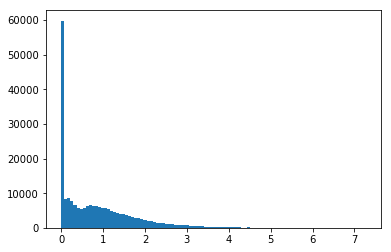

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.218068101977

 1.47734689089
1681

 0.218003236977

 1.45406088743
1682

 0.217072543411

 1.50245299811
1683

 0.215497340159

 1.51376311549
1684

 0.213926151762

 1.4730349301
1685

 0.213794665261

 1.493769281
1686

 0.214390620295

 1.50480910805
1687

 0.213592291478

 1.47541693779
1688

 0.214362265382

 1.43819102073
1689

 0.216620495835

 1.41194224017
1690

 0.217796095554

 1.41616976214
1691

 0.217712787313

 1.42379588822
1692

 0.217174420355

 1.45917469603


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.834731


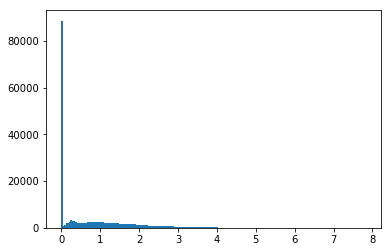

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.815389


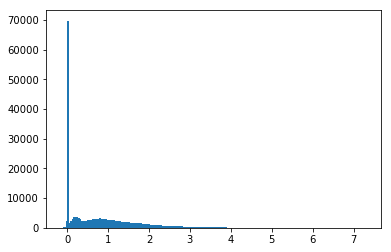

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.85768


In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.819802


In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21436226538191308

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21359229147847034

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21662049583458798

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

(54, 4100) 0.85768


In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True